# Importing Required Libraries & Datasets

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import re
import math
from scipy import stats
from IPython.display import Image
import warnings

In [3]:
sns.set(rc={'figure.figsize':(12, 10)})
pd.set_option('display.max_row', None)
pd.set_option('display.max_column', None)
warnings.filterwarnings('ignore')

# ==> 1. Data Sourcing <==

In [4]:
raw_data = pd.read_csv('loan.csv', index_col='id')

In [5]:
original_csv_file_shape = raw_data.shape
original_csv_file_shape

(39717, 110)

# ==> 2. Data Cleaning (Part 1) <==

### 2.1 Finding Columns With All Null Values

##### Finding columns with more than 50% Null Values

In [6]:
more_than_50_percent = round(raw_data.isnull().sum()/len(raw_data)*100, 2)
more_than_50_percent.sort_values(ascending=False)

total_il_high_credit_limit        100.00
mo_sin_old_rev_tl_op              100.00
bc_util                           100.00
bc_open_to_buy                    100.00
avg_cur_bal                       100.00
acc_open_past_24mths              100.00
inq_last_12m                      100.00
total_cu_tl                       100.00
inq_fi                            100.00
total_rev_hi_lim                  100.00
all_util                          100.00
max_bal_bc                        100.00
open_rv_24m                       100.00
open_rv_12m                       100.00
il_util                           100.00
total_bal_il                      100.00
mths_since_rcnt_il                100.00
open_il_24m                       100.00
open_il_12m                       100.00
open_il_6m                        100.00
open_acc_6m                       100.00
tot_cur_bal                       100.00
tot_coll_amt                      100.00
total_bc_limit                    100.00
dti_joint       

##### We can safely drop the columns which have missing values more than 50%

In [7]:
raw_data = raw_data.drop(more_than_50_percent[more_than_50_percent > 50].index, axis=1)

##### Let's check the columns with most empty values again (Percentage Wise)

In [8]:
(raw_data.isnull().sum()/len(raw_data)*100).sort_values(ascending=False).head(20)

desc                          32.580507
emp_title                      6.191303
emp_length                     2.706650
pub_rec_bankruptcies           1.754916
last_pymnt_d                   0.178765
chargeoff_within_12_mths       0.140998
collections_12_mths_ex_med     0.140998
revol_util                     0.125891
tax_liens                      0.098195
title                          0.027696
last_credit_pull_d             0.005036
int_rate                       0.000000
loan_amnt                      0.000000
purpose                        0.000000
funded_amnt                    0.000000
url                            0.000000
funded_amnt_inv                0.000000
pymnt_plan                     0.000000
loan_status                    0.000000
issue_d                        0.000000
dtype: float64

### 2.2 From the above numbers, lets start analysing each column one by one (which has missing value)

#### 2.2.1 Describe: On carefully reading the describe column, we can infer that, values in this column are some what representing the same as that of "purpose" column. And since purpose column has no null value, we can go ahead by dropping "desc" column and keeping "purpose" column

In [9]:
raw_data = raw_data.drop(columns=['desc'])

#### 2.2.2 Employee Title: This column contains the information on job title of people who have applied, and this could be usefull. We should not remove column, instead we can drop the missing values since the missing count is also low.

In [10]:
raw_data = raw_data[~raw_data.emp_title.isnull()]

#### 2.2.3 Employee Length: This column consists of information on professional experiance of employee and this could be useful parameter. We should not remove this column, instead we can drop the missing values.

In [11]:
raw_data = raw_data[~raw_data.emp_length.isnull()]

#### 2.2.4 Public Record Bankruptcies: This column consists of data related to bankruptcy. Though small, it can be decisive factor, hence dropping the missing rows only and not the column.

In [12]:
raw_data = raw_data[~raw_data.pub_rec_bankruptcies.isnull()]

#### 2.2.5 Last Month Payment Done: Dropping the rows with missing values, as missing value percentage is negligible

In [13]:
raw_data = raw_data[~raw_data.last_pymnt_d.isnull()]

#### 2.2.6 Revolving Line Utilization Rate: Dropping the rows with missing values, as missing value percentage is negligible

In [14]:
raw_data = raw_data[~raw_data.revol_util.isnull()]

#### 2.2.7 Loan Title: Dropping the rows with missing values, as missing value percentage is negligible. Also, it is kind of an additional comments for which the loan is required, which is again very much covered under 'purpose' column

In [15]:
raw_data = raw_data[~raw_data.title.isnull()]

#### 2.2.8 Recent Month LC pulled: Dropping the rows with missing values, as missing value percentage is negligible

In [16]:
raw_data = raw_data[~raw_data.last_credit_pull_d.isnull()]

#### 2.2.9 Other Columns

In [17]:
raw_data.tax_liens.describe()

count    36433.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: tax_liens, dtype: float64

In [18]:
raw_data.chargeoff_within_12_mths.describe()

count    36431.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: chargeoff_within_12_mths, dtype: float64

In [19]:
raw_data.collections_12_mths_ex_med.describe()

count    36431.0
mean         0.0
std          0.0
min          0.0
25%          0.0
50%          0.0
75%          0.0
max          0.0
Name: collections_12_mths_ex_med, dtype: float64

**Following columns have all the values as zero, so, this columns are of no use. So, lets remove this columns.**
- 'tax_liens'
- 'chargeoff_within_12_mths'
- 'collections_12_mths_ex_med'

In [20]:
raw_data = raw_data.drop(columns=['tax_liens','chargeoff_within_12_mths','collections_12_mths_ex_med'], axis=1)

### 2.4 Payment Plan Column consists of only one value i.e. 'n', so we can drop the same

In [21]:
raw_data = raw_data.drop(columns=['pymnt_plan'])

### 2.5 Initial List Status Column consists of only one value i.e. 'f', so we can drop the same

In [22]:
raw_data = raw_data.drop(columns=['initial_list_status'])

### 2.6 Policy Code Column consists of only one value i.e. 1, so we can drop the same

In [23]:
raw_data = raw_data.drop(columns=['policy_code'])

### 2.7 Application Type consists of only one value i.e. 'INDIVIDUAL', so we can drop the same

In [24]:
raw_data = raw_data.drop(columns=['application_type'])

### 2.8 The number of accounts on which the borrower is now delinquent & past-due amount owed column consists of only one value, so we can drop the same

In [25]:
raw_data = raw_data.drop(columns=['acc_now_delinq','delinq_amnt'])

### 2.9 Analysing Dataframe after dropping Rows & Columns

In [26]:
cleaned_data_shape = raw_data.shape
cleaned_data_shape

(36433, 43)

In [27]:
print('Percentage of Rows removed for entire Raw CSV File accounts to', round((1-cleaned_data_shape[0]/original_csv_file_shape[0])*100, 2), '%')

Percentage of Rows removed for entire Raw CSV File accounts to 8.27 %


In [28]:
print('Percentage of Columns removed for entire Raw CSV File accounts to', round((1-cleaned_data_shape[1]/original_csv_file_shape[1])*100, 2), '%')

Percentage of Columns removed for entire Raw CSV File accounts to 60.91 %


# ==> 2. Data Cleaning (Part 2)<==

**This step involves**
- Formatting Data
- Converting them into respective formats
- Creating Categorical columns (if required, which can be easily considered for quick calculations)

##### Creating Generic Function to extract only float value from string (Usually used with percent related data)

In [29]:
def extract_valid_float_from_cell(row):
    row = re.sub('[%, ]', '', str(row))
    return round(float(row), 2)

### 2.10 Creating New Column of Funding Category on the basis of 'Funding Amount'

In [30]:
funded_amount_range = [*range(0, raw_data['funded_amnt'].max() + 5000, 5000)]
raw_data['funded_amount_category'] = pd.cut(raw_data['funded_amnt'], funded_amount_range)

In [31]:
raw_data['funded_amount_category'].value_counts(sort=False)

(0, 5000]          8597
(5000, 10000]     12082
(10000, 15000]     7665
(15000, 20000]     4291
(20000, 25000]     2491
(25000, 30000]      680
(30000, 35000]      627
Name: funded_amount_category, dtype: int64

### 2.11 Formatting Term Column

In [32]:
def extract_valid_month_from_months_column(row):
    row = re.sub('[A-Za-z, ]', '', str(row))
    return int(row)

In [33]:
raw_data['term'] = raw_data.term.apply(extract_valid_month_from_months_column)

In [34]:
raw_data['term'].value_counts(sort=False)

36    26377
60    10056
Name: term, dtype: int64

### 2.12 Formatting Interest Rate Column to Float Value & Generating Categorical Column

In [35]:
raw_data['int_rate'] = raw_data.int_rate.apply(extract_valid_float_from_cell)

In [36]:
int_rate_range = [*range(math.floor(raw_data['int_rate'].min()), math.ceil(raw_data['int_rate'].max() + 1.0), 1)]
raw_data['int_rate_category'] = pd.cut(raw_data['int_rate'], int_rate_range)

In [37]:
raw_data['int_rate_category'].value_counts(sort=False)

(5, 6]      1215
(6, 7]      2269
(7, 8]      4019
(8, 9]      1421
(9, 10]     2246
(10, 11]    3724
(11, 12]    4072
(12, 13]    3165
(13, 14]    3755
(14, 15]    2545
(15, 16]    2498
(16, 17]    1820
(17, 18]    1332
(18, 19]     859
(19, 20]     670
(20, 21]     460
(21, 22]     189
(22, 23]     129
(23, 24]      41
(24, 25]       4
Name: int_rate_category, dtype: int64

### 2.13 Formatting Installment Column

In [38]:
raw_data['installment'].dtype

dtype('float64')

##### No need to format Insallment Column as it is already in correct format (float value)

### 2.14 Creating newly mapped Grade Column

In [39]:
grade_list = list(raw_data['grade'].unique())
grade_list.sort()

In [40]:
grade_dict_mapped = {value:index+1 for index, value in enumerate(grade_list)}
grade_dict_mapped

{'A': 1, 'B': 2, 'C': 3, 'D': 4, 'E': 5, 'F': 6, 'G': 7}

##### Creating mapped grade column, so that numerical operations would be possible (with respect to Grade Column)
##### Note that, mapped values are generic and can be assumed different as well

In [41]:
raw_data['grade_mapped'] = raw_data['grade'].map(grade_dict_mapped)

In [42]:
raw_data['grade_mapped'].value_counts(sort=False)

1     9175
2    11035
3     7431
4     4875
5     2650
6      969
7      298
Name: grade_mapped, dtype: int64

### 2.15 Formatting Sub-Grade Column

##### While comparing Grade & Sub-Grade column, it is observed that, alphabet in Sub-Grade column is same as alphabet in Grade Column. This can be verified by printing all the rows where value of "Grade" column is not equal to alphabet in "Sub-Grade" column.
##### (If there are no values i.e. count is zero, while comparing this, we can be assured to drop alphabet from Sub-Grade column)
##### This is done to verify if the numerical value in Sub-Grade column is somewhat impacting as a standalone without any Alphabet

In [43]:
raw_data[raw_data['grade'] != raw_data.sub_grade.apply(lambda x: x[:1])].grade.count()

0

##### So, we will proceed ahead with creating a new column which have only the number present in sub-grade column

In [44]:
def remove_alphabet_from_sub_grade_column(row):
    row = re.sub('[A-Za-z]', '', str(row))
    return int(row)

In [45]:
raw_data['sub_grade_only_number'] = raw_data.sub_grade.apply(remove_alphabet_from_sub_grade_column)

In [46]:
raw_data['sub_grade'].value_counts(sort=False)

B5    2529
E3     516
B3    2674
E1     729
D2    1245
E4     423
F4     151
C1    1949
E5     376
E2     606
F1     315
A4    2673
A5    2511
C2    1870
C4    1124
F3     170
D1     846
B1    1643
B4    2319
D5     801
G2      75
A3    1630
D3    1078
D4     905
G4      56
A1    1005
C5    1082
F2     230
B2    1870
G3      44
F5     103
G1      98
G5      25
A2    1356
C3    1406
Name: sub_grade, dtype: int64

In [47]:
raw_data['sub_grade_only_number'].value_counts(sort=False)

1    6585
2    7252
3    7518
4    7651
5    7427
Name: sub_grade_only_number, dtype: int64

### 2.16 Formatting Employee Title

In [48]:
raw_data['emp_title'] = raw_data['emp_title'].apply(lambda x: x.lower().replace('.', ''))

In [49]:
raw_data['emp_title'] = raw_data['emp_title'].apply(lambda x: x.replace('united states', 'us') if 'united states' in x else x)

In [50]:
raw_data['emp_title'] = raw_data['emp_title'].apply(lambda x: x.replace('u s', 'us') if 'u s ' in x else x)

In [51]:
raw_data['emp_title'] = raw_data['emp_title'].replace("jpmorgan chase", "jp morgan chase")
raw_data['emp_title'] = raw_data['emp_title'].replace("self", "self employed")
raw_data['emp_title'] = raw_data['emp_title'].replace("self-employed", "self employed")
raw_data['emp_title'] = raw_data['emp_title'].replace("wal-mart", "walmart")
raw_data['emp_title'] = raw_data['emp_title'].replace("wal mart", "walmart")
raw_data['emp_title'] = raw_data['emp_title'].replace("att", "at&t")

In [52]:
raw_data['emp_title'].value_counts().head(30)

us army                  291
bank of america          136
self employed            136
us air force             115
walmart                  113
us postal service        109
jp morgan chase           89
at&t                      89
us navy                   79
ibm                       68
kaiser permanente         68
wells fargo               67
usps                      64
ups                       62
verizon wireless          62
usaf                      55
walgreens                 53
lockheed martin           49
state of california       46
home depot                45
department of defense     44
target                    42
verizon                   41
wells fargo bank          36
comcast                   36
booz allen hamilton       36
united parcel service     36
northrop grumman          35
best buy                  35
us coast guard            35
Name: emp_title, dtype: int64

### 2.17 Formatting Employee Length (Years of Experience) Column

In [53]:
def clean_employee_length_column(row):
    row = re.sub('[A-Za-z, ]', '', str(row))
    if row == '<1':
        return 0
    elif row == '10+':
        return 10
    elif row == '':
        return np.nan
    else:
        return float(row)

In [54]:
raw_data['emp_length'] = raw_data.emp_length.apply(clean_employee_length_column)

In [55]:
raw_data.groupby(by='emp_length').emp_length.count()

emp_length
0.0     4052
1.0     3026
2.0     4178
3.0     3914
4.0     3297
5.0     3129
6.0     2121
7.0     1697
8.0     1405
9.0     1207
10.0    8407
Name: emp_length, dtype: int64

### 2.18 Formatting Ownership Column (Creating new mapped column)

In [56]:
ownership_status_list = list(raw_data.home_ownership.unique())
ownership_status_list.sort()

In [57]:
ownership_dict = {value: index for index, value in enumerate(ownership_status_list)}
ownership_dict

{'MORTGAGE': 0, 'OTHER': 1, 'OWN': 2, 'RENT': 3}

##### Creating mapped home ownership column, so that numerical operations would be possible (with respect to Home Ownership Column)
##### Note that, mapped values are generic and can be assumed different as well

In [58]:
raw_data['home_ownership_mapped'] = raw_data.home_ownership.map(ownership_dict)

In [59]:
raw_data['home_ownership'].value_counts(sort=False)

MORTGAGE    16300
OWN          2575
RENT        17464
OTHER          94
Name: home_ownership, dtype: int64

### 2.19 Formatting Annual Income / Salary Column (Creating new mapped column)

In [60]:
raw_data['annual_inc'].dtype

dtype('float64')

##### No need to format Annual Income Column as it is already in correct format (float value)

In [61]:
raw_data.annual_inc.describe()

count    3.643300e+04
mean     6.930522e+04
std      6.354244e+04
min      4.000000e+03
25%      4.200000e+04
50%      6.000000e+04
75%      8.300000e+04
max      6.000000e+06
Name: annual_inc, dtype: float64

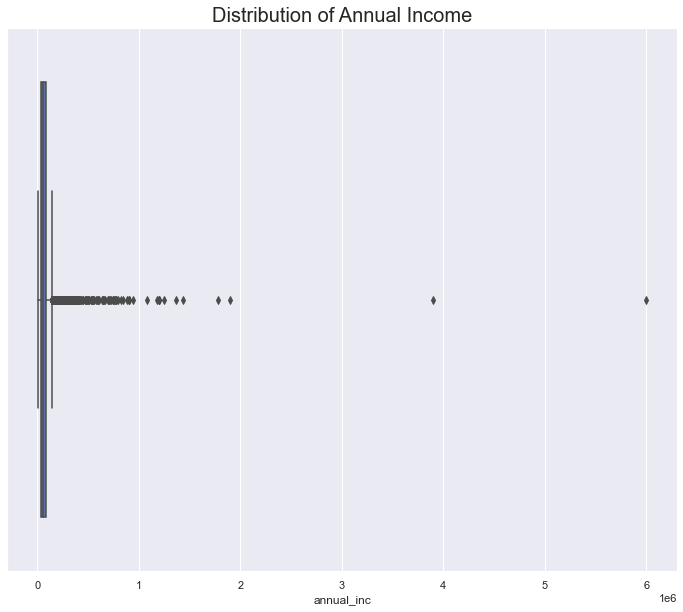

In [62]:
sns.boxplot(x=raw_data['annual_inc'], data=raw_data)
plt.title('Distribution of Annual Income', fontdict={'fontsize': 20})
plt.show()

##### We see that there are few outliers which are disturbing our observations. So we decide to cut out the outliers by taking value upto a quantile range of 98%

In [63]:
raw_data = raw_data[raw_data.annual_inc < raw_data['annual_inc'].quantile(0.98)]

In [64]:
raw_data.annual_inc.describe()

count     35704.000000
mean      64542.435351
std       31765.296321
min        4000.000000
25%       41000.000000
50%       58900.000000
75%       80000.000000
max      182952.000000
Name: annual_inc, dtype: float64

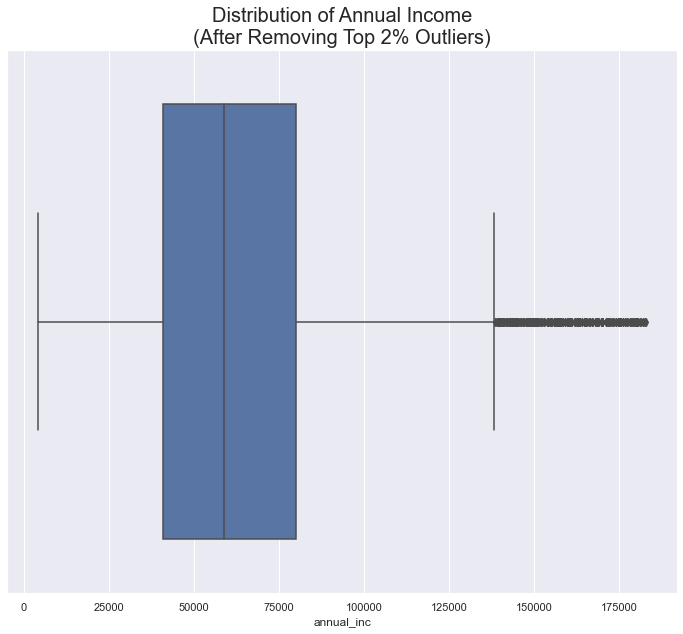

In [65]:
sns.boxplot(x=raw_data['annual_inc'], data=raw_data)
plt.title('Distribution of Annual Income\n(After Removing Top 2% Outliers)', fontdict={'fontsize': 20})
plt.show()

In [66]:
annual_inc_range = [*range(0, int(raw_data['annual_inc'].max()) + 10000, 10000)]
raw_data['annual_inc_category'] = pd.cut(raw_data['annual_inc'], annual_inc_range)

In [67]:
raw_data['annual_inc_category'].value_counts(sort=False)

(0, 10000]            54
(10000, 20000]       829
(20000, 30000]      2994
(30000, 40000]      4768
(40000, 50000]      5394
(50000, 60000]      5376
(60000, 70000]      3969
(70000, 80000]      3425
(80000, 90000]      2471
(90000, 100000]     1936
(100000, 110000]    1208
(110000, 120000]    1038
(120000, 130000]     707
(130000, 140000]     472
(140000, 150000]     420
(150000, 160000]     256
(160000, 170000]     164
(170000, 180000]     207
(180000, 190000]      16
Name: annual_inc_category, dtype: int64

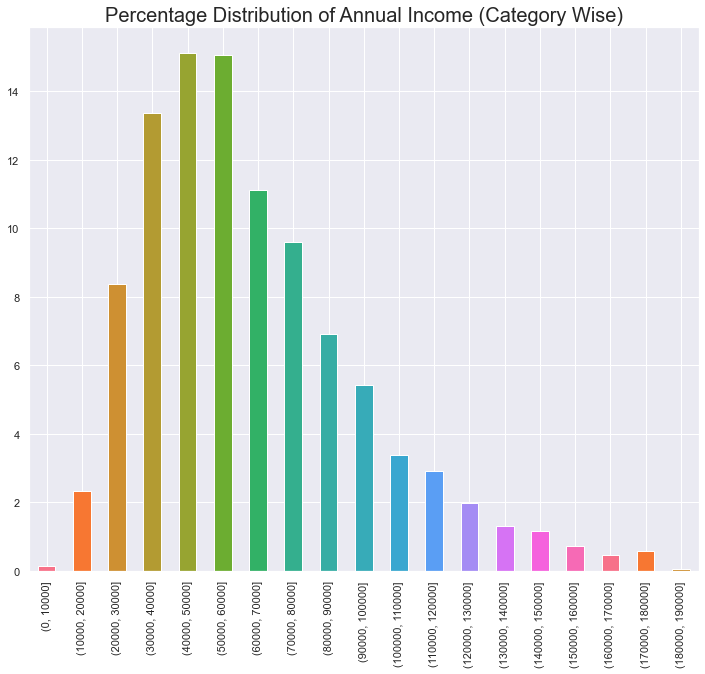

In [68]:
(raw_data.annual_inc_category.value_counts(normalize=True, sort=False)*100).plot.bar(color=sns.color_palette('husl', 16))
plt.title('Percentage Distribution of Annual Income (Category Wise)', fontdict={'fontsize': 20})
plt.show()

### 2.20 Formatting Salary Verification Column (Creating new mapped column)

In [69]:
salary_verify_status_list = list(raw_data.verification_status.unique())
salary_verify_status_list.sort()

In [70]:
income_verification_dict = {value: index for index, value in enumerate(salary_verify_status_list)}
income_verification_dict

{'Not Verified': 0, 'Source Verified': 1, 'Verified': 2}

##### Creating mapped Salary Verification column, so that numerical operations would be possible (with respect to Salary Verification Column)
##### Note that, mapped values are generic and can be assumed different as well

In [71]:
raw_data['verification_status_mapped'] = raw_data.verification_status.map(income_verification_dict)

In [72]:
raw_data['verification_status'].value_counts(sort=False)

Source Verified     9230
Verified           11550
Not Verified       14924
Name: verification_status, dtype: int64

### 2.21 Formatting Loan Issue Date to datetime object & Creating Seperate Column for Month & Year

In [73]:
raw_data['issue_d'] = pd.to_datetime(raw_data.issue_d, format='%b-%y')

In [74]:
raw_data['issue_d_year'] = pd.DatetimeIndex(raw_data['issue_d']).year

In [75]:
raw_data['issue_d_month'] = pd.DatetimeIndex(raw_data['issue_d']).month

### 2.22 Formatting Loan Status Column (Creating new mapped column) 

In [76]:
loan_status_list = list(raw_data.loan_status.unique())
loan_status_list.sort()

In [77]:
loan_status_dict = {value: index for index, value in enumerate(loan_status_list)}
loan_status_dict

{'Charged Off': 0, 'Current': 1, 'Fully Paid': 2}

##### Creating mapped Loan Status column, so that numerical operations would be possible (with respect to Loan Status Column)
##### Note that, mapped values are generic and can be assumed different as well

In [78]:
raw_data['loan_status_mapped'] = raw_data.loan_status.map(loan_status_dict)

In [79]:
raw_data['loan_status'].value_counts(sort=False)

Fully Paid     29788
Current         1042
Charged Off     4874
Name: loan_status, dtype: int64

### 2.23 Formatting Purpose Column

In [80]:
raw_data['purpose'] = raw_data.purpose.apply(lambda x: x.replace('_', ' ').title())

In [81]:
raw_data['purpose'].value_counts(sort=False)

Car                    1427
Vacation                333
Credit Card            4643
Educational             271
House                   330
Wedding                 870
Other                  3502
Moving                  519
Small Business         1370
Home Improvement       2575
Renewable Energy         83
Major Purchase         1964
Debt Consolidation    17201
Medical                 616
Name: purpose, dtype: int64

### 2.24 Mapping Address State Column With Complete State Name

##### Creating a dictionary of all the states In US and their respective state abbreviation

In [82]:
full_state_list = {'AL': 'Alabama', 'AK': 'Alaska', 'AZ': 'Arizona', 'AR': 'Arkansas', 'CA': 'California', 'CO': 'Colorado', 'CT': 'Connecticut', 'DE': 'Delaware', 'FL': 'Florida', 'GA': 'Georgia', 'HI': 'Hawaii', 'ID': 'Idaho', 'IL': 'Illinois', 'IN': 'Indiana', 'IA': 'Iowa', 'KS': 'Kansas', 'KY': 'Kentucky', 'LA': 'Louisiana', 'ME': 'Maine', 'MD': 'Maryland', 'MA': 'Massachusetts', 'MI': 'Michigan', 'MN': 'Minnesota', 'MS': 'Mississippi', 'MO': 'Missouri', 'MT': 'Montana', 'NE': 'Nebraska', 'NV': 'Nevada', 'NH': 'New Hampshire', 'NJ': 'New Jersey', 'NM': 'New Mexico', 'NY': 'New York', 'NC': 'North Carolina', 'ND': 'North Dakota', 'OH': 'Ohio', 'OK': 'Oklahoma', 'OR': 'Oregon', 'PA': 'Pennsylvania', 'RI': 'Rhode Island', 'SC': 'South Carolina', 'SD': 'South Dakota', 'TN': 'Tennessee', 'TX': 'Texas', 'UT': 'Utah', 'VT': 'Vermont', 'VA': 'Virginia', 'WA': 'Washington', 'WV': 'West Virginia', 'WI': 'Wisconsin', 'WY': 'Wyoming'}

In [83]:
raw_data['addr_state_name'] = raw_data.addr_state.map(full_state_list)

In [84]:
raw_data['addr_state_name'].value_counts(sort=False)

Rhode Island       184
Iowa                 1
Tennessee           10
New Jersey        1666
Alaska              72
Oregon             411
Mississippi         18
Massachusetts     1184
Maryland           952
Pennsylvania      1397
Kansas             245
Arkansas           220
New Mexico         162
Louisiana          388
Texas             2453
Michigan           650
New York          3408
South Carolina     426
Delaware           104
Illinois          1392
Connecticut        652
Minnesota          558
Arizona            767
Ohio              1125
Alabama            410
Idaho                3
Oklahoma           280
Indiana              1
Hawaii             160
Nevada             453
Georgia           1269
Colorado           693
North Carolina     692
South Dakota        57
Utah               231
California        6407
Wyoming             78
Kentucky           305
Florida           2567
Missouri           617
Montana             73
Nebraska             1
Vermont             48
Virginia   

### 2.25 Creating DTI Category Column & Generating Categorical Column

In [85]:
raw_data['dti'].dtype

dtype('float64')

In [86]:
raw_data['dti'] = round(raw_data['dti'], 2)

##### No need to format DTI Column any much further as it is already in correct format (float value)

In [87]:
dti_range = [*range(math.floor(raw_data['dti'].min()), math.ceil(raw_data['dti'].max() + 1.0), 1)]
raw_data['dti_category'] = pd.cut(raw_data['dti'], dti_range)

In [88]:
raw_data['dti_category'].value_counts(sort=False)

(0, 1]       637
(1, 2]       751
(2, 3]       788
(3, 4]       903
(4, 5]      1097
(5, 6]      1186
(6, 7]      1257
(7, 8]      1448
(8, 9]      1551
(9, 10]     1624
(10, 11]    1739
(11, 12]    1707
(12, 13]    1804
(13, 14]    1878
(14, 15]    1860
(15, 16]    1787
(16, 17]    1738
(17, 18]    1621
(18, 19]    1597
(19, 20]    1604
(20, 21]    1489
(21, 22]    1334
(22, 23]    1355
(23, 24]    1161
(24, 25]    1024
(25, 26]     156
(26, 27]     151
(27, 28]     129
(28, 29]      97
(29, 30]      89
Name: dti_category, dtype: int64

### 2.26 Analysing Delinq 2 Years Column

In [89]:
raw_data['delinq_2yrs'].dtype

dtype('int64')

##### No need to format Delinq 2 Years Column as it is already in correct format (integer value)

### 2.27 Formatting Earliest Credit Line Column to Valid Date object

In [90]:
raw_data['earliest_cr_line'] = pd.to_datetime(raw_data.earliest_cr_line, format='%b-%y')

In [91]:
raw_data['earliest_cr_line_month'] = pd.DatetimeIndex(raw_data['earliest_cr_line']).month

In [92]:
raw_data['earliest_cr_line_year'] = pd.DatetimeIndex(raw_data['earliest_cr_line']).year

In [93]:
raw_data['earliest_cr_line_year'] = raw_data.earliest_cr_line_year.apply(lambda x: x-100 if (x > pd.datetime.now().year) else x)

##### After converting year to proper format, we should drop 'earliest_cr_line' column to avoid data duplicacy issues.

In [94]:
raw_data = raw_data.drop(columns=['earliest_cr_line'])

In [95]:
raw_data['earliest_cr_line_month'].value_counts(sort=False)

1     3118
2     2560
3     2462
4     2473
5     2599
6     2618
7     2767
8     2984
9     3215
10    3698
11    3562
12    3648
Name: earliest_cr_line_month, dtype: int64

In [96]:
raw_data.groupby(by='earliest_cr_line_year').earliest_cr_line_year.count()

earliest_cr_line_year
1946       1
1950       1
1954       1
1956       1
1962       3
1963       4
1964       1
1965       5
1966       7
1967      11
1968      12
1969      21
1970      35
1971      31
1972      29
1973      40
1974      49
1975      56
1976      68
1977      87
1978     124
1979     132
1980     146
1981     146
1982     185
1983     281
1984     336
1985     392
1986     439
1987     536
1988     640
1989     748
1990     906
1991     837
1992     946
1993    1353
1994    1796
1995    1924
1996    2025
1997    2230
1998    2608
1999    2734
2000    2996
2001    2347
2002    1780
2003    1734
2004    1631
2005    1403
2006    1077
2007     667
2008     142
Name: earliest_cr_line_year, dtype: int64

### 2.28 Formatting Inq 6 Months Column to Valid Date object

In [97]:
raw_data['inq_last_6mths'].dtype

dtype('int64')

##### No need to format Inq Last 6 Months Column as it is already in correct format (integer value)

### 2.29 Formatting Revolving Balance & Generating Categorical Column

In [98]:
raw_data['revol_bal'].dtype

dtype('int64')

##### No need to format Revolving Balance Column as it is in proper format

In [99]:
revol_bal_range = [*range(math.floor(raw_data['revol_bal'].min()), math.ceil(raw_data['revol_bal'].max() + 100.0), 2000)]
raw_data['revol_bal_category'] = pd.cut(raw_data['revol_bal'], revol_bal_range)

In [100]:
raw_data['revol_bal_category'].value_counts()

(0, 2000]           4431
(2000, 4000]        4110
(4000, 6000]        3733
(6000, 8000]        3328
(8000, 10000]       2993
(10000, 12000]      2592
(12000, 14000]      2228
(14000, 16000]      1836
(16000, 18000]      1530
(18000, 20000]      1269
(20000, 22000]       973
(22000, 24000]       868
(24000, 26000]       708
(26000, 28000]       620
(28000, 30000]       486
(30000, 32000]       388
(32000, 34000]       331
(34000, 36000]       301
(38000, 40000]       224
(36000, 38000]       204
(40000, 42000]       161
(44000, 46000]       155
(42000, 44000]       154
(46000, 48000]       124
(52000, 54000]        90
(48000, 50000]        90
(54000, 56000]        80
(50000, 52000]        74
(56000, 58000]        66
(60000, 62000]        57
(58000, 60000]        50
(62000, 64000]        49
(64000, 66000]        42
(66000, 68000]        41
(70000, 72000]        38
(68000, 70000]        38
(72000, 74000]        34
(74000, 76000]        31
(78000, 80000]        30
(80000, 82000]        25


### 2.30 Formatting Revolving Utilization Rate & Generating Categorical Column

In [101]:
raw_data['revol_util'] = raw_data.revol_util.apply(extract_valid_float_from_cell)

In [102]:
revol_util_range = [*range(math.floor(raw_data['revol_util'].min()), math.ceil(raw_data['revol_util'].max() + 10.0), 10)]
raw_data['revol_util_category'] = pd.cut(raw_data['revol_util'], revol_util_range)

In [103]:
raw_data['revol_util_category'].value_counts(sort=False)

(0, 10]      3060
(10, 20]     2997
(20, 30]     3432
(30, 40]     3715
(40, 50]     3924
(50, 60]     3942
(60, 70]     3919
(70, 80]     3669
(80, 90]     3387
(90, 100]    2837
Name: revol_util_category, dtype: int64

### 2.31 Categorizing Total Number of Credit Lines column

In [104]:
raw_data['total_acc'].dtype

dtype('int64')

##### No need to format Total Number of Credit Lines Column as it is in proper format

In [105]:
total_acc_range = [*range(math.floor(raw_data['total_acc'].min()), math.ceil(raw_data['total_acc'].max() + 10.0), 10)]
raw_data['total_acc_category'] = pd.cut(raw_data['total_acc'], total_acc_range)

In [106]:
raw_data['total_acc_category'].value_counts(sort=False)

(2, 12]      7576
(12, 22]    12820
(22, 32]     9195
(32, 42]     4170
(42, 52]     1419
(52, 62]      420
(62, 72]       95
(72, 82]        6
(82, 92]        2
Name: total_acc_category, dtype: int64

### 2.32 Categorizing Remaining outstanding principal column

In [107]:
raw_data['out_prncp'].dtype

dtype('float64')

##### No need to format Remaining outstanding principal Column as it is in proper format

In [108]:
out_prncp_range = [*range(math.floor(raw_data['out_prncp'].min()), math.ceil(raw_data['out_prncp'].max() + 100.0), 100)]
raw_data['out_prncp_category'] = pd.cut(raw_data['out_prncp'], out_prncp_range)

In [109]:
raw_data['out_prncp_category'].value_counts(sort=False)

(0, 100]        26
(100, 200]      31
(200, 300]      38
(300, 400]      32
(400, 500]      47
(500, 600]      48
(600, 700]      34
(700, 800]      44
(800, 900]      35
(900, 1000]     24
(1000, 1100]    41
(1100, 1200]    36
(1200, 1300]    32
(1300, 1400]    23
(1400, 1500]    21
(1500, 1600]    23
(1600, 1700]    27
(1700, 1800]    34
(1800, 1900]    34
(1900, 2000]    29
(2000, 2100]    20
(2100, 2200]    29
(2200, 2300]    26
(2300, 2400]    24
(2400, 2500]    18
(2500, 2600]    13
(2600, 2700]    18
(2700, 2800]    13
(2800, 2900]    15
(2900, 3000]    18
(3000, 3100]    10
(3100, 3200]    16
(3200, 3300]    17
(3300, 3400]    15
(3400, 3500]    10
(3500, 3600]    10
(3600, 3700]     9
(3700, 3800]    10
(3800, 3900]     7
(3900, 4000]     7
(4000, 4100]    10
(4100, 4200]     6
(4200, 4300]     3
(4300, 4400]     4
(4400, 4500]     7
(4500, 4600]     5
(4600, 4700]     4
(4700, 4800]     4
(4800, 4900]     4
(4900, 5000]     1
(5000, 5100]     1
(5100, 5200]     0
(5200, 5300]

### 2.33 Categorizing Outstanding Principal for Portion of Total Amount Funded by Investors Column

In [110]:
raw_data['out_prncp_inv'].dtype

dtype('float64')

##### No need to format Outstanding Principal for Portion of Total Amount Funded by Investors Column as it is in proper format

In [111]:
out_prncp_inv_range = [*range(math.floor(raw_data['out_prncp_inv'].min()), math.ceil(raw_data['out_prncp_inv'].max() + 100.0), 100)]
raw_data['out_prncp_inv_category'] = pd.cut(raw_data['out_prncp_inv'], out_prncp_inv_range)

In [112]:
raw_data['out_prncp_inv_category'].value_counts(sort=False)

(0, 100]        26
(100, 200]      31
(200, 300]      39
(300, 400]      34
(400, 500]      45
(500, 600]      48
(600, 700]      35
(700, 800]      46
(800, 900]      35
(900, 1000]     23
(1000, 1100]    42
(1100, 1200]    34
(1200, 1300]    34
(1300, 1400]    21
(1400, 1500]    22
(1500, 1600]    24
(1600, 1700]    26
(1700, 1800]    35
(1800, 1900]    32
(1900, 2000]    30
(2000, 2100]    18
(2100, 2200]    35
(2200, 2300]    21
(2300, 2400]    22
(2400, 2500]    18
(2500, 2600]    16
(2600, 2700]    17
(2700, 2800]    11
(2800, 2900]    17
(2900, 3000]    17
(3000, 3100]    10
(3100, 3200]    16
(3200, 3300]    16
(3300, 3400]    16
(3400, 3500]     9
(3500, 3600]    12
(3600, 3700]     8
(3700, 3800]    13
(3800, 3900]     5
(3900, 4000]     5
(4000, 4100]    11
(4100, 4200]     5
(4200, 4300]     3
(4300, 4400]     4
(4400, 4500]     8
(4500, 4600]     5
(4600, 4700]     3
(4700, 4800]     5
(4800, 4900]     3
(4900, 5000]     1
(5000, 5100]     1
(5100, 5200]     2
(5200, 5300]

### 2.34 Analysing Following Columns (if they are needed to format)

In [113]:
raw_data.total_pymnt.dtype

dtype('float64')

In [114]:
raw_data.total_pymnt_inv.dtype

dtype('float64')

In [115]:
raw_data.total_rec_prncp.dtype

dtype('float64')

In [116]:
raw_data.total_rec_int.dtype

dtype('float64')

In [117]:
raw_data.total_rec_late_fee.dtype

dtype('float64')

In [118]:
raw_data.recoveries.dtype

dtype('float64')

In [119]:
raw_data.collection_recovery_fee.dtype

dtype('float64')

**Observation**
- All the above listed columns seems to be in right format, hence no need of any conversion.

### 2.35 Formatting Last Payment & Last Credit Pull Date Column to Valid format

In [120]:
raw_data['last_pymnt_d'] = pd.to_datetime(raw_data.last_pymnt_d, format='%b-%y')

In [121]:
raw_data['last_credit_pull_d'] = pd.to_datetime(raw_data.last_credit_pull_d, format='%b-%y')

**Apart from that, we also see that following variables even though are valid, but these factors will not be present when a candidate os applying for loan. Hence, we can drop this following columns:**
- Payments received to date for total amount funded (total_pymnt)
- Payments received to date for portion of total amount funded by investors (total_pymnt_inv)
- Principal received to date (total_rec_prncp)
- Interest received to date (total_rec_int)
- Late fees received to date (total_rec_late_fee)
- Post charge off gross recovery (recoveries)
- Post charge off collection fee (collection_recovery_fee)
- Last month payment was received (last_pymnt_d)
- Last total payment amount received (last_pymnt_amnt)
- Most recent month LC pulled credit for this loan (last_credit_pull_d)

In [122]:
raw_data = raw_data.drop(['total_pymnt', 'total_pymnt_inv', 'total_rec_prncp', 'total_rec_int', 'total_rec_late_fee',
                          'recoveries', 'collection_recovery_fee', 'last_pymnt_d', 'last_pymnt_amnt', 'last_credit_pull_d'],
                         axis=1)

### 2.36 Creating New Column As Percentage of Open Credit Lines Compared With Available Credit Lines

In [123]:
raw_data['ratio_of_credit_line'] = raw_data['open_acc'] / raw_data['total_acc'] * 100

In [124]:
raw_data['ratio_of_credit_line_category'] = raw_data['ratio_of_credit_line'].apply(lambda x: math.ceil(x/5.00) * 5)

### 2.37 Categorising Public Record Column

In [125]:
raw_data['pub_rec'].dtype

dtype('int64')

##### No need to format Public Record Column as it is in proper format

In [126]:
raw_data['pub_rec'].value_counts(sort=False)

0    33833
1     1817
2       46
3        6
4        2
Name: pub_rec, dtype: int64

### 2.38 Categorising Open Credit Line Column

In [127]:
raw_data['open_acc'].dtype

dtype('int64')

##### No need to format Open Credit Column as it is in proper format

In [128]:
raw_data.groupby(by='open_acc').open_acc.count()

open_acc
2      482
3     1300
4     2067
5     2851
6     3568
7     3637
8     3559
9     3390
10    2909
11    2485
12    2067
13    1709
14    1350
15    1066
16     841
17     661
18     486
19     356
20     260
21     224
22     129
23      83
24      65
25      51
26      23
27      19
28      22
29      10
30      12
31       5
32       3
33       3
34       5
35       1
36       2
38       1
39       1
44       1
Name: open_acc, dtype: int64

### 2.39 Categorising Public Record Bankruptcy Column

In [129]:
raw_data['pub_rec_bankruptcies'].dtype

dtype('float64')

In [130]:
raw_data['pub_rec_bankruptcies'] = raw_data['pub_rec_bankruptcies'].apply(lambda x: int(x))

In [131]:
raw_data['pub_rec_bankruptcies'].value_counts(sort=False)

0    34214
1     1483
2        7
Name: pub_rec_bankruptcies, dtype: int64

# ==> 3. Univariate, Segmented & Bivariate Analysis <==

- #### For Univariate, Segmented & Bivariate analysis, we will assume only the data relevant to loan status of Fully Paid & Charged Off.
- #### Since, we want to compare number of defaulters against the one who have successfully paid, we are dropping the rows relevant to loan status of 'Current'
- #### By this way, we will have only 2 types of customers. One which have fully paid & others which are defaulted which will ease out the visualisation of Defaulters against the one who have fully paid.
- ### Moving ahead, we will focus only on the data relevant to Fully Paid & Charged Off ONLY.

##### Note: Following command can be used to create a replicate copy of all the cleaned data set. Currently, we are commenting as it won't be necessary and will consume space as altogether a new object is created.

In [132]:
# cleaned_data = raw_data.copy(deep=True)

In [133]:
raw_data = raw_data[raw_data['loan_status'].isin(['Charged Off', 'Fully Paid'])]

In [134]:
raw_data.shape

(34662, 53)

In [135]:
raw_data.head()

,member_id,loan_amnt,funded_amnt,funded_amnt_inv,term,int_rate,installment,grade,sub_grade,emp_title,emp_length,home_ownership,annual_inc,verification_status,issue_d,loan_status,url,purpose,title,zip_code,addr_state,dti,delinq_2yrs,inq_last_6mths,open_acc,pub_rec,revol_bal,revol_util,total_acc,out_prncp,out_prncp_inv,pub_rec_bankruptcies,funded_amount_category,int_rate_category,grade_mapped,sub_grade_only_number,home_ownership_mapped,annual_inc_category,verification_status_mapped,issue_d_year,issue_d_month,loan_status_mapped,addr_state_name,dti_category,earliest_cr_line_month,earliest_cr_line_year,revol_bal_category,revol_util_category,total_acc_category,out_prncp_category,out_prncp_inv_category,ratio_of_credit_line,ratio_of_credit_line_category
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
312505,312443,500,500,450.0,36,9.76,16.08,B,B2,"hughes, hubbard & reed llp",7.0,MORTGAGE,59000.0,Not Verified,2008-03-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Other,Store Charge Card,117xx,NY,22.17,0,0,9,0,65414,47.8,26,0.0,0.0,0,"(0, 5000]","(9, 10]",2,2,0,"(50000, 60000]",0,2008,3,2,New York,"(22, 23]",8,1995,"(64000, 66000]","(40, 50]","(22, 32]",NaN,NaN,34.615385,35
311591,311571,725,725,650.0,36,7.37,22.51,A,A1,"team awesome productions, inc",1.0,RENT,12000.0,Not Verified,2008-03-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Credit Card,MasterCard Liberation Front,941xx,CA,3.60,0,0,4,0,1814,7.0,10,0.0,0.0,0,"(0, 5000]","(7, 8]",1,1,3,"(10000, 20000]",0,2008,3,2,California,"(3, 4]",1,2001,"(0, 2000]","(0, 10]","(2, 12]",NaN,NaN,40.000000,40
1069759,1304871,1000,1000,1000.0,36,16.29,35.31,D,D1,internal revenue service,0.0,RENT,28000.0,Not Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Debt Consolidation,Debt Consolidation Loan,641xx,MO,20.31,0,1,11,0,6524,81.5,23,0.0,0.0,0,"(0, 5000]","(16, 17]",4,1,3,"(20000, 30000]",0,2011,12,2,Missouri,"(20, 21]",9,2007,"(6000, 8000]","(80, 90]","(22, 32]",NaN,NaN,47.826087,50
1059843,1291476,1000,1000,1000.0,36,13.49,33.94,C,C1,inviting company,8.0,RENT,35100.0,Not Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Small Business,Business Loan,721xx,AR,6.19,0,1,8,0,9219,73.1,17,0.0,0.0,0,"(0, 5000]","(13, 14]",3,1,3,"(30000, 40000]",0,2011,12,2,Arkansas,"(6, 7]",10,1997,"(8000, 10000]","(70, 80]","(12, 22]",NaN,NaN,47.058824,50
1051470,1283154,1000,1000,1000.0,36,13.49,33.94,C,C1,microstrategy,2.0,RENT,76000.0,Not Verified,2011-12-01,Fully Paid,https://lendingclub.com/browse/loanDetail.acti...,Major Purchase,Major Purchase,200xx,DC,18.52,0,0,9,0,3808,97.6,16,0.0,0.0,0,"(0, 5000]","(13, 14]",3,1,3,"(70000, 80000]",0,2011,12,2,NaN,"(18, 19]",9,2005,"(2000, 4000]","(90, 100]","(12, 22]",NaN,NaN,56.250000,60


In [136]:
print('Percentage of Rows removed for entire Raw CSV File accounts to', round((1-raw_data.shape[0] / original_csv_file_shape[0])*100, 2), '%')

Percentage of Rows removed for entire Raw CSV File accounts to 12.73 %


#### To properly maintain code, we will define certain set of functions which can be re-used for plotting graphs for columns (wherever applicable).

In [137]:
def population_distribution(data, graph_title, x_axis_label, y_axis_label='Percentage of Members', data_label='horizontal', x_label_rotation=0):
    population_graph = sns.barplot(x=data.index, y=data.values)
    label_deviation_above_y_axis = data.max() * 0.015
    for index, value in enumerate(data.iteritems()):
        population_graph.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation=data_label)
    population_graph.set_xticklabels(population_graph.get_xticklabels(), rotation=x_label_rotation)
    plt.title(graph_title, fontdict={'fontsize': 20})
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.show()

In [138]:
def distribution_against_charged_off_members(data, graph_title, x_axis_label, y_axis_label='Percentage of Members', data_label='horizontal', x_label_rotation=0, sort=False):
    data['total'] = data.sum(axis=1)
    data = data.iloc[:,:-1].div(data["total"], axis=0)*100
    if sort is True:
        data = data.sort_values(by=['Charged Off'])
    
    dist_charged_graph = sns.barplot(x = data['Charged Off'].index, y=data['Charged Off'].values)
    label_deviation_above_y_axis = data['Charged Off'].max() * 0.015
    for index, value in enumerate(data['Charged Off'].iteritems()):
        dist_charged_graph.text(index, value[1] + label_deviation_above_y_axis, round(value[1], 2), color='black', ha="center", rotation=data_label)
    dist_charged_graph.set_xticklabels(dist_charged_graph.get_xticklabels(), rotation=x_label_rotation)
    plt.title(graph_title, fontdict={'fontsize': 20})
    plt.xlabel(x_axis_label)
    plt.ylabel(y_axis_label)
    plt.show()
    
    return data

In [139]:
def mathematical_function(data, column_name, x_label, y_label='Percentage Member Count'):

    correlation_list = [*range(1, data.shape[0]+1, 1)] 
    data['correlation_x_index'] = correlation_list
    
    print('\nGenerating Pearson Value For', column_name, 'on X-Axis and Charged Off', y_label, 'on Y-Axis')
    corr_plot = sns.jointplot('correlation_x_index', 'Charged Off', data, kind="reg")
    corr_plot.annotate(stats.pearsonr)
    plt.xlabel(x_label)
    plt.ylabel(y_label)
    plt.show()

    print('\n\nDataframe Representing Corrrelation Co-efficient between', column_name, 'and', y_label)
    headers = [column_name, 'Charged Off']
    return pd.DataFrame(np.corrcoef(data['correlation_x_index'], data["Charged Off"]), index=headers, columns=headers)    

### 3.1 Analysis of "funded_amount" column

In [140]:
raw_data.funded_amnt.describe()

count    34662.000000
mean     10716.264209
std       6937.927700
min        500.000000
25%       5375.000000
50%       9600.000000
75%      15000.000000
max      35000.000000
Name: funded_amnt, dtype: float64

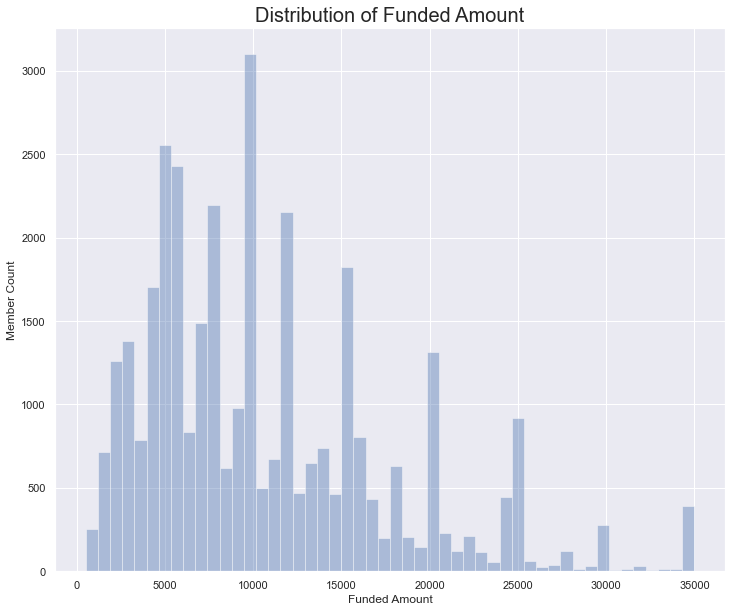

In [141]:
sns.distplot(raw_data['funded_amnt'], kde=False)
plt.xlabel("Funded Amount")
plt.ylabel("Member Count")
plt.title('Distribution of Funded Amount', fontdict={'fontsize': 20})
plt.show()

**Observation(s)**
- **Variable is Continuous, ranging from 500 to 35,000 USD.**
- Majority of Funding Amount is less than USD 15,000

#### 3.1.1 Analysing Fully Paid + Charged Off Members

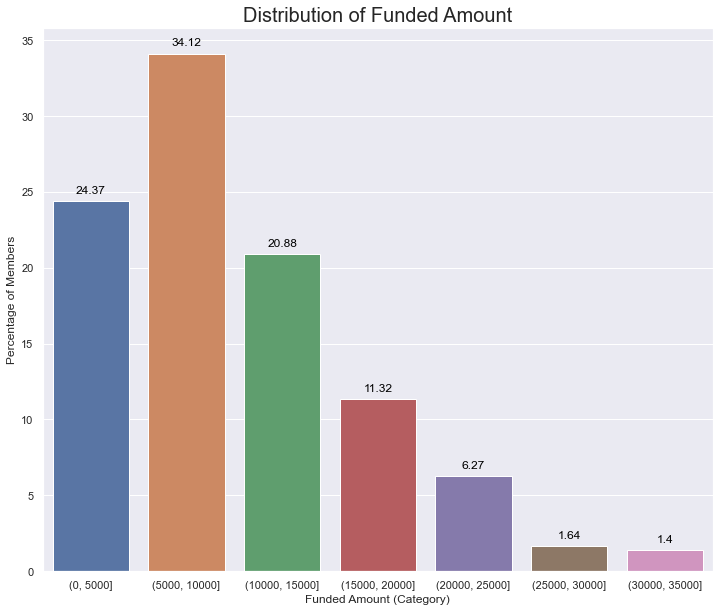

In [142]:
funded_amnt_dist = raw_data.funded_amount_category.value_counts(normalize=True, sort=False)*100
population_distribution(data=funded_amnt_dist, graph_title='Distribution of Funded Amount',
                        x_axis_label='Funded Amount (Category)', y_axis_label='Percentage of Members', 
                        data_label='horizontal', x_label_rotation=0)

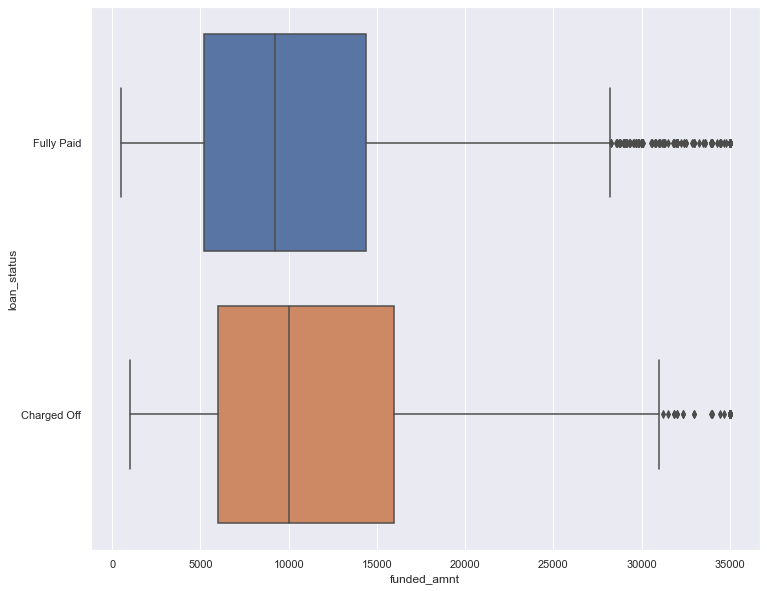

In [143]:
sns.boxplot(x=raw_data['funded_amnt'], y=raw_data['loan_status'], data=raw_data)
plt.show()

In [144]:
raw_data.groupby('loan_status')['funded_amnt'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4874.0,11804.872794,7649.547537,1000.0,6000.0,10000.0,16000.0,35000.0
Fully Paid,29788.0,10538.142876,6797.983701,500.0,5200.0,9200.0,14400.0,35000.0


**Observation(s)**
- Distribution is maximum in the range of 5,000 to 10,000 USD
- Overall Funding Amount potray a right skewed behaviour (with mean greater than median)
- From the Box plot, it is evident that, loans which are Charged Off are shifted towards higher mean as compared to Fully Paid.

#### 3.1.2 Analysing Charged Off Members Only

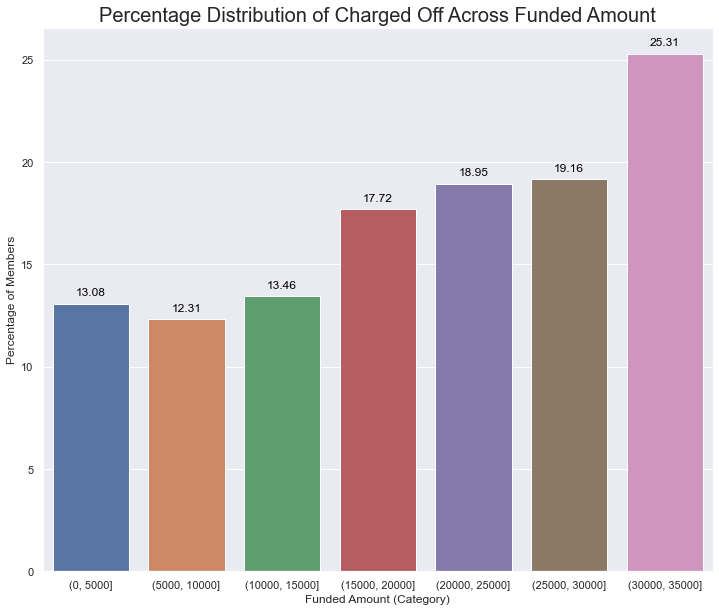

In [145]:
funded_amount_df = raw_data.pivot_table(index='funded_amount_category', columns='loan_status', values='member_id', aggfunc='count')
funded_amount_df = distribution_against_charged_off_members(data=funded_amount_df,
                                         graph_title='Percentage Distribution of Charged Off Across Funded Amount',
                                         x_axis_label='Funded Amount (Category)')

**Observation(s)**
- As the funding amount increases, number of defaulters (charged off) also increases.
- Also, this indicates postive correlation.

#### 3.1.3 To verify this, we'll calculate the Correlation Co-efficient & Pearson Value to proove this behaviour mathematically.


Generating Pearson Value For Funding Amount on X-Axis and Charged Off Percentage Member Count on Y-Axis


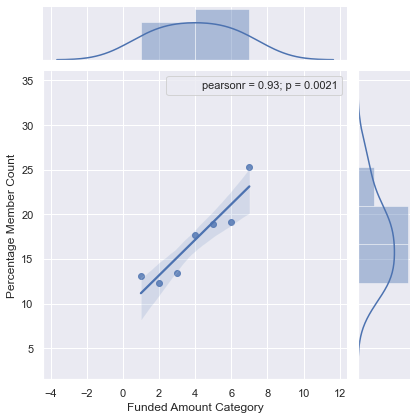



Dataframe Representing Corrrelation Co-efficient between Funding Amount and Percentage Member Count


,Funding Amount,Charged Off
Funding Amount,1.00000,0.93411
Charged Off,0.93411,1.00000


In [146]:
mathematical_function(data=funded_amount_df, column_name='Funding Amount',
                      x_label='Funded Amount Category')

**Inference**
- As the Funding Amount Increases, percentage of Charged off values also increases, which is prooved mathematically as well.

### 3.2 Analysis of Term column

In [147]:
raw_data.groupby(by='term').term.count()

term
36    25888
60     8774
Name: term, dtype: int64

#### 3.2.1 Analysing Fully Paid + Charged Off Members

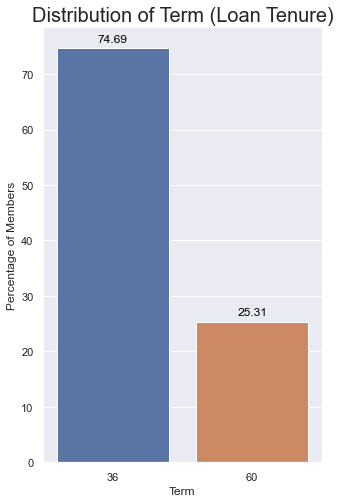

In [148]:
term_dist = raw_data.term.value_counts(normalize=True, sort=False)*100
plt.figure(figsize=(5,8))
population_distribution(data=term_dist, graph_title='Distribution of Term (Loan Tenure)', x_axis_label='Term')

**Observation(s)**
- **Variable is a Categorical Ordered variable,with categories 36 and 60 as term length.**
- Almost 3/4th of all the loans, constitute of Term equal to 3 Years and rest equals 5 Years.

#### 3.2.2 Analysing Charged Off Members Only

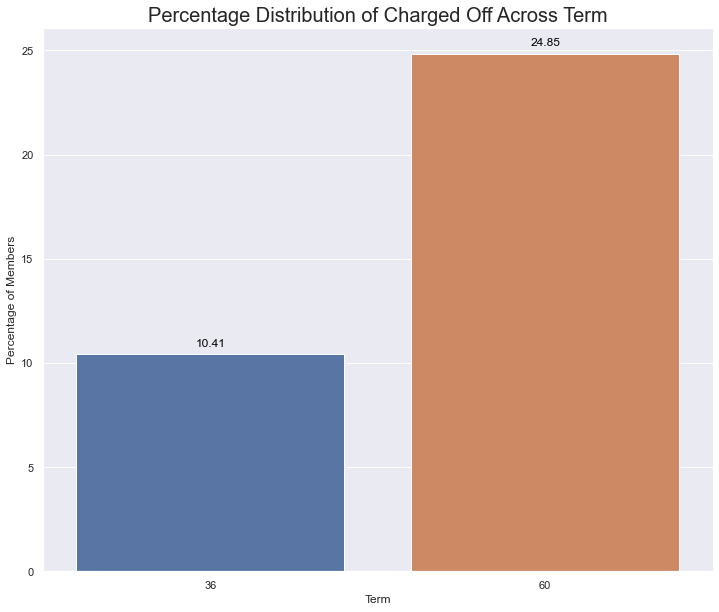

In [149]:
term_df = raw_data.pivot_table(index='term', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
term_df = distribution_against_charged_off_members(data=term_df,
                                         graph_title='Percentage Distribution of Charged Off Across Term',
                                         x_axis_label='Term')

**Observation**
- From percentage distribution of Charged Off category, we can observe that 24% applicant defaulted when term is 5 Years and comparatively only 10% are defaulted when term is of 3 Years.
- It is also clear that with 60 month term chances of default increases considerably.

##### Note: This variable correlation cannot be prooved mathematically, since there are only 2 categories present here. (However, overall trend is positive.)

### 3.3 Analysis of "Interest Rate" column

In [150]:
raw_data.int_rate.describe()

count    34662.000000
mean        11.958255
std          3.690370
min          5.420000
25%          8.940000
50%         11.830000
75%         14.460000
max         24.400000
Name: int_rate, dtype: float64

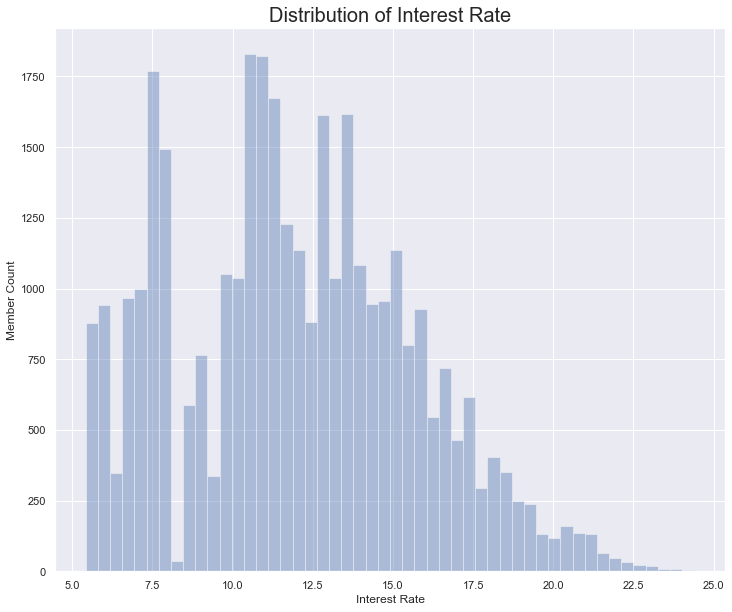

In [151]:
sns.distplot(raw_data['int_rate'], kde=False)
plt.xlabel("Interest Rate")
plt.ylabel("Member Count")
plt.title('Distribution of Interest Rate', fontdict={'fontsize': 20})
plt.show()

**Observation**
- **Interest rate is continuous variable, ranging from 5.42 to 24.4%.**
- Mean and Median for the data is close, points are well distributed about mean.

#### 3.3.1 Analysing Fully Paid + Charged Off Members

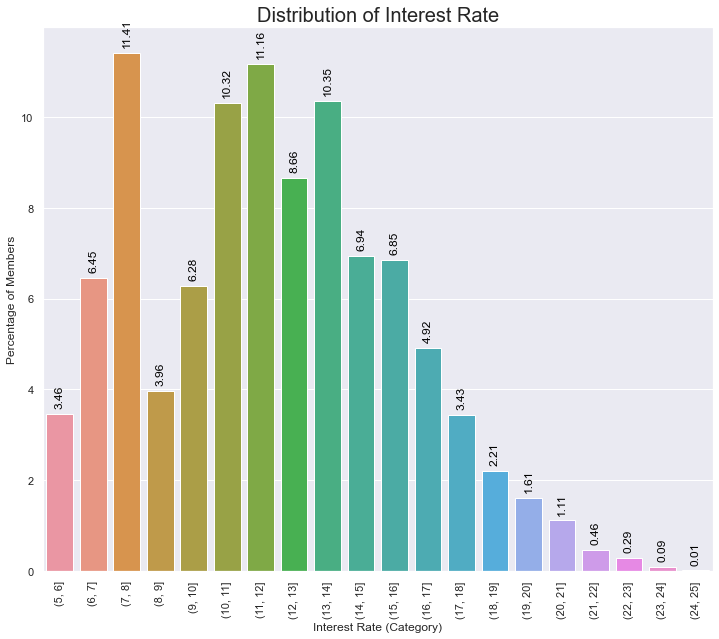

In [152]:
int_rate_dist = raw_data.int_rate_category.value_counts(normalize=True, sort=False)*100
population_distribution(data=int_rate_dist, graph_title='Distribution of Interest Rate',
                        x_axis_label='Interest Rate (Category)', data_label='vertical', x_label_rotation=90)

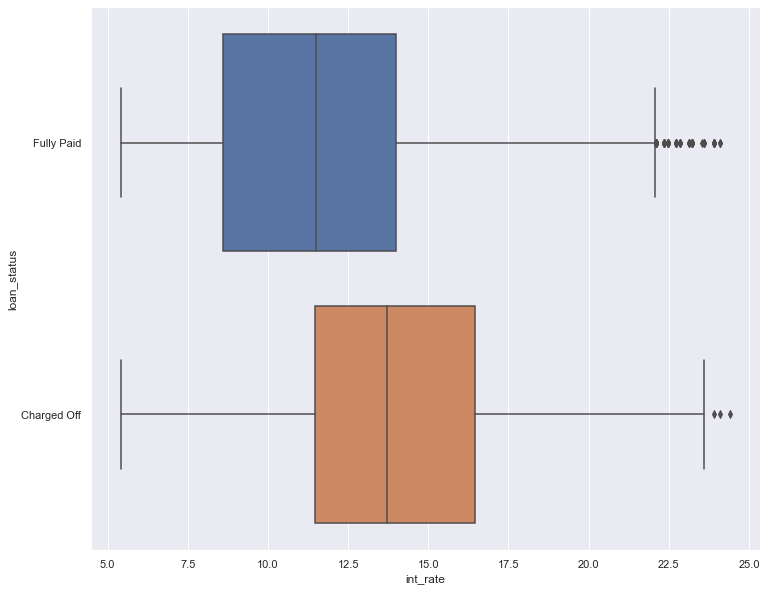

In [153]:
sns.boxplot(x=raw_data['int_rate'], y=raw_data['loan_status'], data=raw_data)
plt.show()

In [154]:
raw_data.groupby(['loan_status'])['int_rate'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4874.0,13.903816,3.637104,5.42,11.48,13.72,16.45,24.40
Fully Paid,29788.0,11.639917,3.600337,5.42,8.59,11.49,13.99,24.11


**Observation**
- We can see that, distribution of interest rate between 25% & 75% percentile is higher for Charged Off members as compared to Fully Paid members.
- Reason might be that, bank wants to recover their amount from interest as quickly as possible, hence they have levy high interest rate on risky applicants.

#### 3.3.2 Analysing Charged Off Members Only

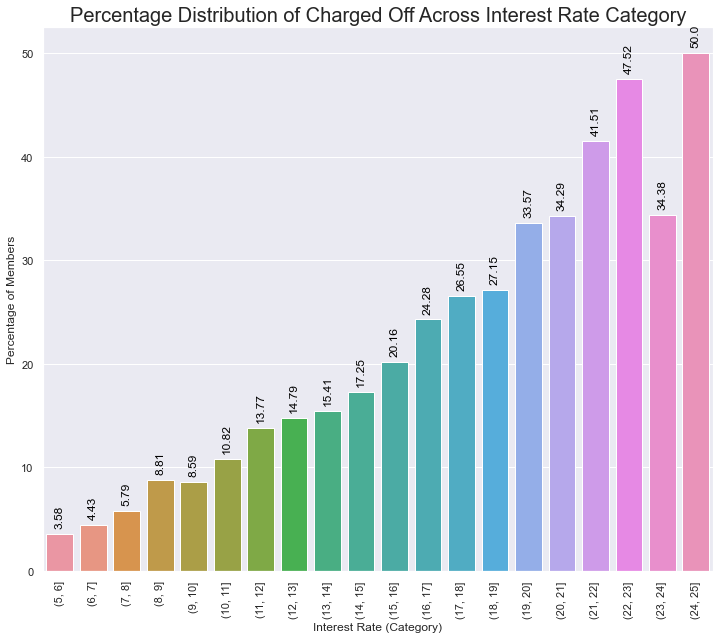

In [155]:
interest_rate_df = raw_data.pivot_table(index='int_rate_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
interest_rate_df = distribution_against_charged_off_members(data=interest_rate_df,
                                         graph_title='Percentage Distribution of Charged Off Across Interest Rate Category',
                                         x_axis_label='Interest Rate (Category)', data_label='vertical', x_label_rotation=90)

**Observation(s)**
- We see that, as the Interest increases, proportion of members getting default also increases.

#### 3.3.3 To verify this, we'll calculate the Correlation Co-efficient & Pearson Value to proove this behaviour mathematically.


Generating Pearson Value For Interest Rate on X-Axis and Charged Off Percentage Member Count on Y-Axis


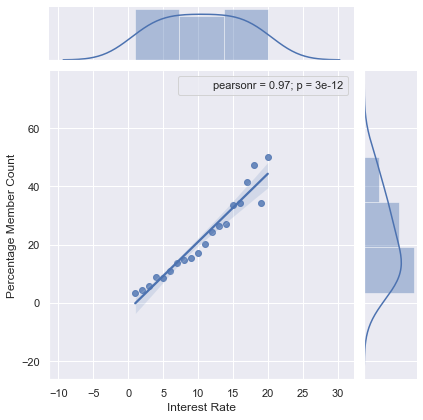



Dataframe Representing Corrrelation Co-efficient between Interest Rate and Percentage Member Count


,Interest Rate,Charged Off
Interest Rate,1.000000,0.967947
Charged Off,0.967947,1.000000


In [156]:
mathematical_function(data=interest_rate_df, column_name='Interest Rate',
                      x_label='Interest Rate')

**Inference**
- As the Interest Rate Increases, percentage of Charged off values also increases, which is prooved mathematically as well.

### 3.4 Analysis of "Grade" column.

In [157]:
raw_data.groupby(by='grade').grade.count()

grade
A     9012
B    10524
C     7037
D     4562
E     2399
F      861
G      267
Name: grade, dtype: int64

#### 3.4.1 Analysing Fully Paid + Charged Off Members

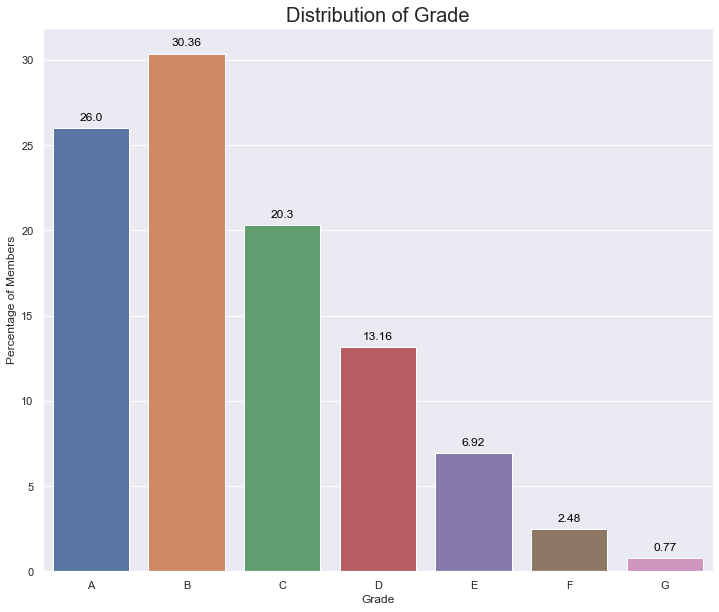

In [158]:
grade_dist = raw_data.groupby(by='grade').grade.count() / len(raw_data) * 100
population_distribution(data=grade_dist, graph_title='Distribution of Grade',
                        x_axis_label='Grade')

**Observation(s)**
- **Grade, ordered categorical variable, A,B,C,D,E,F,G.**
- Maximum count is observed for B (i.e. 30.36%)

#### 3.4.2 Analysing Charged Off Members Only

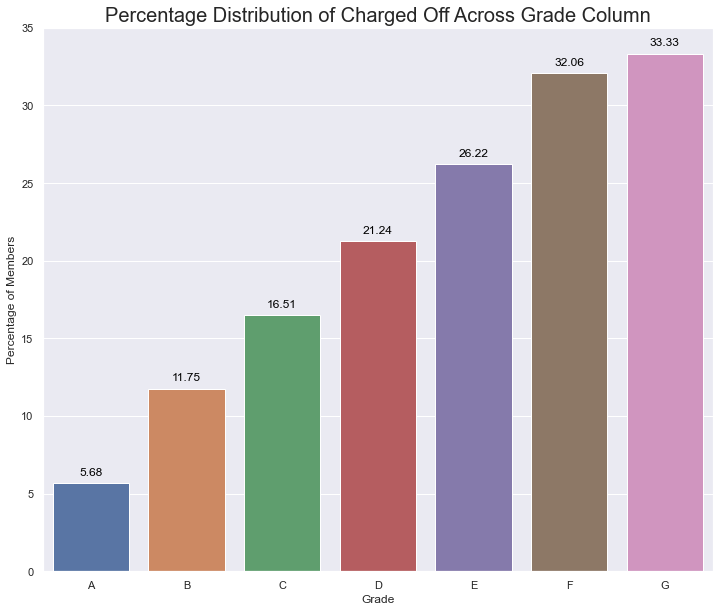

In [159]:
grade_df = raw_data.pivot_table(index='grade', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
grade_df = distribution_against_charged_off_members(data=grade_df,
                                         graph_title='Percentage Distribution of Charged Off Across Grade Column',
                                         x_axis_label='Grade')

**Observation(s)**
- Assuming that the grade column has been implemented by the bank, to denote risky applicant, this model can be very much useful in identifying those applicants.
- We can also see that, all the applicants covered under Grade E, F & G are very much risky.
- As we from A --> B --> uptill G, percentage of Charged Off applicants increases (by just visualising data).

#### 3.4.3 To verify this, we'll calculate the Correlation Co-efficient & Pearson Value to proove this behaviour mathematically.
##### But, before this, we will map the index column which are graded A, B, C etc to numbers like 1, 2, 3 etc.


Generating Pearson Value For Grade (Mapped Value) on X-Axis and Charged Off Percentage Member Count on Y-Axis


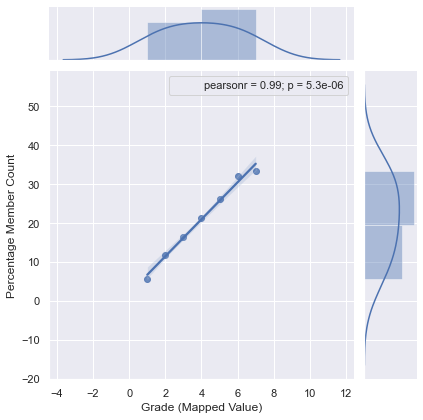



Dataframe Representing Corrrelation Co-efficient between Grade (Mapped Value) and Percentage Member Count


,Grade (Mapped Value),Charged Off
Grade (Mapped Value),1.000000,0.994032
Charged Off,0.994032,1.000000


In [160]:
mathematical_function(data=grade_df, column_name='Grade (Mapped Value)',
                      x_label='Grade (Mapped Value)')

**Inference**
- As the Grade Moves Upwards (from A towards G), percentage of Charged off values also increases, which is prooved mathematically as well.

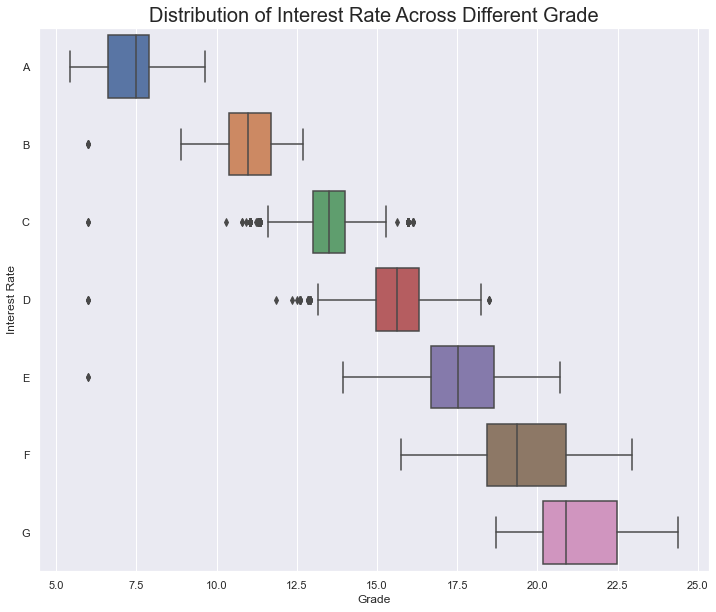

In [161]:
sns.boxplot(raw_data.int_rate, raw_data['grade'], order=['A','B','C','D','E','F','G'])
plt.title("Distribution of Interest Rate Across Different Grade", fontdict={'fontsize': 20})
plt.xlabel("Grade")
plt.ylabel("Interest Rate")
plt.show()

**Observation**
- When Grade Column is plotted against Interest Rate, we ought to observe this behavior wherein majority charged off applicants (which are in Grade G) are levied with higher interest rate to recover the principal amount.

### 3.5 Analysis of "Sub-Grade (Only Numbers)" column

In [162]:
raw_data.groupby(by='sub_grade_only_number').grade.count()

sub_grade_only_number
1    6291
2    6876
3    7134
4    7300
5    7061
Name: grade, dtype: int64

#### 3.5.1 Analysing Fully Paid + Charged Off Members

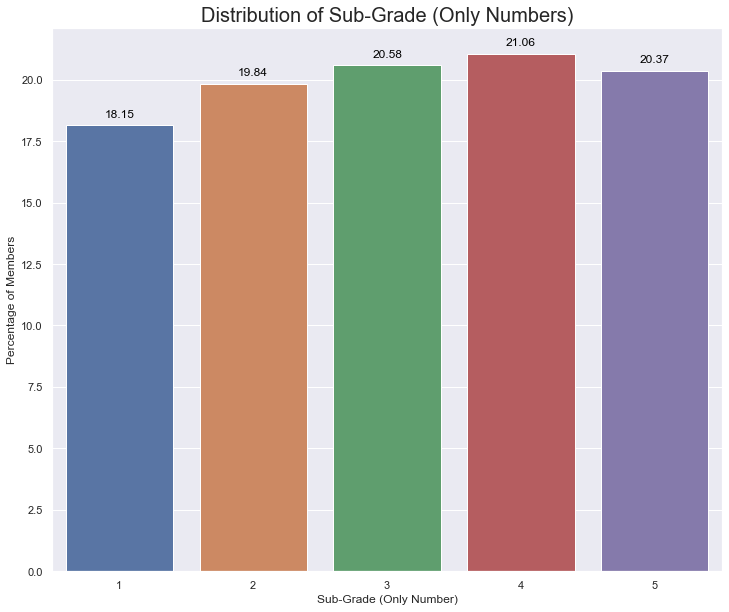

In [163]:
sub_grade_only_number_dist = raw_data.groupby(by='sub_grade_only_number').grade.count() / len(raw_data) * 100
population_distribution(data=sub_grade_only_number_dist, graph_title='Distribution of Sub-Grade (Only Numbers)',
                        x_axis_label='Sub-Grade (Only Number)')

#### 3.5.2 Analysing Charged Off Members Only

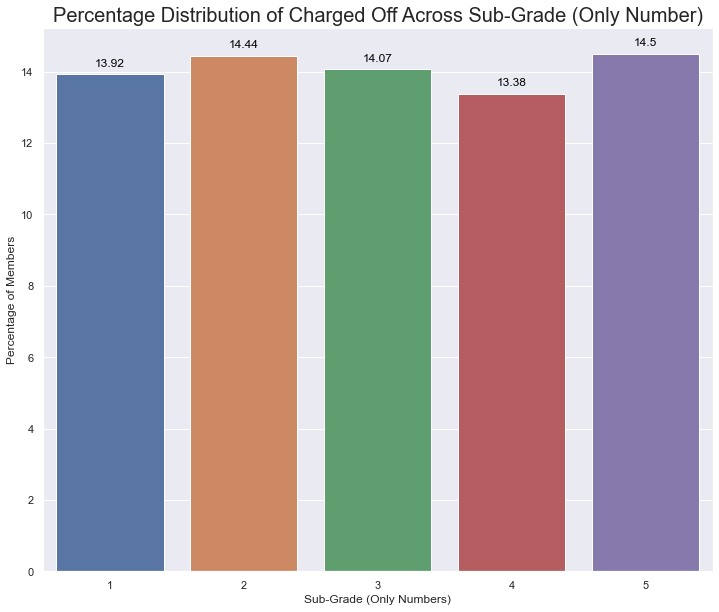

In [164]:
sub_grade_num_df = raw_data.pivot_table(index='sub_grade_only_number', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
sub_grade_num_df = distribution_against_charged_off_members(data=sub_grade_num_df,
                                         graph_title='Percentage Distribution of Charged Off Across Sub-Grade (Only Number)',
                                         x_axis_label='Sub-Grade (Only Numbers)')

**Observations**
- When taking into considertion the 'Charged Off' data only, we dont see any considerable change or a pattern. So, we can neglect making use of Sub-Grade Numbers Only


Generating Pearson Value For Sub-Grade(Only Numbers) on X-Axis and Charged Off Percentage Member Count on Y-Axis


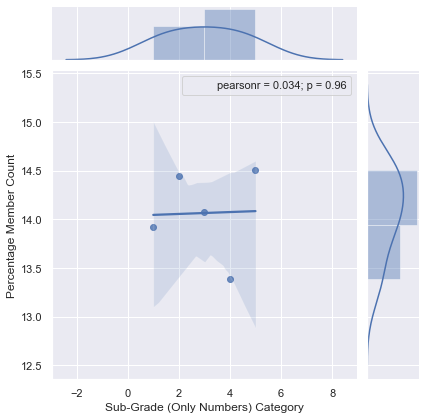



Dataframe Representing Corrrelation Co-efficient between Sub-Grade(Only Numbers) and Percentage Member Count


,Sub-Grade(Only Numbers),Charged Off
Sub-Grade(Only Numbers),1.000000,0.033973
Charged Off,0.033973,1.000000


In [165]:
mathematical_function(data=sub_grade_num_df, column_name='Sub-Grade(Only Numbers)',
                      x_label='Sub-Grade (Only Numbers) Category')

**Inference**
- Since, the correlation value are very small (almsot equal to 0), we can say that only Sub-Grade (Numbers Only) have no relation with Charged Off Percent as a standalone variable.

### 3.6 Analysis of "Sub-Grade" columns

In [166]:
raw_data.groupby(by='sub_grade').grade.count()

sub_grade
A1     991
A2    1338
A3    1610
A4    2626
A5    2447
B1    1589
B2    1791
B3    2533
B4    2212
B5    2399
C1    1838
C2    1763
C3    1335
C4    1071
C5    1030
D1     830
D2    1162
D3     999
D4     826
D5     745
E1     675
E2     548
E3     464
E4     387
E5     325
F1     282
F2     204
F3     153
F4     129
F5      93
G1      86
G2      70
G3      40
G4      49
G5      22
Name: grade, dtype: int64

#### 3.6.1 Analysing Fully Paid + Charged Off Members

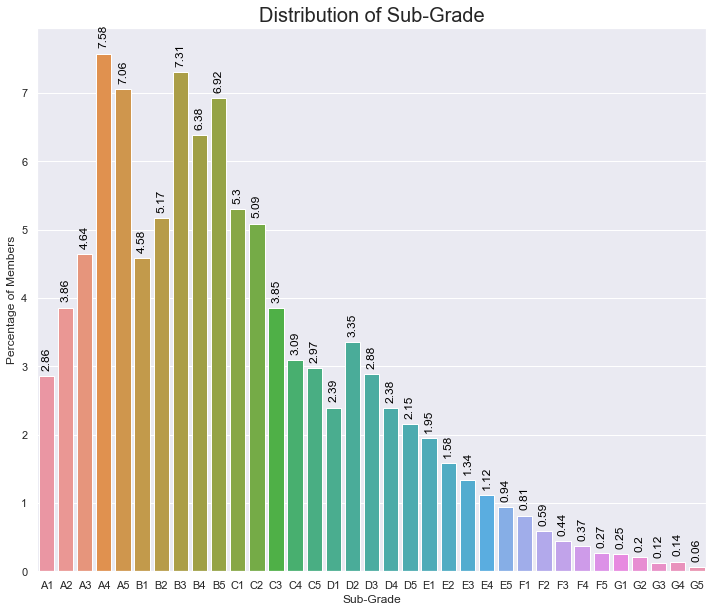

In [167]:
sub_grade_dist = raw_data.groupby(by='sub_grade').grade.count() / len(raw_data) * 100
population_distribution(data=sub_grade_dist, graph_title='Distribution of Sub-Grade',
                        x_axis_label='Sub-Grade', y_axis_label='Percentage of Members', 
                        data_label='vertical')

**Observation(s)**
- **Sub Grade is Categorical Variable (A1 --> A2 --> .... G4 --> G5)**
- Majority of applicants are observed to be in the range of (A1 --> A2 -->) uptill (C4 --> C5)
- On comparing the entire data consisting of both Fully Paid & Charged Off, we see that as the Sub-Grade moves from (A1-->A2-->A3-->) uptil (-->G3-->G4-->G5), Percentage of Applicants / Members also decreases.

#### 3.6.2 Analysing Charged Off Members Only

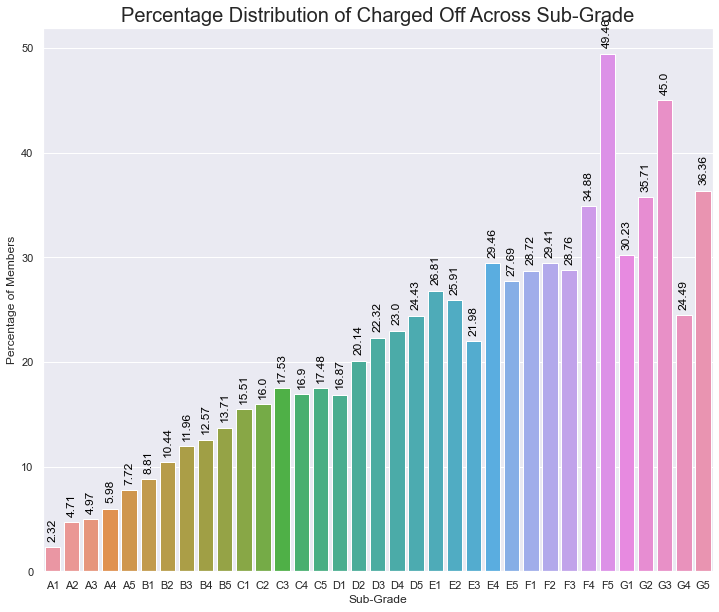

In [168]:
sub_grade_df = raw_data.pivot_table(index='sub_grade', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
sub_grade_df = distribution_against_charged_off_members(data=sub_grade_df, 
                                         graph_title='Percentage Distribution of Charged Off Across Sub-Grade',
                                         x_axis_label='Sub-Grade', data_label='vertical')

**Observations**
- When taking into considertion the 'Charged Off' data only, we see an increasing pattern.
- With this again, assuming that the sub-grade column has been implemented by the bank, to denote risky applicant, this model can be very much useful in identifying those risky applicants.

#### 3.6.3 To verify this, we'll calculate the Correlation Co-efficient & Pearson Value to proove this behaviour mathematically.
##### But, before this, we will map the index column which are graded A1, A2, A3 etc to numbers like 0, 1, 2 etc.


Generating Pearson Value For Sub-Grade on X-Axis and Charged Off Percentage Member Count on Y-Axis


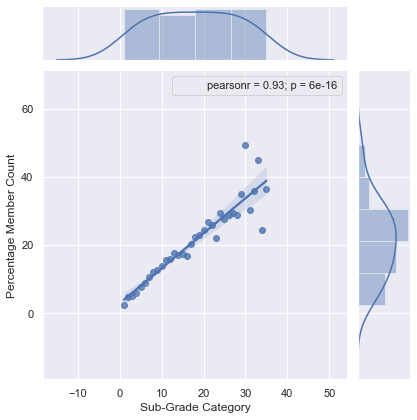



Dataframe Representing Corrrelation Co-efficient between Sub-Grade and Percentage Member Count


,Sub-Grade,Charged Off
Sub-Grade,1.000000,0.930495
Charged Off,0.930495,1.000000


In [169]:
mathematical_function(data=sub_grade_df, column_name='Sub-Grade',
                      x_label='Sub-Grade Category')

**Inference**
- As the Sub-Grade Moves Upwards (from A1, A2 towards G1, G2), percentage of Charged off values also increases, which is prooved mathematically as well.

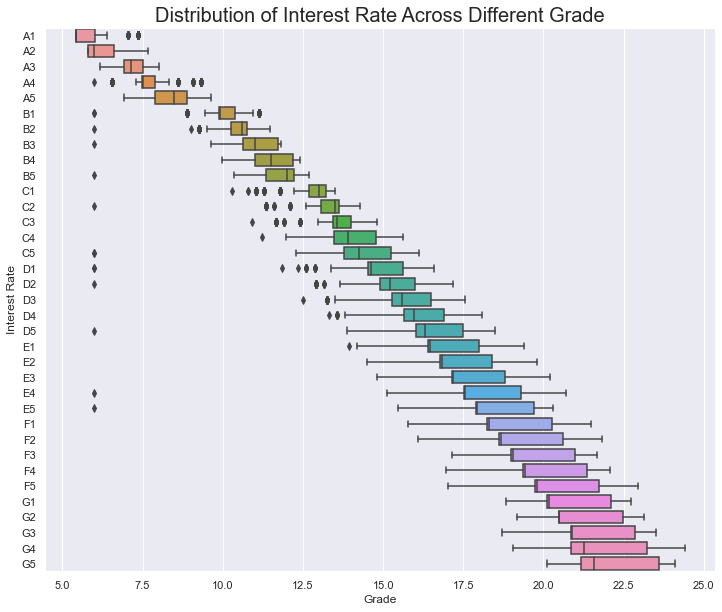

In [170]:
sns.boxplot(raw_data.int_rate, raw_data['sub_grade'], order=list(raw_data.groupby(by='sub_grade').sub_grade.count().index))
plt.title("Distribution of Interest Rate Across Different Grade", fontdict={'fontsize': 20})
plt.xlabel("Grade")
plt.ylabel("Interest Rate")
plt.show()

**Observation**
- When Sub-Grade Column is plotted against Interest Rate, we are expected to observe this behavior wherein majority charged off applicants are levied with higher interest rate to recover the principal amount.

### 3.7 Analysis of "Employee Title" column

#### 3.7.1 Analysing Fully Paid + Charged Off Members

In [171]:
raw_data.emp_title.value_counts().head(10)

us army              284
self employed        131
bank of america      129
us air force         114
walmart              107
us postal service    106
at&t                  87
jp morgan chase       83
us navy               77
kaiser permanente     66
Name: emp_title, dtype: int64

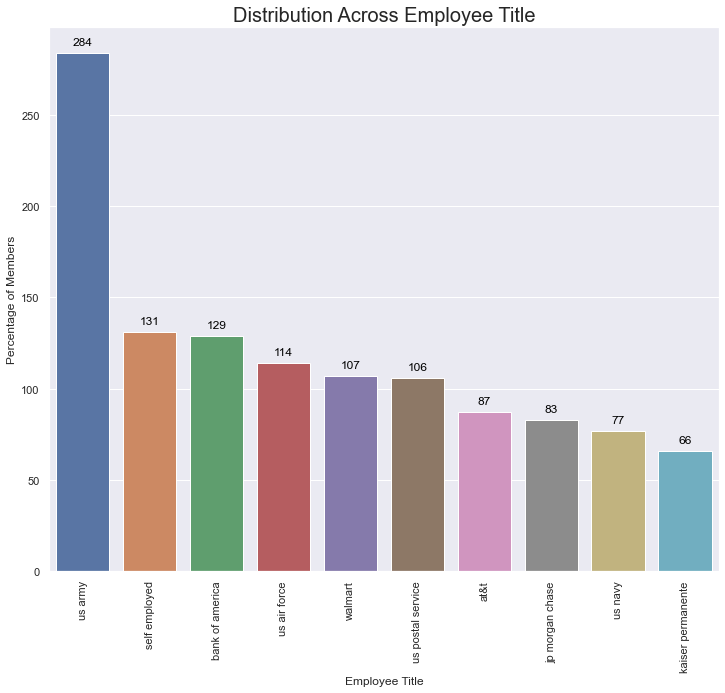

In [172]:
emp_title_dist = raw_data.emp_title.value_counts().head(10)
population_distribution(data=emp_title_dist, graph_title='Distribution Across Employee Title',
                        x_axis_label='Employee Title', x_label_rotation=90)

**Observation**
- **Employee Title is a Categorical Nominal Variable.**

#### 3.7.2 Analysing Charged Off Members Only

##### We will try to count percentage of charged off members for every Employee Title, to identfy risky applicants connected to specific Employee Title

In [173]:
ser_1 = raw_data[raw_data['loan_status'] == 'Fully Paid'].emp_title.value_counts()
ser_1 = ser_1.rename('Fully Paid')
ser_2 = raw_data[raw_data['loan_status'] == 'Charged Off'].emp_title.value_counts()
ser_2 = ser_2.rename('Charged Off')
emp_title_df = pd.concat([ser_1, ser_2], axis=1)
emp_title_df['total_count'] = emp_title_df['Charged Off']+emp_title_df['Fully Paid']
emp_title_df['charged_off_percent'] = round(emp_title_df['Charged Off'] / emp_title_df['total_count'] * 100, 2)
emp_title_df = emp_title_df.sort_values('charged_off_percent', ascending=False)
emp_title_df = emp_title_df[emp_title_df['total_count'] > 10].head(25)
emp_title_df = emp_title_df.drop(columns=['total_count', 'charged_off_percent']).head(25)
emp_title_df

,Fully Paid,Charged Off
marriott international,7.0,4.0
usmc,11.0,6.0
lowes,10.0,5.0
macys,10.0,5.0
cablevision,8.0,4.0
american airlines,13.0,6.0
state of michigan,9.0,4.0
macy's,10.0,4.0
costco,10.0,4.0
retired,18.0,7.0


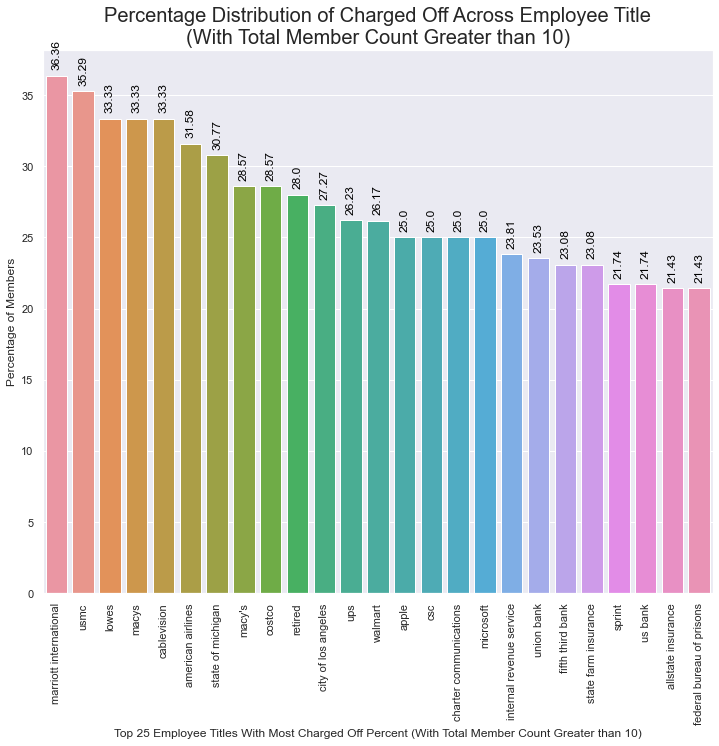

In [174]:
emp_title_df = distribution_against_charged_off_members(data=emp_title_df,
                                         graph_title='Percentage Distribution of Charged Off Across Employee Title\n(With Total Member Count Greater than 10)',
                                         x_axis_label='Top 25 Employee Titles With Most Charged Off Percent (With Total Member Count Greater than 10)',
                                         data_label='vertical', x_label_rotation=90)

##### Note: Evaluating Trendling / Correlations will not be applicable as Employee Title is Categorical Nominal Variable.

### 3.8 Analysis of "Employee Length" column

In [175]:
raw_data.groupby(by='emp_length').emp_length.count()

emp_length
0.0     3924
1.0     2916
2.0     4010
3.0     3766
4.0     3143
5.0     2986
6.0     2024
7.0     1607
8.0     1326
9.0     1160
10.0    7800
Name: emp_length, dtype: int64

#### 3.8.1 Analysing Fully Paid + Charged Off Members

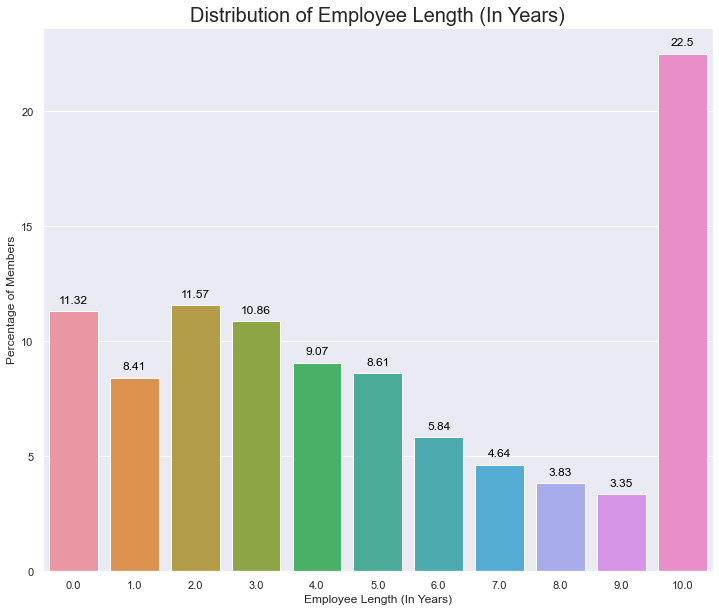

In [176]:
emp_length_dist = raw_data.groupby(by='emp_length').emp_length.count() / len(raw_data) * 100
population_distribution(data=emp_length_dist, graph_title='Distribution of Employee Length (In Years)',
                        x_axis_label='Employee Length (In Years)', data_label='horizontal', x_label_rotation=0)

**Observation**
- **Employee Length, categorical length ordinal data, varies from 0(no exp) to 10 (10+ exp)**
- Considering Univariate Analysis of Employee Length column, percentage of members decreases as Employee Length Increases. (Except 10+)
- Maximum applicants have 10+ experiance, i.e. 22.5% applicants are in 10+ category. However, the reason behind this can be, clubbing of all the employee length into one group. (i.e. 10, 11, 12, 13 etc. all in one group)

#### 3.8.2 Analysing Charged Off Members Only

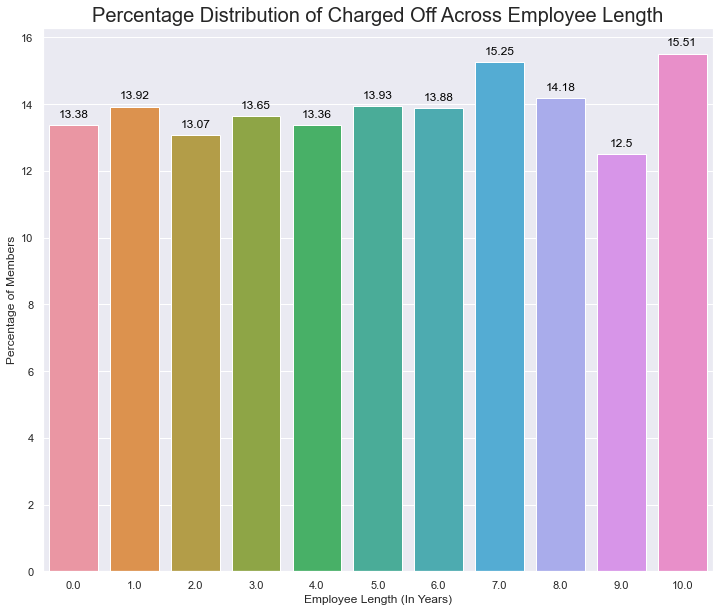

In [177]:
emp_len_df = raw_data.pivot_table(index='emp_length', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
emp_len_df = distribution_against_charged_off_members(data=emp_len_df,
                                         graph_title='Percentage Distribution of Charged Off Across Employee Length',
                                         x_axis_label='Employee Length (In Years)')

**Observation**
- We see that, as the Employee Length increases, proportion of members getting default also increases although the increase is very small (visually).

#### 3.8.3 To verify this, we'll calculate the Correlation Co-efficient & Pearson Value to proove this behaviour mathematically.


Generating Pearson Value For Employee Length on X-Axis and Charged Off Percentage Member Count on Y-Axis


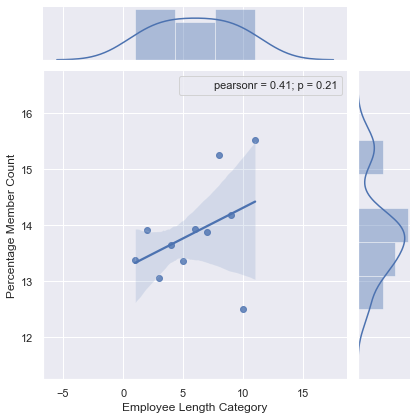



Dataframe Representing Corrrelation Co-efficient between Employee Length and Percentage Member Count


,Employee Length,Charged Off
Employee Length,1.000000,0.411464
Charged Off,0.411464,1.000000


In [178]:
mathematical_function(data=emp_len_df, column_name='Employee Length',
                      x_label='Employee Length Category')

**Inference**
- As the Employee Length Increases, percentage of Charged off values also increases, which is prooved mathematically as well.

### 3.9 Analysis of "Home Ownership" column

In [179]:
raw_data.groupby(by='home_ownership').home_ownership.count()

home_ownership
MORTGAGE    15197
OTHER          90
OWN          2462
RENT        16913
Name: home_ownership, dtype: int64

#### 3.9.1 Analysing Fully Paid + Charged Off Members

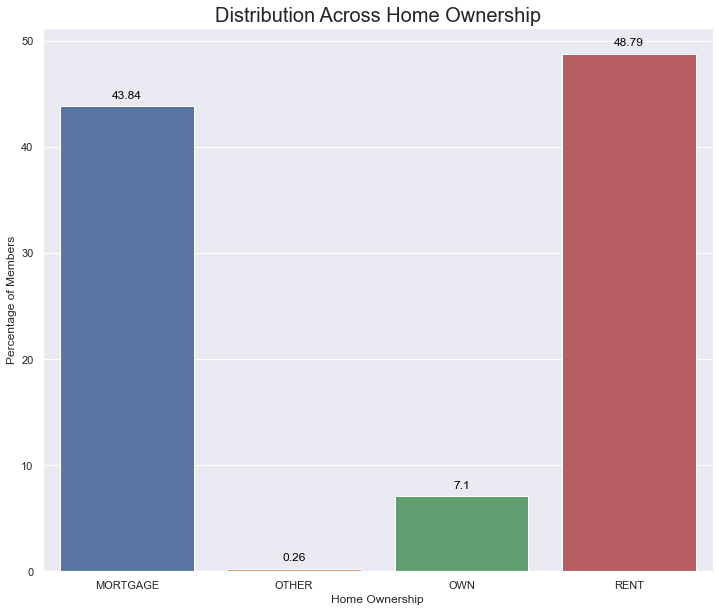

In [180]:
home_ownership_dist = raw_data.groupby(by='home_ownership').home_ownership.count() / len(raw_data) * 100
population_distribution(data=home_ownership_dist, graph_title='Distribution Across Home Ownership',
                        x_axis_label='Home Ownership')

**Observation(s)**
- **Home ownership, categorical nominal variable, available in Mortgage, Other, Own, Rent.**
- Rent category has maximum applicants i.e. 48%.

#### 3.9.2 Analysing Charged Off Members Only

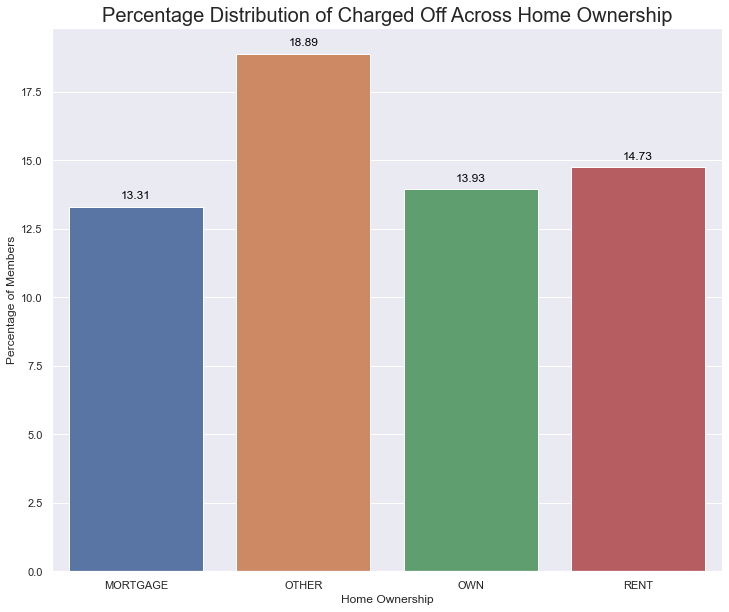

In [181]:
home_own_df = raw_data.pivot_table(index='home_ownership', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
home_own_df = distribution_against_charged_off_members(data=home_own_df, 
                                         graph_title='Percentage Distribution of Charged Off Across Home Ownership',
                                         x_axis_label='Home Ownership')

##### Note: Evaluating Trendling / Correlations will not be applicable as Home Ownership is Categorical Nominal Variable.

### 3.10 Analysis of "Annual Income" column

In [182]:
raw_data.annual_inc.describe()

count     34662.000000
mean      64322.941201
std       31684.612224
min        4000.000000
25%       41000.000000
50%       58038.500000
75%       80000.000000
max      182952.000000
Name: annual_inc, dtype: float64

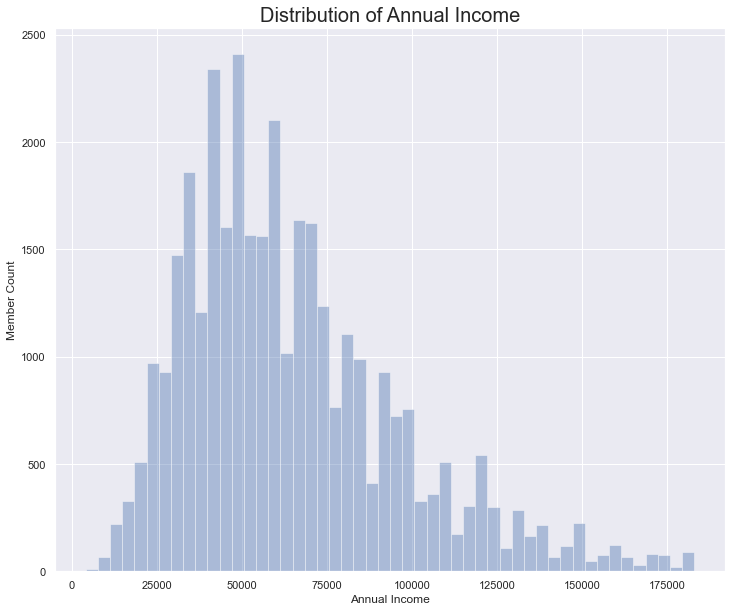

In [183]:
sns.distplot(raw_data['annual_inc'], kde=False)
plt.xlabel("Annual Income")
plt.ylabel("Member Count")
plt.title('Distribution of Annual Income', fontdict={'fontsize': 20})
plt.show()

#### 3.10.1 Analysing Fully Paid + Charged Off Members

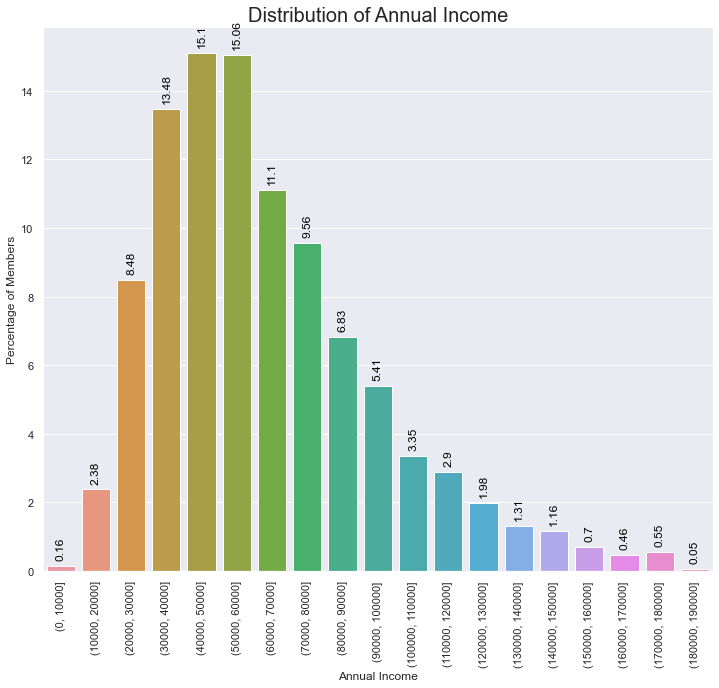

In [184]:
annual_inc_dist = raw_data.annual_inc_category.value_counts(normalize=True, sort=False)*100
population_distribution(data=annual_inc_dist, graph_title='Distribution of Annual Income',
                        x_axis_label='Annual Income', y_axis_label='Percentage of Members', 
                        data_label='vertical', x_label_rotation=90)

**Observation(s)**
- **Annual Income, Continuous Quantitative Variable, ranging from 4000 to 182952.**
- Mean of the data is around 64322, and median is around 58038.

#### 3.10.2 Analysing Charged Off Members Only

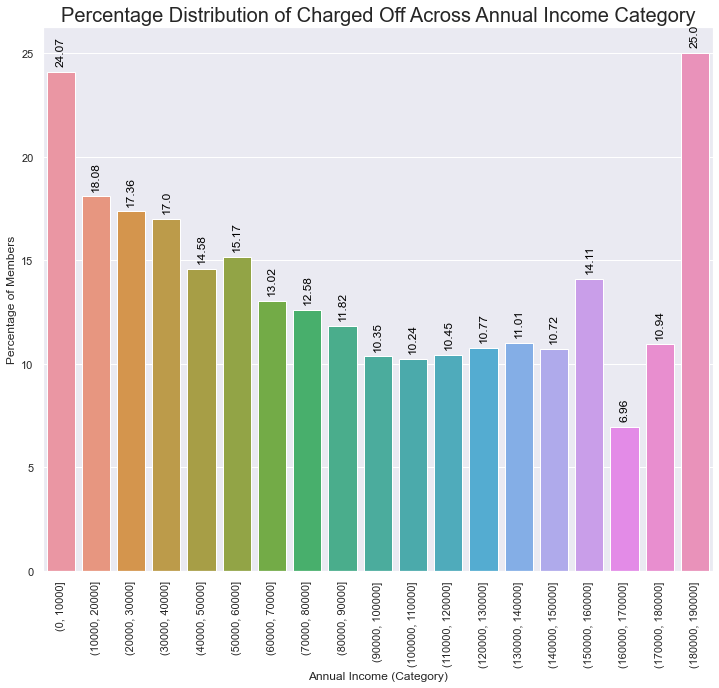

In [185]:
income_df = raw_data.pivot_table(index='annual_inc_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
income_df = distribution_against_charged_off_members(data=income_df,
                                         graph_title='Percentage Distribution of Charged Off Across Annual Income Category',
                                         x_axis_label='Annual Income (Category)', data_label='vertical', x_label_rotation=90)

**Observation**
- We see that, as the Annual Income increases, proportion of members getting default decreases.

#### 3.10.3 To verify this, we'll calculate the Correlation Co-efficient & Pearson Value to proove this behaviour mathematically.


Generating Pearson Value For Annual Income on X-Axis and Charged Off Percentage Member Count on Y-Axis


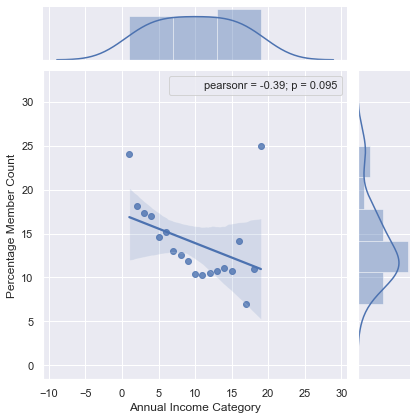



Dataframe Representing Corrrelation Co-efficient between Annual Income and Percentage Member Count


,Annual Income,Charged Off
Annual Income,1.000000,-0.393675
Charged Off,-0.393675,1.000000


In [186]:
mathematical_function(data=income_df, column_name='Annual Income',
                      x_label='Annual Income Category')

**Inference**
- As the Annual Income Increases, percentage of Charged off values Decreases, which is prooved mathematically as well.

### 3.11 Analysis of "Income Verification Status" column

In [187]:
raw_data.groupby(by='verification_status').verification_status.count()

verification_status
Not Verified       14708
Source Verified     8949
Verified           11005
Name: verification_status, dtype: int64

#### 3.11.1 Analysing Fully Paid + Charged Off Members

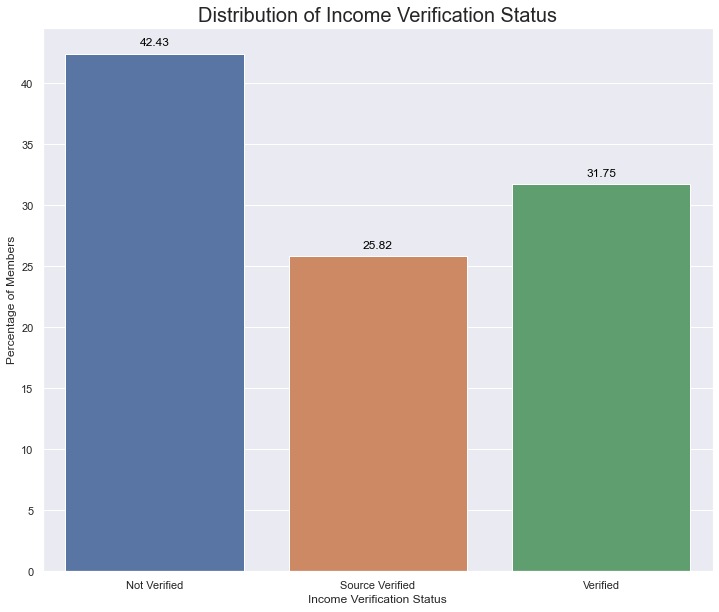

In [188]:
verification_status_dist = raw_data.groupby(by='verification_status').verification_status.count() / len(raw_data) * 100
population_distribution(data=verification_status_dist, graph_title='Distribution of Income Verification Status',
                        x_axis_label='Income Verification Status')

**Observation(s)**
- **Income verification status, categorical nominal variable, categorised as Not Verified, Source Verified, Verified.**
- In total applications "Not verified" applications are more in number, shres 42% of availabe data.

#### 3.11.2 Analysing Charged Off Members Only

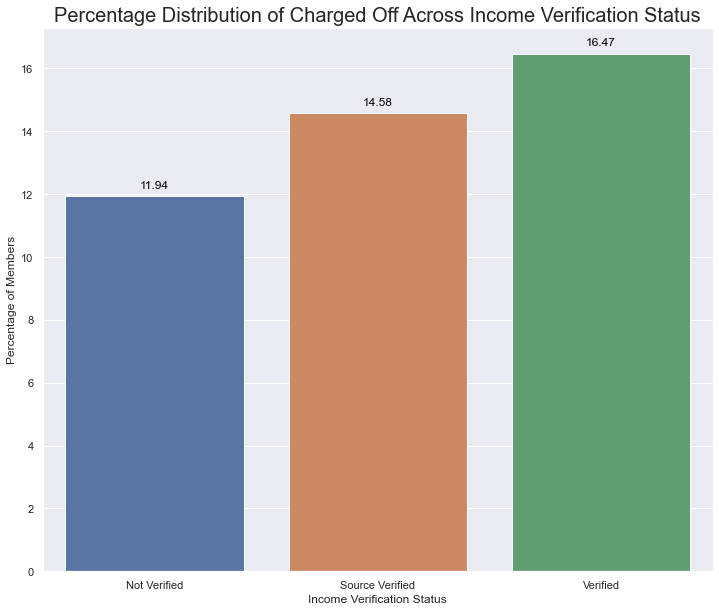

In [189]:
inc_ver_df = raw_data.pivot_table(index='verification_status', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
inc_ver_df = distribution_against_charged_off_members(data=inc_ver_df, 
                                         graph_title='Percentage Distribution of Charged Off Across Income Verification Status',
                                         x_axis_label='Income Verification Status')

**Observation(s)**
- From the above bar chart, applicants with Income Verified are more inclined towards Defaulting.

<AxesSubplot:xlabel='verification_status', ylabel='loan_amnt'>

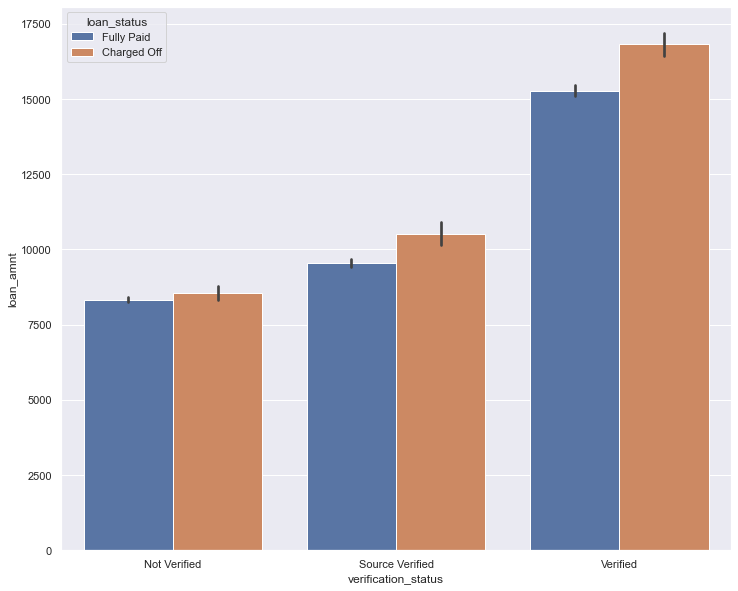

In [190]:
sns.barplot(x='verification_status', y='loan_amnt', hue="loan_status", data=raw_data, estimator=np.mean)

**Observation(s)**
- From bar chart it is evident that verified applications are mostly from higher loan amount application, and from previous observations we know that higher loan amount application have higher chances of being charged off, so in turn the inference that verified category have higher charged off cases is not entirly true.
- This is in direct effect as bias of verification is towards higher loan amount.

### 3.12 Analysis of "Issue Date (Year)" column

In [191]:
raw_data.issue_d_year.value_counts()

2011    18699
2010    10586
2009     4331
2008     1040
2007        6
Name: issue_d_year, dtype: int64

#### 3.12.1 Analysing Fully Paid + Charged Off Members

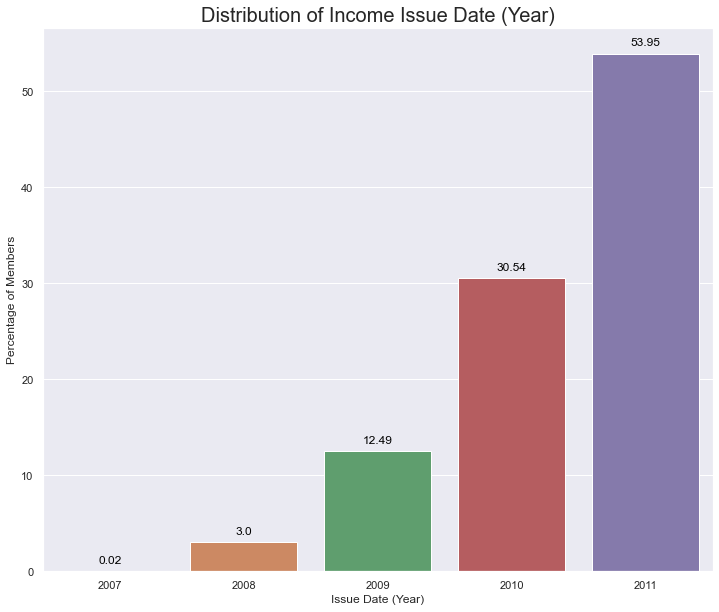

In [192]:
issue_d_year_dist = raw_data.issue_d_year.value_counts(normalize=True, sort=False)*100
population_distribution(data=issue_d_year_dist, graph_title='Distribution of Income Issue Date (Year)',
                        x_axis_label='Issue Date (Year)')

**Observation(s)**
- **Issue date year, categorical ordinal variable, categorised in 2007, 2008, 2009, 2010, 2011.**
- Number of loan applications are increasing with the year, maximum loan applications are received in 2011.

#### 3.12.2 Analysing Charged Off Members Only

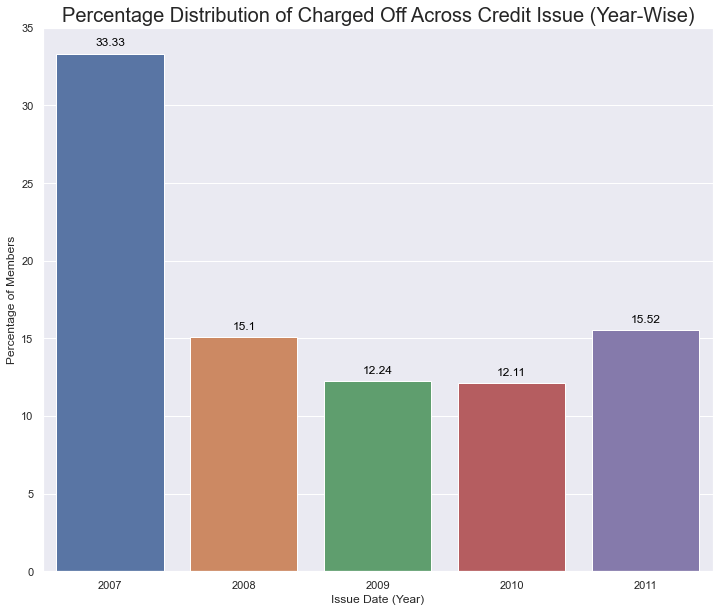

In [193]:
issue_d_year_df = raw_data.pivot_table(index='issue_d_year', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
issue_d_year_df = distribution_against_charged_off_members(data=issue_d_year_df, 
                                         graph_title='Percentage Distribution of Charged Off Across Credit Issue (Year-Wise)',
                                         x_axis_label='Issue Date (Year)')

**Observation**
- 2007 is having maximum percentage of default loans
- As the years are crossing by, defaulter list is decreasing. This means, bank officials are adopting better techniques on identifying the defaulters.

#### 3.12.3 To verify this, we'll calculate the Correlation Co-efficient & Pearson Value to proove this behaviour mathematically.


Generating Pearson Value For Credit Issue (Year) on X-Axis and Charged Off Percentage Member Count on Y-Axis


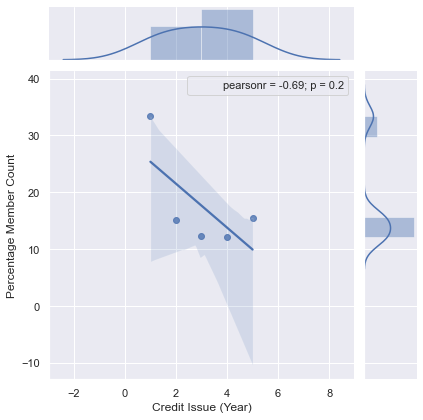



Dataframe Representing Corrrelation Co-efficient between Credit Issue (Year) and Percentage Member Count


,Credit Issue (Year),Charged Off
Credit Issue (Year),1.000000,-0.685639
Charged Off,-0.685639,1.000000


In [194]:
mathematical_function(data=issue_d_year_df, column_name='Credit Issue (Year)',
                      x_label='Credit Issue (Year)')

**Inference**
- As the Year passes by (i.e. increases), percentage of Charged off values decreases, which is prooved mathematically as well.

### 3.13 Analysis of "Issue Date (Month)" column

In [195]:
raw_data.groupby(by='issue_d_month').issue_d_month.count()

issue_d_month
1     2009
2     1987
3     2343
4     2616
5     2690
6     2913
7     3056
8     3124
9     3202
10    3352
11    3610
12    3760
Name: issue_d_month, dtype: int64

#### 3.13.1 Analysing Fully Paid + Charged Off Members

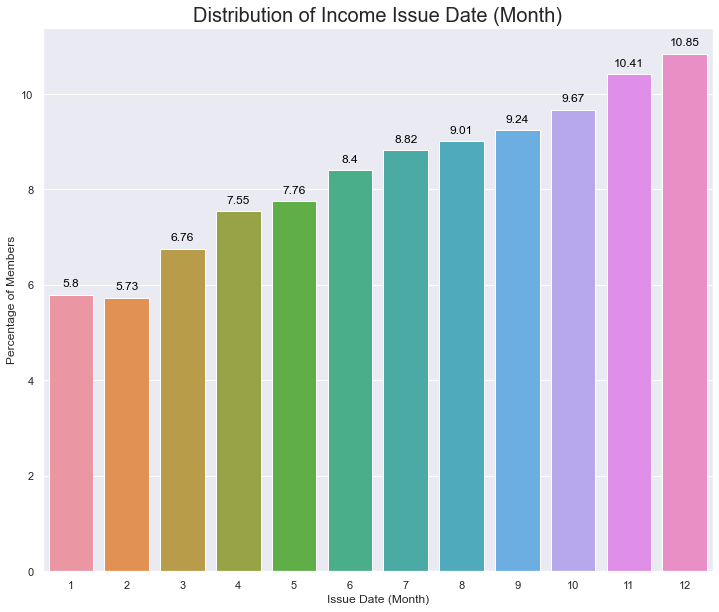

In [196]:
issue_d_month_dist = raw_data.issue_d_month.value_counts(normalize=True, sort=False)*100
population_distribution(data=issue_d_month_dist, graph_title='Distribution of Income Issue Date (Month)',
                        x_axis_label='Issue Date (Month)')

**Observation(s)**
- **Issue date year, categorical ordinal variable, categorised in 1-12.**
- Number of loan applications are increasing with the month, maximum loan applications are received in December.

#### 3.13.2 Analysing Charged Off Members Only

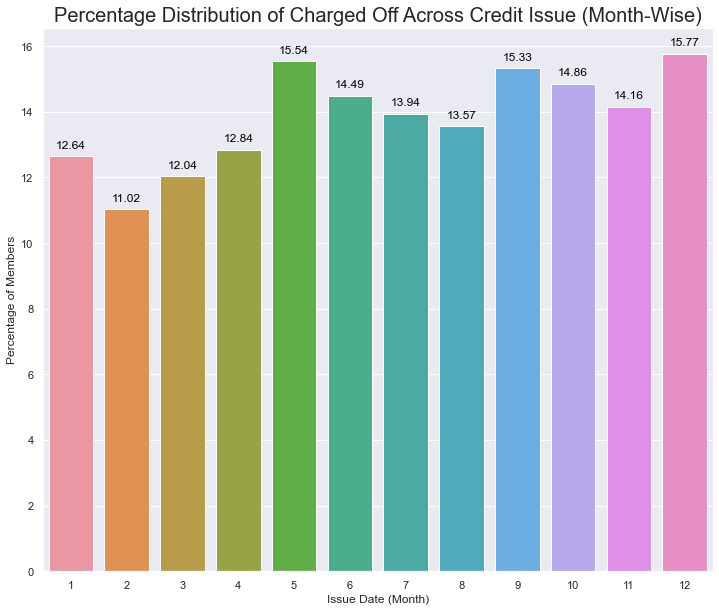

In [197]:
issue_d_mon_df = raw_data.pivot_table(index='issue_d_month', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
issue_d_mon_df = distribution_against_charged_off_members(data=issue_d_mon_df, 
                                         graph_title='Percentage Distribution of Charged Off Across Credit Issue (Month-Wise)',
                                         x_axis_label='Issue Date (Month)')

**Observations**
- There seems to be positive treand in percentage charged off categorical plot.

#### 3.13.3 To verify this, we'll calculate the Correlation Co-efficient & Pearson Value to proove this behaviour mathematically.


Generating Pearson Value For Credit Issue (Month) on X-Axis and Charged Off Percentage Member Count on Y-Axis


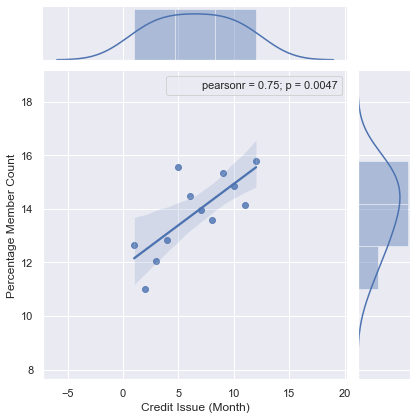



Dataframe Representing Corrrelation Co-efficient between Credit Issue (Month) and Percentage Member Count


,Credit Issue (Month),Charged Off
Credit Issue (Month),1.00000,0.75253
Charged Off,0.75253,1.00000


In [198]:
mathematical_function(data=issue_d_mon_df, column_name='Credit Issue (Month)',
                      x_label='Credit Issue (Month)')

**Inference**
- As the Month Increases (From January --> December), percentage of Charged off values also increases, which is prooved mathematically as well.

### 3.14 Analysis of "Purpose" column

In [199]:
raw_data.groupby(by='purpose').purpose.count()

purpose
Car                    1379
Credit Card            4544
Debt Consolidation    16651
Educational             271
Home Improvement       2490
House                   317
Major Purchase         1929
Medical                 606
Moving                  513
Other                  3392
Renewable Energy         82
Small Business         1309
Vacation                329
Wedding                 850
Name: purpose, dtype: int64

#### 3.14.1 Analysing Fully Paid + Charged Off Members

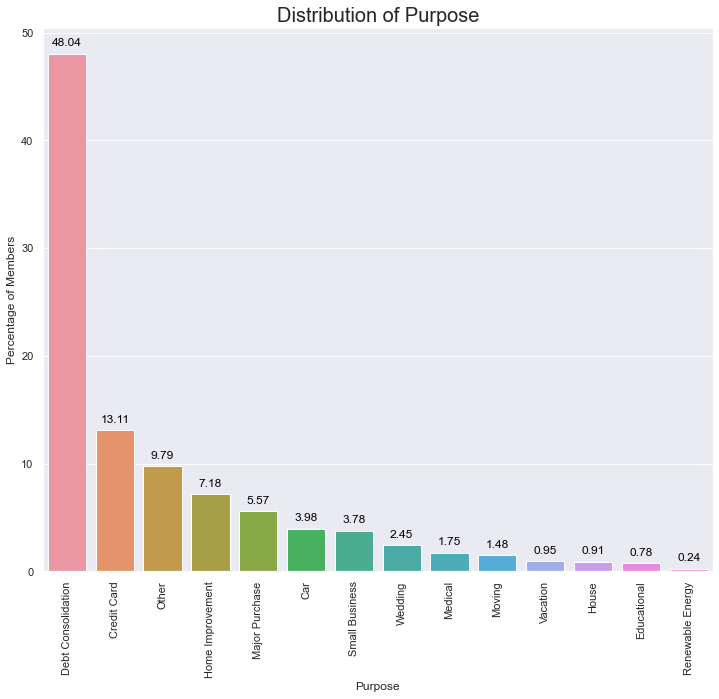

In [200]:
purpose_dist = raw_data.purpose.value_counts(normalize=True, sort=True)*100
population_distribution(data=purpose_dist, graph_title='Distribution of Purpose',
                        x_axis_label='Purpose', x_label_rotation=90)

**Observation**
- **Purpose, Categorical nominal variable, categorised in Debt Consolidation, Credit card, etc.**
- This column has total count of 34662, has unique values 17352, top title frequency is of 'Debt Consolidation'.

#### 3.14.2 Analysing Charged Off Members Only

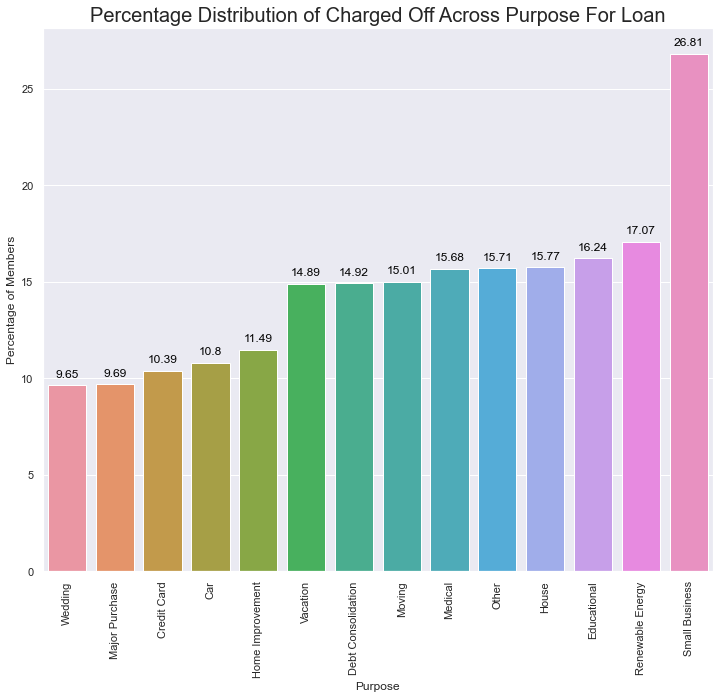

In [201]:
purpose_df = raw_data.pivot_table(index='purpose', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
purpose_df = distribution_against_charged_off_members(data=purpose_df,
                                         graph_title='Percentage Distribution of Charged Off Across Purpose For Loan',
                                         x_axis_label='Purpose', x_label_rotation=90, sort=True)

**Observation(s)**
- Small Business category has highest default applications, may be because of the risk involved in starting and sustaining of small businesses.

##### Note: Evaluating Trendling / Correlations will not be applicable as Purpose is Categorical Nominal Variable.

### 3.15 Analysis of "State" column

In [202]:
raw_data.groupby(by='addr_state_name').addr_state_name.count()

addr_state_name
Alabama            394
Alaska              70
Arizona            743
Arkansas           211
California        6268
Colorado           668
Connecticut        629
Delaware           103
Florida           2487
Georgia           1232
Hawaii             153
Idaho                3
Illinois          1347
Indiana              1
Iowa                 1
Kansas             229
Kentucky           293
Louisiana          379
Maryland           928
Massachusetts     1145
Michigan           635
Minnesota          549
Mississippi         18
Missouri           602
Montana             71
Nebraska             1
Nevada             436
New Hampshire      145
New Jersey        1613
New Mexico         159
New York          3305
North Carolina     660
Ohio              1084
Oklahoma           269
Oregon             396
Pennsylvania      1353
Rhode Island       180
South Carolina     413
South Dakota        55
Tennessee           10
Texas             2393
Utah               226
Vermont           

#### 3.15.1 Analysing Fully Paid + Charged Off Members

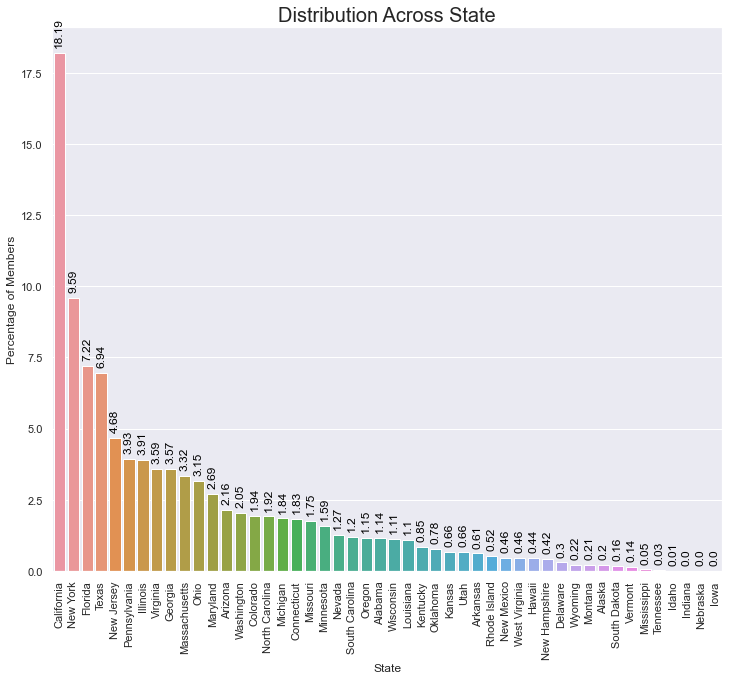

In [203]:
addr_state_name_dist = raw_data.addr_state_name.value_counts(normalize=True, sort=True)*100
population_distribution(data=addr_state_name_dist, graph_title='Distribution Across State',
                        x_axis_label='State', data_label='vertical', x_label_rotation=90)

**Observation(s)**
- **State, categorical nominal variable, categorised in different states in USA.**
- Maximum applicants are from California.

#### 3.15.2 Analysing Charged Off Members Only

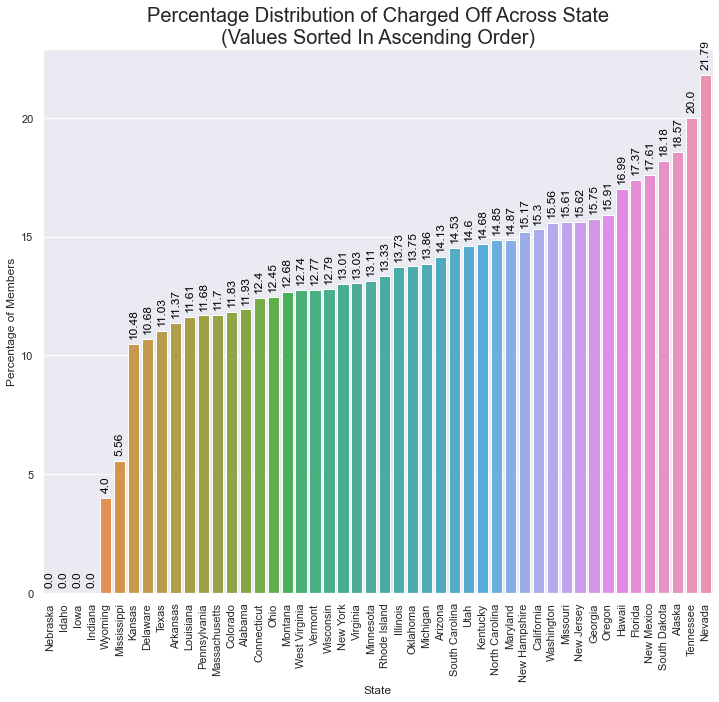

In [204]:
state_df = raw_data.pivot_table(index='addr_state_name', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
state_df = distribution_against_charged_off_members(data=state_df,
                                         graph_title='Percentage Distribution of Charged Off Across State\n(Values Sorted In Ascending Order)',
                                         x_axis_label='State', data_label='vertical', x_label_rotation=90, sort=True)

**Observation(s)**
- Nevada has maximum percentage of charged off cases.

In [205]:
Image(url="state_wise_charged_off.png")

##### Note: Evaluating Trendling / Correlations will not be applicable as State is Categorical Nominal Variable.

### 3.16 Analysis of "DTI" column

In [206]:
raw_data.dti.describe()

count    34662.000000
mean        13.496320
std          6.621454
min          0.000000
25%          8.430000
50%         13.620000
75%         18.720000
max         29.990000
Name: dti, dtype: float64

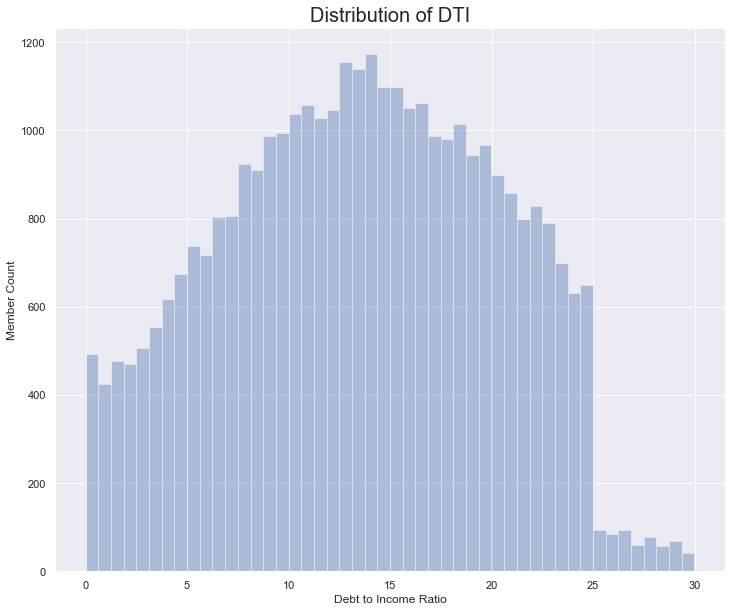

In [207]:
sns.distplot(raw_data['dti'], kde=False)
plt.xlabel("Debt to Income Ratio")
plt.ylabel("Member Count")
plt.title('Distribution of DTI', fontdict={'fontsize': 20})
plt.show()

**Observations**
- **DTI, contineous variable**
- Mean for the data is around 13.5 and median is around 13.62.

#### 3.16.1 Analysing Fully Paid + Charged Off Members

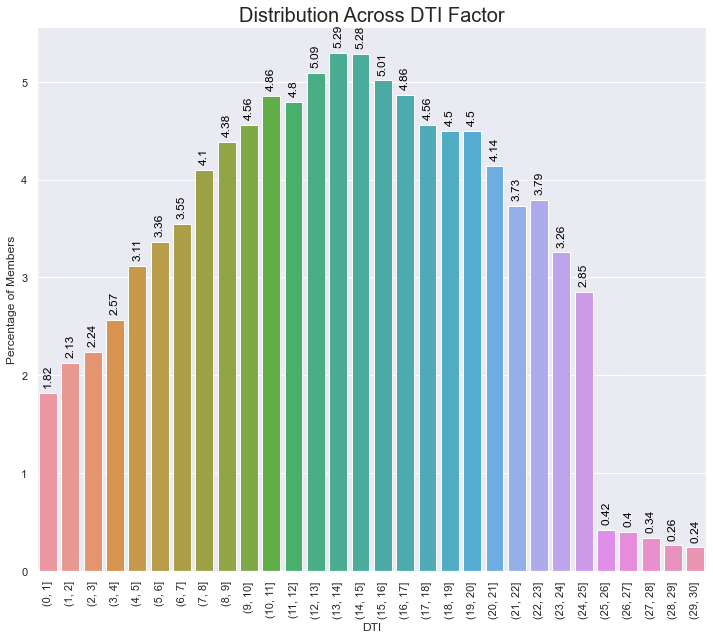

In [208]:
dti_category_dist = raw_data.dti_category.value_counts(normalize=True, sort=False)*100
population_distribution(data=dti_category_dist, graph_title='Distribution Across DTI Factor',
                        x_axis_label='DTI', data_label='vertical', x_label_rotation=90)

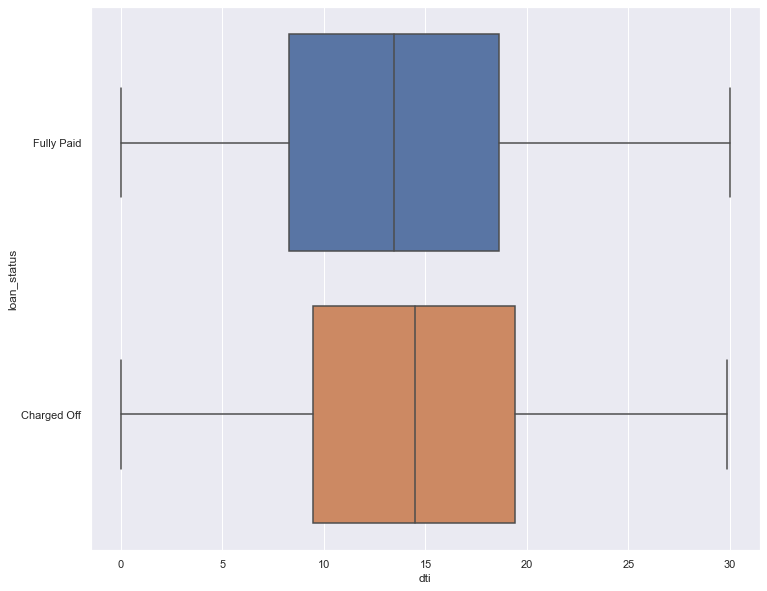

In [209]:
sns.boxplot(x=raw_data['dti'], y=raw_data['loan_status'], data=raw_data)
plt.show()

**Observation**
- Median and mean for values for Debt to Income Ratio in Charged Off category are on higher side.

#### 3.16.2 Analysing Charged Off Members Only

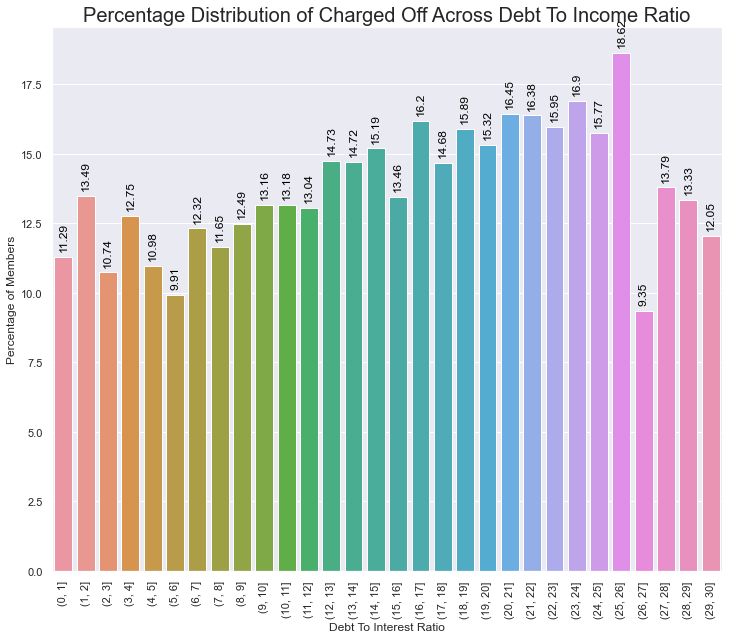

In [210]:
dti_df = raw_data.pivot_table(index='dti_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
dti_df = distribution_against_charged_off_members(data=dti_df,
                                         graph_title='Percentage Distribution of Charged Off Across Debt To Income Ratio',
                                         x_axis_label='Debt To Interest Ratio', data_label='vertical', x_label_rotation=90)

**Observation**
- As the seen from graph the charged of percent in category increases as dti increases.
- After Debt to Income Ration of 20 Applicats should be categorise as risky.

#### 3.16.3 To verify this, we'll calculate the Correlation Co-efficient & Pearson Value to proove this behaviour mathematically.


Generating Pearson Value For Debt To Income Ratio on X-Axis and Charged Off Percentage Member Count on Y-Axis


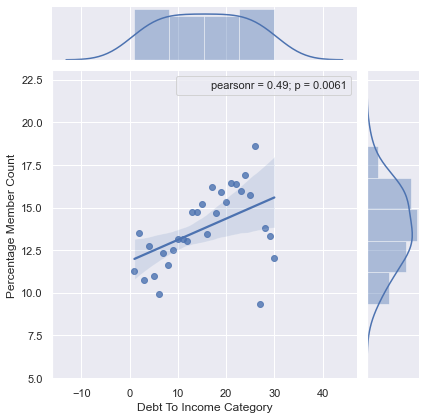



Dataframe Representing Corrrelation Co-efficient between Debt To Income Ratio and Percentage Member Count


,Debt To Income Ratio,Charged Off
Debt To Income Ratio,1.000000,0.489348
Charged Off,0.489348,1.000000


In [211]:
mathematical_function(data=dti_df, column_name='Debt To Income Ratio',
                      x_label='Debt To Income Category')

**Inference**
- As the Debt to Income Ration Increases, percentage of Charged off values also increases, which is prooved mathematically as well.

### 3.17 Analysis of "Delinquency Count (in Last 2 Years)" column

In [212]:
raw_data.groupby(by='delinq_2yrs').delinq_2yrs.count()

delinq_2yrs
0     30932
1      2867
2       589
3       184
4        51
5        21
6        10
7         4
8         2
9         1
11        1
Name: delinq_2yrs, dtype: int64

#### 3.17.1 Analysing Fully Paid + Charged Off Members

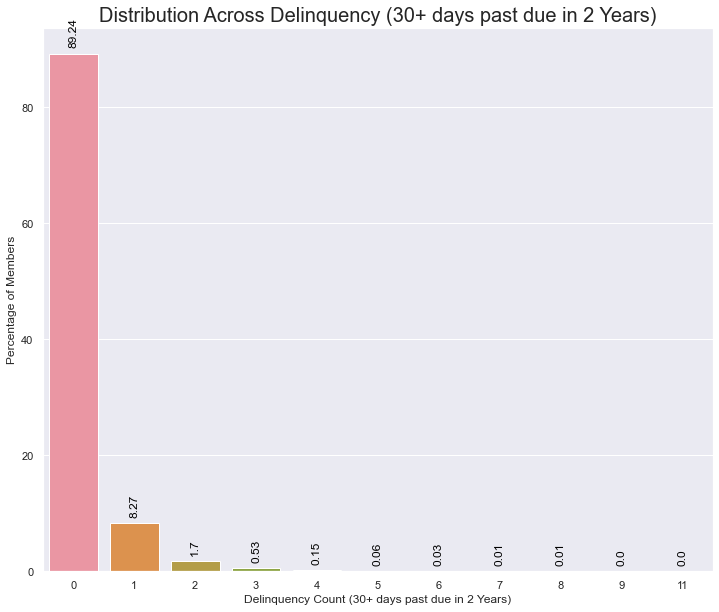

In [213]:
delinq_2yrs_dist = raw_data.delinq_2yrs.value_counts(normalize=True, sort=False)*100
population_distribution(data=delinq_2yrs_dist, graph_title='Distribution Across Delinquency (30+ days past due in 2 Years)',
                        x_axis_label='Delinquency Count (30+ days past due in 2 Years)', data_label='vertical')

**Observations**
- **Delinquency Count (in Last 2 Years), categorical ordinal variable, categorised from 0-11**
- Maximum applicants have no Delinquency Count (in Last 2 Years).
- Visual data display that Delinquency count of 9 & 11 are Zero, hence we will ignore this while caluculating Trendline.

#### 3.17.2 Analysing Charged Off Members Only

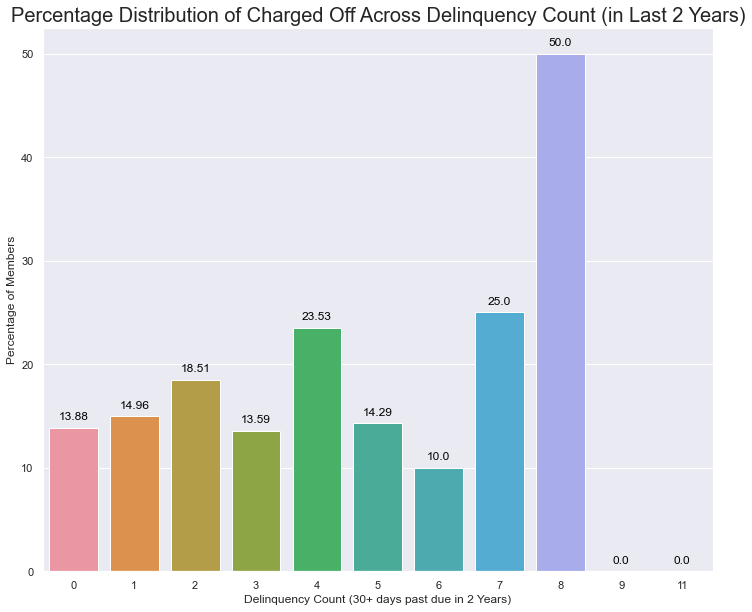

In [214]:
del_c_30_df = raw_data.pivot_table(index='delinq_2yrs', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
del_c_30_df = distribution_against_charged_off_members(data=del_c_30_df,
                                         graph_title='Percentage Distribution of Charged Off Across Delinquency Count (in Last 2 Years)',
                                         x_axis_label='Delinquency Count (30+ days past due in 2 Years)')

**Observation**
- Delinquincy Count for bin of 9 & 10 are zero because the population itself is zero.
- Population Contributon for Delinquincy count of 7 and 8 bin are very low for taking into consideration, and hence are showing comparatively higher percentage of Charged off cases.
- We will however ignore these values (Delinquency Value of 8, 9 & 10) for calculating trendline.

#### 3.17.3 To verify this, we'll calculate the Correlation Co-efficient & Pearson Value to proove this behaviour mathematically.

In [215]:
del_c_30_df_x_index_list = [*range(1, del_c_30_df.shape[0]+1, 1)] 
del_c_30_df['del_c_30_dfcorrelation_x_index'] =del_c_30_df_x_index_list
del_c_30_df = del_c_30_df[del_c_30_df['del_c_30_dfcorrelation_x_index'] < 8]
del_c_30_df

loan_status,Charged Off,Fully Paid,del_c_30_dfcorrelation_x_index
delinq_2yrs,,,
0,13.878831,86.121169,1
1,14.963376,85.036624,2
2,18.505942,81.494058,3
3,13.586957,86.413043,4
4,23.529412,76.470588,5
5,14.285714,85.714286,6
6,10.000000,90.000000,7


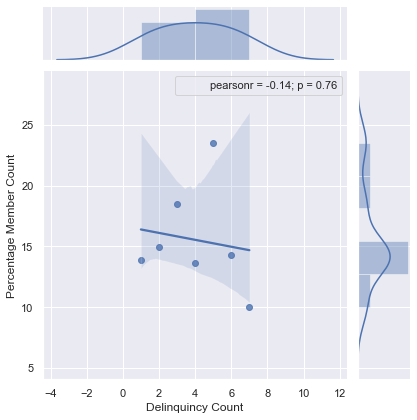

In [216]:
del_c_30_df_plot = sns.jointplot('del_c_30_dfcorrelation_x_index', 'Charged Off',del_c_30_df,kind="reg")
del_c_30_df_plot.annotate(stats.pearsonr)
plt.xlabel("Delinquincy Count")
plt.ylabel("Percentage Member Count")
plt.show()

In [217]:
headers = ['Delinquincy Count', 'Charged Off']
pd.DataFrame(np.corrcoef(del_c_30_df['del_c_30_dfcorrelation_x_index'], del_c_30_df["Charged Off"]), index=headers, columns=headers)

,Delinquincy Count,Charged Off
Delinquincy Count,1.00000,-0.14242
Charged Off,-0.14242,1.00000


**Inference**
- As the Delinquincy Count Increases, percentage of Charged off values decreases (although the co-efficient is very low) which is prooved mathematically as well.

### 3.18 Analysis of "Earliest Credit Line Year" column

In [218]:
raw_data.groupby(by='earliest_cr_line_year').earliest_cr_line_year.count()

earliest_cr_line_year
1946       1
1950       1
1954       1
1956       1
1962       3
1963       4
1964       1
1965       4
1966       7
1967      11
1968      12
1969      21
1970      35
1971      30
1972      25
1973      39
1974      48
1975      56
1976      65
1977      84
1978     121
1979     124
1980     141
1981     141
1982     177
1983     267
1984     327
1985     371
1986     420
1987     510
1988     615
1989     724
1990     878
1991     806
1992     915
1993    1303
1994    1723
1995    1855
1996    1955
1997    2167
1998    2532
1999    2666
2000    2912
2001    2292
2002    1748
2003    1692
2004    1599
2005    1378
2006    1063
2007     654
2008     137
Name: earliest_cr_line_year, dtype: int64

#### 3.18.1 Analysing Fully Paid + Charged Off Members

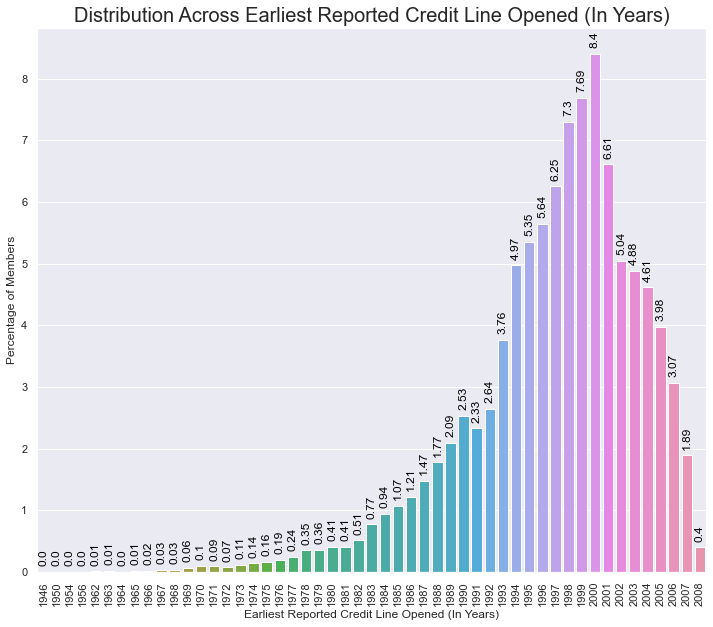

In [219]:
earliest_cr_line_year_dist = raw_data.groupby(by='earliest_cr_line_year').earliest_cr_line_year.count() / len(raw_data) * 100
population_distribution(data=earliest_cr_line_year_dist, graph_title='Distribution Across Earliest Reported Credit Line Opened (In Years)',
                        x_axis_label='Earliest Reported Credit Line Opened (In Years)', data_label='vertical', x_label_rotation=90)

**Observation(s)**
- **Earliest Credit Line Year, categorical ordinal variable, categorised in year from 1946 to 2008.**
- Maximum count for earliest credit is in year 2000.
- Uptill the year 1968, most bins have very less population count. Hence, we can ignore these column (Year) while analysing Trendline.

#### 3.18.2 Analysing Charged Off Members Only

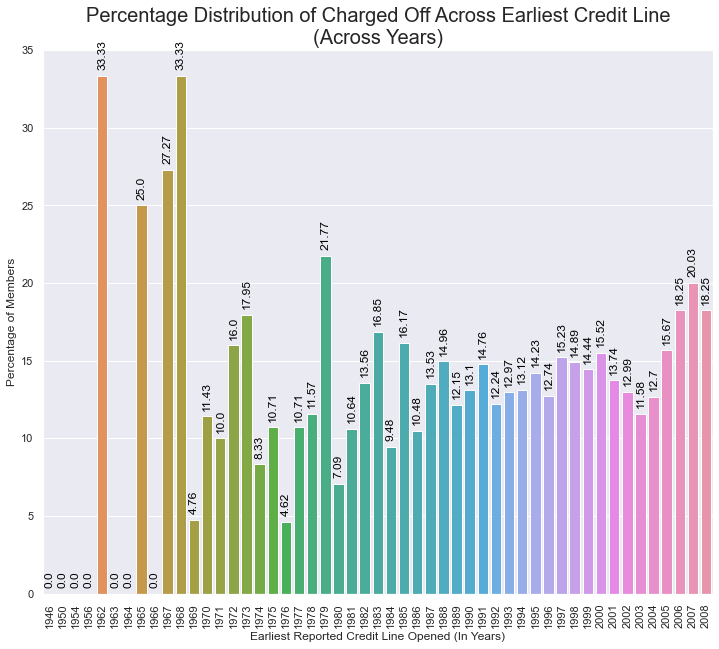

In [220]:
earliest_cr_year_df = raw_data.pivot_table(index='earliest_cr_line_year', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
earliest_cr_year_df = distribution_against_charged_off_members(data=earliest_cr_year_df,
                                         graph_title='Percentage Distribution of Charged Off Across Earliest Credit Line\n(Across Years)',
                                         x_axis_label='Earliest Reported Credit Line Opened (In Years)', data_label='vertical', x_label_rotation=90)

**Observation**
- We see that, as the year increases, proportion of members getting default also increases.
- Population Contributon for Earliest Credit Line Uptill 1968 are very low for taking into consideration, and hence, are showing comparatively higher percentage of Charged off cases.
- We will however ignore these values for calculating trendline.

#### 3.18.3 To verify this, we'll calculate the Correlation Co-efficient & Pearson Value to proove this behaviour mathematically.

In [221]:
earliest_cr_year_df_x_index_list = [*range(1, earliest_cr_year_df.shape[0]+1, 1)] 
earliest_cr_year_df['earliest_cr_year_dfcorrelation_x_index'] =earliest_cr_year_df_x_index_list
earliest_cr_year_df = earliest_cr_year_df[earliest_cr_year_df.index > 1968]
earliest_cr_year_df

loan_status,Charged Off,Fully Paid,earliest_cr_year_dfcorrelation_x_index
earliest_cr_line_year,,,
1969,4.761905,95.238095,12
1970,11.428571,88.571429,13
1971,10.000000,90.000000,14
1972,16.000000,84.000000,15
1973,17.948718,82.051282,16
1974,8.333333,91.666667,17
1975,10.714286,89.285714,18
1976,4.615385,95.384615,19
1977,10.714286,89.285714,20


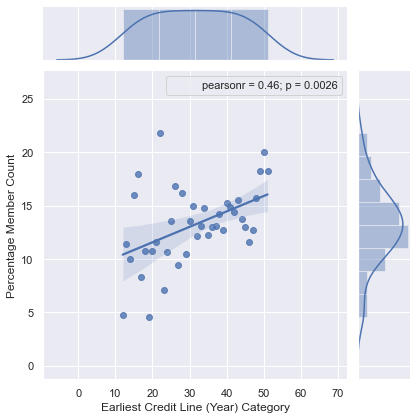

In [222]:
earliest_cr_year_df_plot = sns.jointplot('earliest_cr_year_dfcorrelation_x_index', 'Charged Off',earliest_cr_year_df,kind="reg")
earliest_cr_year_df_plot.annotate(stats.pearsonr)
plt.xlabel("Earliest Credit Line (Year) Category")
plt.ylabel("Percentage Member Count")
plt.show()

In [223]:
headers = ['Earliest Credit Line', 'Charged Off']
pd.DataFrame(np.corrcoef(earliest_cr_year_df['earliest_cr_year_dfcorrelation_x_index'], earliest_cr_year_df["Charged Off"]), index=headers, columns=headers)

,Earliest Credit Line,Charged Off
Earliest Credit Line,1.00000,0.46391
Charged Off,0.46391,1.00000


**Inference**
- As the Earliest Credit Line Year Pass by, Percentage of Charged off values increases, which is prooved mathematically as well.

### 3.19 Analysis of "Earliest Credit Line Month" column

In [224]:
raw_data.groupby(by='earliest_cr_line_month').earliest_cr_line_month.count()

earliest_cr_line_month
1     3030
2     2471
3     2395
4     2391
5     2526
6     2548
7     2677
8     2900
9     3133
10    3599
11    3452
12    3540
Name: earliest_cr_line_month, dtype: int64

#### 3.19.1 Analysing Fully Paid + Charged Off Members

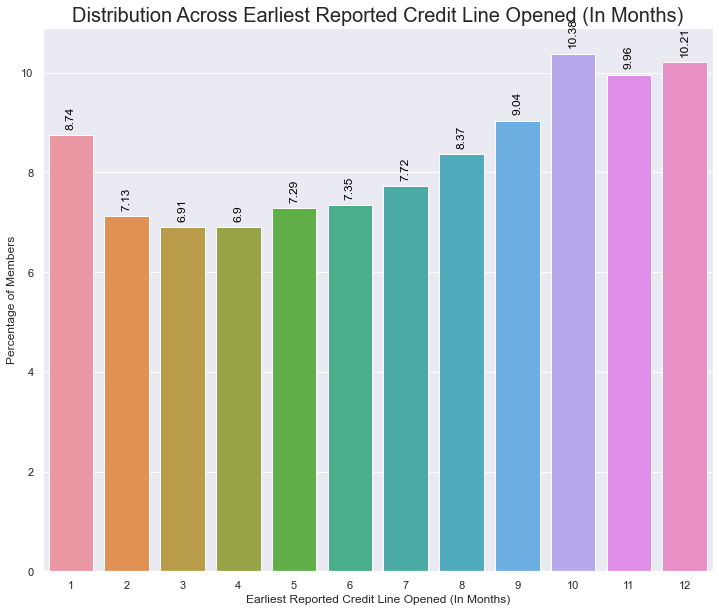

In [225]:
earliest_cr_line_month_dist = raw_data.groupby(by='earliest_cr_line_month').earliest_cr_line_month.count() / len(raw_data) * 100
population_distribution(data=earliest_cr_line_month_dist, graph_title='Distribution Across Earliest Reported Credit Line Opened (In Months)',
                        x_axis_label='Earliest Reported Credit Line Opened (In Months)', data_label='vertical')

**Observations**
- **Earliest Credit Line Month, categorical ordinal variable, categorised in year from 1-12(January --> December)**
- Maximum count for earliest credit is in Last Quarter of Year.

#### 3.19.2 Analysing Charged Off Members Only

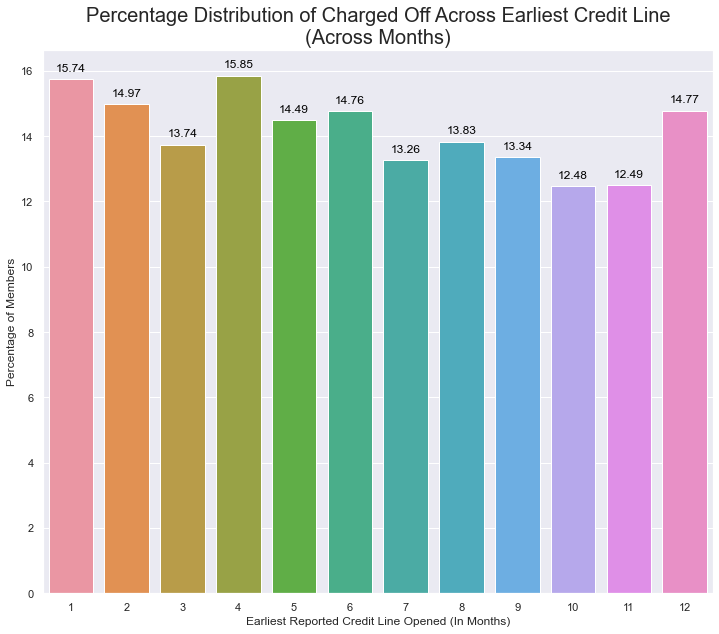

In [226]:
earliest_cr_month_df = raw_data.pivot_table(index='earliest_cr_line_month', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
earliest_cr_month_df = distribution_against_charged_off_members(data=earliest_cr_month_df, 
                                         graph_title='Percentage Distribution of Charged Off Across Earliest Credit Line\n(Across Months)',
                                         x_axis_label='Earliest Reported Credit Line Opened (In Months)')

**Observation**
- We see that, as the month changes from Jan to Dec, proportion of members getting default decreases.

#### 3.19.3 To verify this, we'll calculate the Correlation Co-efficient & Pearson Value to proove this behaviour mathematically.


Generating Pearson Value For Earliest Credit Line (Month) on X-Axis and Charged Off Percentage Member Count on Y-Axis


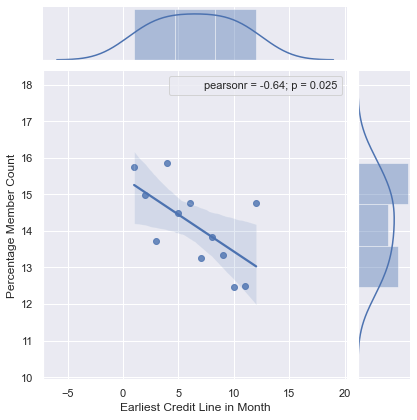



Dataframe Representing Corrrelation Co-efficient between Earliest Credit Line (Month) and Percentage Member Count


,Earliest Credit Line (Month),Charged Off
Earliest Credit Line (Month),1.000000,-0.640861
Charged Off,-0.640861,1.000000


In [227]:
mathematical_function(data=earliest_cr_month_df, column_name='Earliest Credit Line (Month)',
                      x_label='Earliest Credit Line in Month')

**Inference**
- As the Month Passes By (From January to December), percentage of Charged off values decreases, which is prooved mathematically as well.

### 3.20 Analysis of "Inquiries Count (In Last 6 Months)" column

In [228]:
raw_data.groupby(by='inq_last_6mths').inq_last_6mths.count()

inq_last_6mths
0    16880
1     9580
2     5093
3     2630
4      269
5      118
6       53
7       30
8        9
Name: inq_last_6mths, dtype: int64

#### 3.20.1 Analysing Fully Paid + Charged Off Members

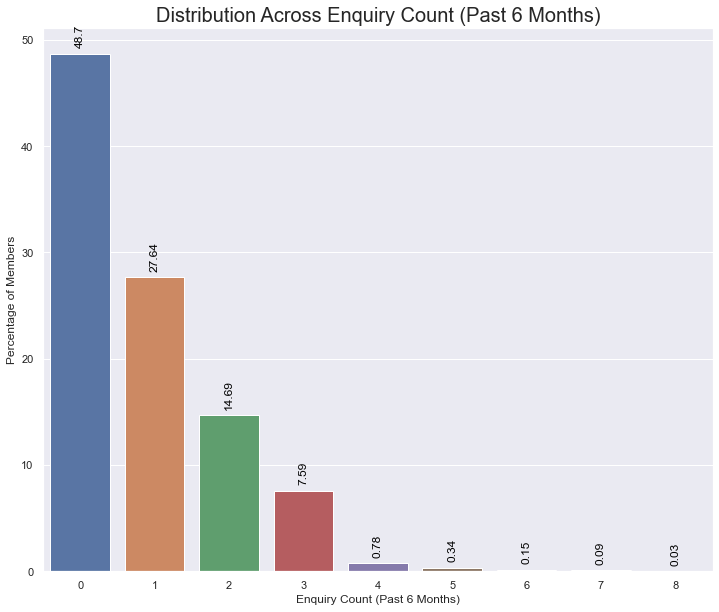

In [229]:
inq_last_6mths_dist = raw_data.inq_last_6mths.value_counts(normalize=True, sort=False)*100
population_distribution(data=inq_last_6mths_dist, graph_title='Distribution Across Enquiry Count (Past 6 Months)',
                        x_axis_label='Enquiry Count (Past 6 Months)', data_label='vertical', x_label_rotation=0)

**Observation(s)**
- **Inquiries Count (In Last 6 Months), categorical ordinal variable, categorised in counts**
- Maximum applicants, around 48%, do not have any inquiry count in last 6 Months.

#### 3.20.2 Analysing Charged Off Members Only

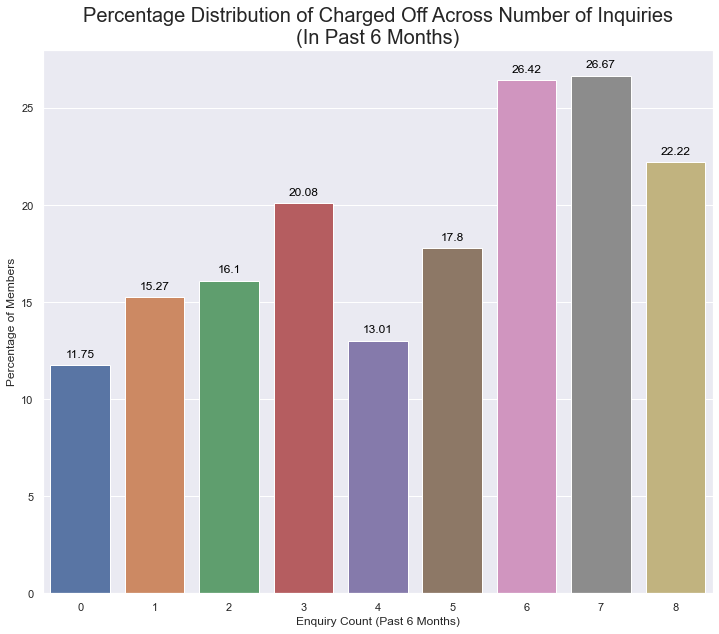

In [230]:
enq_count_df = raw_data.pivot_table(index='inq_last_6mths', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
enq_count_df = distribution_against_charged_off_members(data=enq_count_df, 
                                         graph_title='Percentage Distribution of Charged Off Across Number of Inquiries\n(In Past 6 Months)',
                                         x_axis_label='Enquiry Count (Past 6 Months)')

**Observation**
- We see that, as the enquiry count increases, proportion of members getting default also increases.

#### 3.20.3 To verify this, we'll calculate the Correlation Co-efficient & Pearson Value to proove this behaviour mathematically.


Generating Pearson Value For Enquiry Count on X-Axis and Charged Off Percentage Member Count on Y-Axis


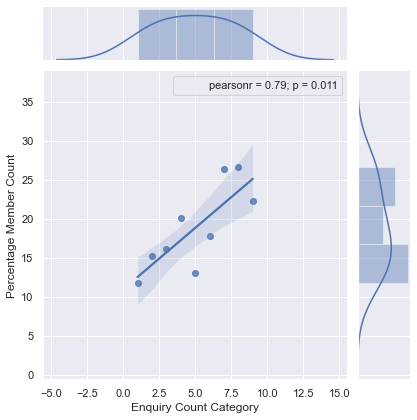



Dataframe Representing Corrrelation Co-efficient between Enquiry Count and Percentage Member Count


,Enquiry Count,Charged Off
Enquiry Count,1.000000,0.791573
Charged Off,0.791573,1.000000


In [231]:
mathematical_function(data=enq_count_df, column_name='Enquiry Count',
                      x_label='Enquiry Count Category')

**Inference**
- As the Number of Inquiries Increases, percentage of Charged off values also increases, which is prooved mathematically as well.

### 3.21 Analysis of "Number of Credit Lines Available" column

In [232]:
raw_data.groupby(by='open_acc').open_acc.count()

open_acc
2      474
3     1280
4     2029
5     2787
6     3474
7     3540
8     3449
9     3289
10    2792
11    2408
12    2000
13    1657
14    1294
15    1036
16     812
17     637
18     470
19     346
20     253
21     215
22     125
23      79
24      60
25      50
26      23
27      19
28      21
29      10
30      12
31       5
32       2
33       3
34       5
35       1
36       2
38       1
39       1
44       1
Name: open_acc, dtype: int64

#### 3.21.1 Analysing Fully Paid + Charged Off Members

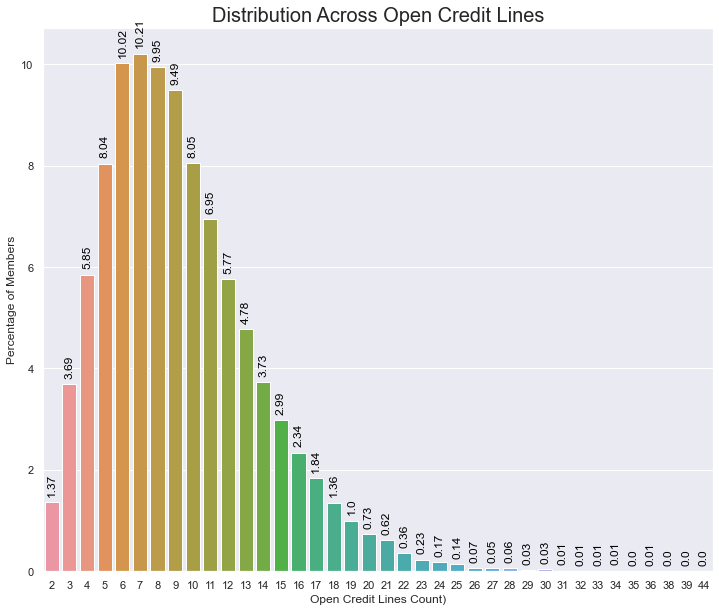

In [233]:
open_acc_dist = raw_data.groupby(by='open_acc').open_acc.count() / len(raw_data) * 100
population_distribution(data=open_acc_dist, graph_title='Distribution Across Open Credit Lines',
                        x_axis_label='Open Credit Lines Count)', data_label='vertical')

**Observations**
- **Number of Credit Lines Available, categorical ordinal variable, categorised from Count of 2 to 44.**
- Maximum applicants, around 10.21%, have 7 credit lines available.
- Population Count of Open Credit Lines count accounts for more than 30, which is very low and hence we will ignore this while caluculating Trendline.

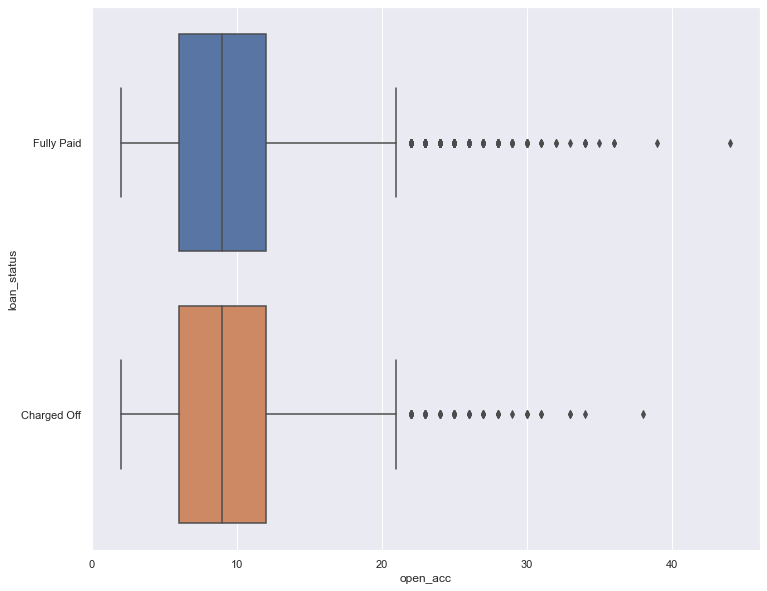

In [234]:
sns.boxplot(x=raw_data['open_acc'], y=raw_data['loan_status'], data=raw_data)
plt.show()

In [235]:
raw_data.groupby('loan_status')['open_acc'].describe()

,count,mean,std,min,25%,50%,75%,max
loan_status,,,,,,,,
Charged Off,4874.0,9.281288,4.479778,2.0,6.0,9.0,12.0,38.0
Fully Paid,29788.0,9.291527,4.336627,2.0,6.0,9.0,12.0,44.0


**Observation**
- There almost no difference in mean and median values for charged off and fully paid cate, so this variable will not help in making decision.

#### 3.21.2 Analysing Charged Off Members Only

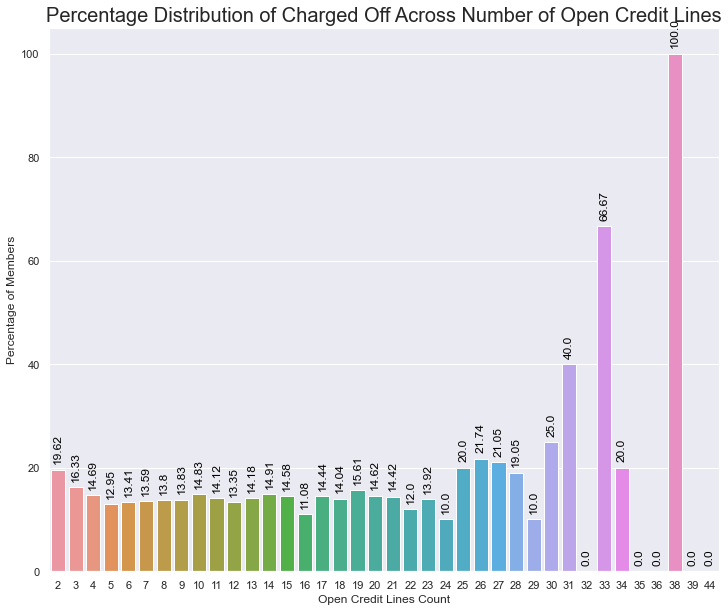

In [236]:
open_acc_df = raw_data.pivot_table(index='open_acc', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
open_acc_df = distribution_against_charged_off_members(data=open_acc_df,
                                         graph_title='Percentage Distribution of Charged Off Across Number of Open Credit Lines',
                                         x_axis_label='Open Credit Lines Count', data_label='vertical')

**Observation(s)**
- There is no clear trend available (visually).
- Population Contributon of Open Credit Lines Count for 30 or more than that are very low for taking into consideration, and hence are showing comparatively higher percentage of Charged off cases.
- We will however ignore these values (Open Credit Lines Count > 30) for calculating trendline.

#### 3.21.3 To verify this, we'll calculate the Correlation Co-efficient & Pearson Value to proove this behaviour mathematically.

In [237]:
open_acc_df_x_index_list = [*range(1, open_acc_df.shape[0]+1, 1)] 
open_acc_df['open_acc_dfcorrelation_x_index'] =open_acc_df_x_index_list
open_acc_df = open_acc_df[open_acc_df.index <= 30]
open_acc_df

loan_status,Charged Off,Fully Paid,open_acc_dfcorrelation_x_index
open_acc,,,
2,19.620253,80.379747,1
3,16.328125,83.671875,2
4,14.687038,85.312962,3
5,12.952996,87.047004,4
6,13.413932,86.586068,5
7,13.587571,86.412429,6
8,13.801102,86.198898,7
9,13.833992,86.166008,8
10,14.828080,85.171920,9


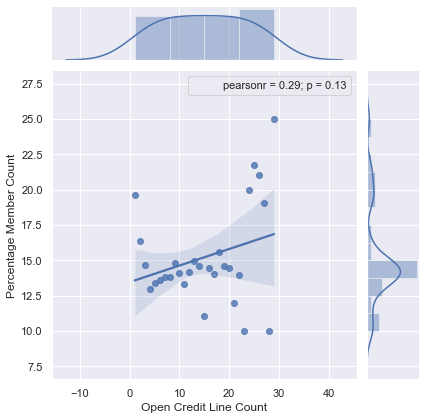

In [238]:
open_acc_df_plot = sns.jointplot('open_acc_dfcorrelation_x_index', 'Charged Off', open_acc_df, kind="reg")
open_acc_df_plot.annotate(stats.pearsonr)
plt.xlabel("Open Credit Line Count")
plt.ylabel("Percentage Member Count")
plt.show()

In [239]:
headers = ['Open Credit Line Count', 'Charged Off']
pd.DataFrame(np.corrcoef(open_acc_df['open_acc_dfcorrelation_x_index'], open_acc_df["Charged Off"]), index=headers, columns=headers)

,Open Credit Line Count,Charged Off
Open Credit Line Count,1.000000,0.286608
Charged Off,0.286608,1.000000


**Inference**
- As the Open Credit Line Count Increases, percentage of Charged off values also increases, which is prooved mathematically as well.

### 3.22 Analysis of "Derogatory Public Records" column

In [240]:
raw_data.groupby(by='pub_rec').pub_rec.count()

pub_rec
0    32830
1     1781
2       43
3        6
4        2
Name: pub_rec, dtype: int64

#### 3.22.1 Analysing Fully Paid + Charged Off Members

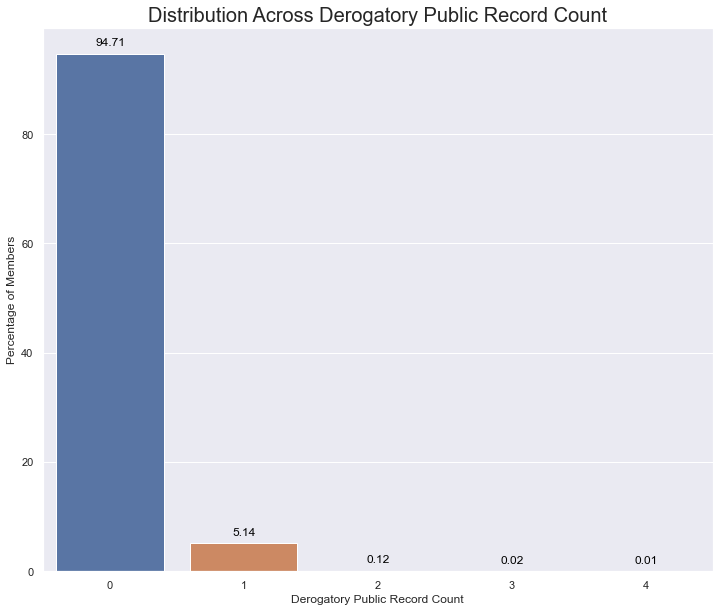

In [241]:
pub_rec_dist = raw_data.pub_rec.value_counts(normalize=True, sort=False)*100
population_distribution(data=pub_rec_dist, graph_title='Distribution Across Derogatory Public Record Count',
                        x_axis_label='Derogatory Public Record Count')

**Observation(s)**
- **Derogatory Public Records, categorical ordinal variable, categorised in 0, 1, 2, 3, 4**
- Maximum applicants, around 94.71%, have no Derogatory Public Records.
- Population Count of Derogatory Public Records count for 3 & 4 is very low and hence we will ignore this while calculating Trendline.

#### 3.22.2 Analysing Charged Off Members Only

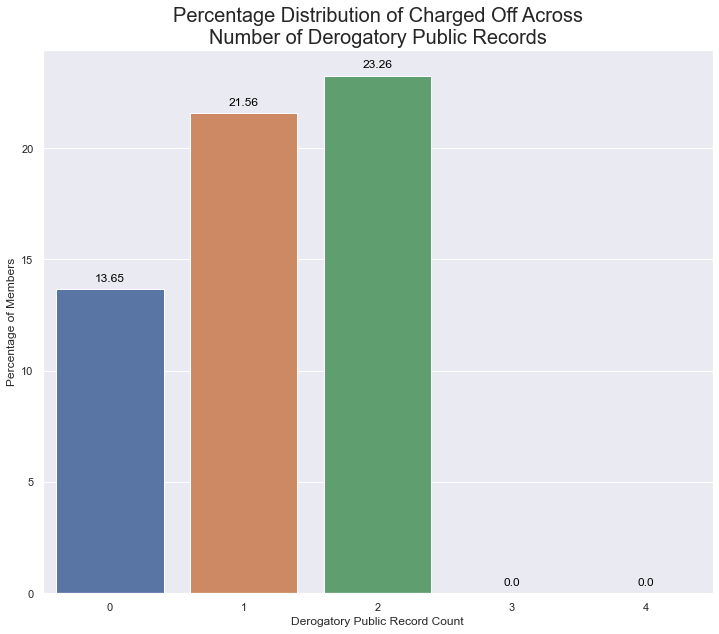

In [242]:
pub_rec_df = raw_data.pivot_table(index='pub_rec', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
pub_rec_df = distribution_against_charged_off_members(data=pub_rec_df, 
                                         graph_title='Percentage Distribution of Charged Off Across\nNumber of Derogatory Public Records',
                                         x_axis_label='Derogatory Public Record Count')

**Observation**
- We see that, as the Derogatory Public Records increases, proportion of members getting default decreases (Except for Public Record count of 3 & 4 as the population count is very low)
- Population Contributon for Delinquincy count of 3 & 4 bin are very low for taking into consideration, and hence are showing  Zero Percentage
- We will however ignore these values (Derogatory Public Records Value of 3 & 4) for calculating trendline.

#### 3.22.3 To verify this, we'll calculate the Correlation Co-efficient & Pearson Value to proove this behaviour mathematically.

In [243]:
pub_rec_df_x_index_list = [*range(1, pub_rec_df.shape[0]+1, 1)] 
pub_rec_df['pub_rec_dfcorrelation_x_index'] =pub_rec_df_x_index_list
pub_rec_df = pub_rec_df[pub_rec_df.index < 3]
pub_rec_df

loan_status,Charged Off,Fully Paid,pub_rec_dfcorrelation_x_index
pub_rec,,,
0,13.646055,86.353945,1
1,21.560921,78.439079,2
2,23.255814,76.744186,3


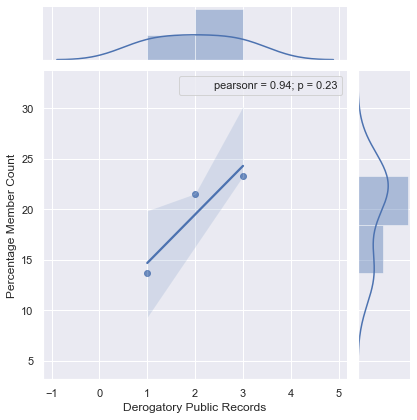

In [244]:
pub_rec_df_plot = sns.jointplot('pub_rec_dfcorrelation_x_index', 'Charged Off',pub_rec_df,kind="reg")
pub_rec_df_plot.annotate(stats.pearsonr)
plt.xlabel("Derogatory Public Records")
plt.ylabel("Percentage Member Count")
plt.show()

In [245]:
headers = ['Derogatory Public Records', 'Charged Off']
pd.DataFrame(np.corrcoef(pub_rec_df['pub_rec_dfcorrelation_x_index'], pub_rec_df["Charged Off"]), index=headers, columns=headers)

,Derogatory Public Records,Charged Off
Derogatory Public Records,1.000000,0.936731
Charged Off,0.936731,1.000000


**Inference**
- As the Derogatory Public Records	Increases, percentage of Charged off values also increases, which is prooved mathematically as well.

### 3.23 Analysis of "Revolving Balance" column

In [246]:
raw_data.revol_bal.describe()

count     34662.000000
mean      12970.216779
std       14860.362786
min           0.000000
25%        3739.500000
50%        8818.000000
75%       16734.000000
max      149527.000000
Name: revol_bal, dtype: float64

#### 3.23.1 Analysing Fully Paid + Charged Off Members

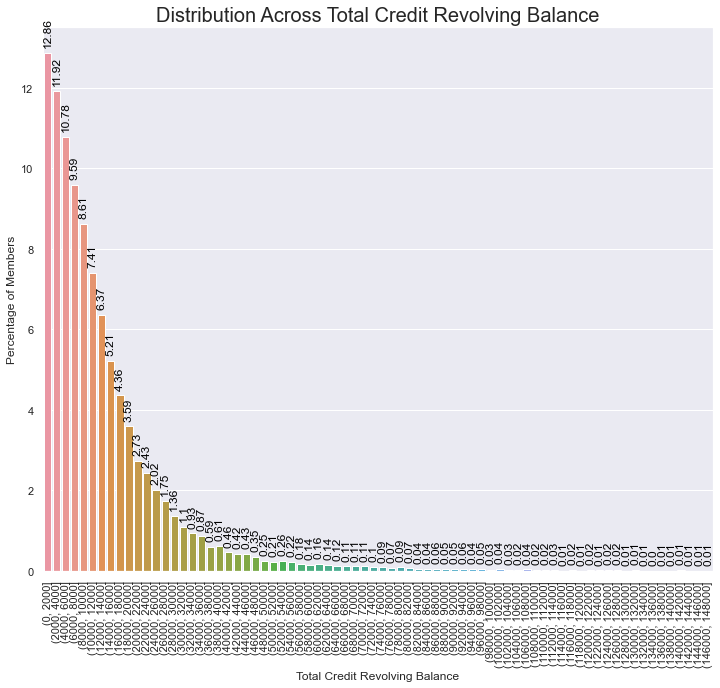

In [247]:
revol_bal_category_dist = raw_data.revol_bal_category.value_counts(normalize=True, sort=False)*100
population_distribution(data=revol_bal_category_dist, graph_title='Distribution Across Total Credit Revolving Balance',
                        x_axis_label='Total Credit Revolving Balance', data_label='vertical', x_label_rotation=90)

**Observations**
- **Revolving Balance, categorical ordinal variable, categorised in bins of 2000.**
- Population Count of Revolving Balance Bins are extremely low for values above 98K and hence we will ignore this while calculating Trendline.

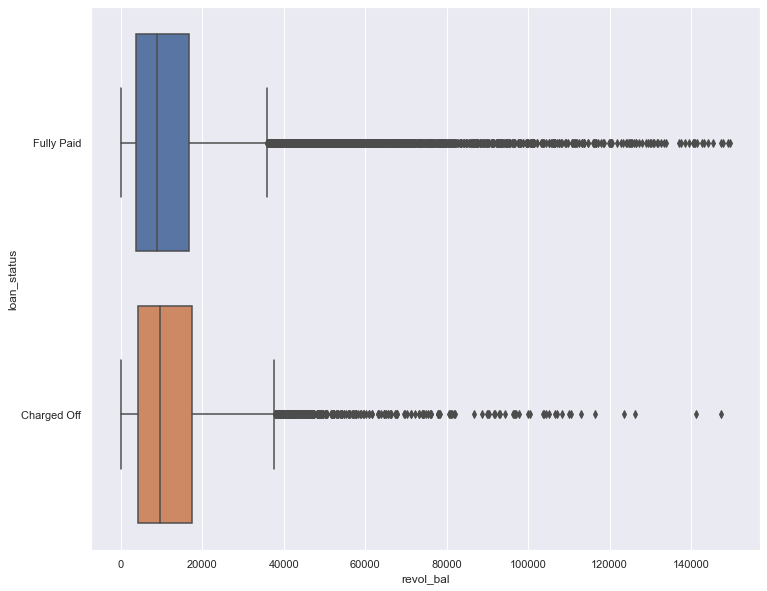

In [248]:
sns.boxplot(x=raw_data['revol_bal'], y=raw_data['loan_status'], data=raw_data)
plt.show()

**Observation**
- There is no large difference in Charged off and Fully paid distribution, this column will not have any significant impact on descision.

#### 3.23.2 Analysing Charged Off Members Only

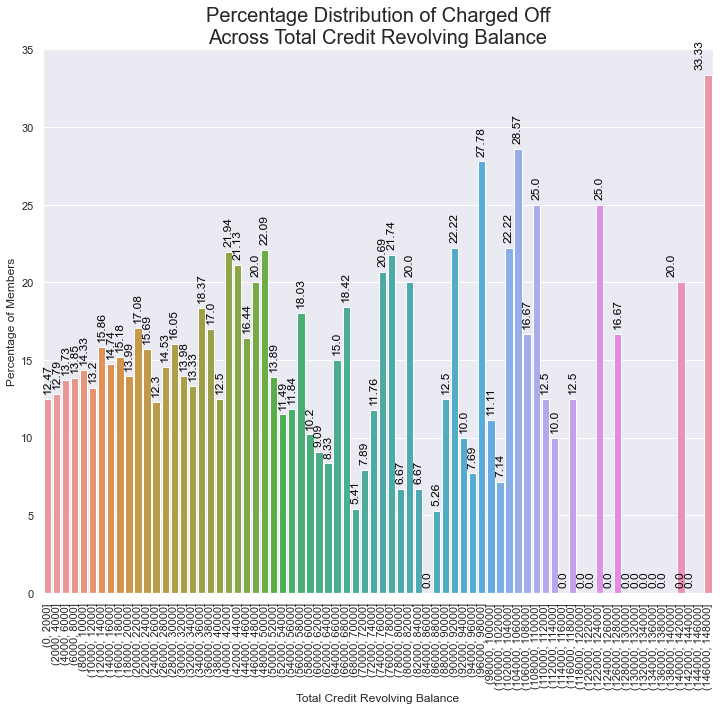

In [249]:
revol_bal_df = raw_data.pivot_table(index='revol_bal_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
revol_bal_df = distribution_against_charged_off_members(data=revol_bal_df,
                                         graph_title='Percentage Distribution of Charged Off\nAcross Total Credit Revolving Balance',
                                         x_axis_label='Total Credit Revolving Balance', data_label='vertical', x_label_rotation=90)

**Observation**
- We see that, as the Revolving Balance increases, proportion of members getting default also increases.
- Delinquincy Count for bin of 9 & 10 are zero because the population itself is zero.
- Population Contributon for Revolving Balance more than 98K are very low for taking into consideration, and hence are showing comparatively higher percentage of Charged off cases.
- We will however ignore these values (Revolving Balance more than 98K) for calculating trendline.

#### 3.23.3 To verify this, we'll calculate the Correlation Co-efficient & Pearson Value to proove this behaviour mathematically.

In [250]:
revol_bal_df = revol_bal_df[revol_bal_category_dist > 0.05]
revol_bal_df_x_index_list = [*range(1, revol_bal_df.shape[0]+1, 1)] 
revol_bal_df['revol_bal_dfcorrelation_x_index'] = revol_bal_df_x_index_list
revol_bal_df

loan_status,Charged Off,Fully Paid,revol_bal_dfcorrelation_x_index
revol_bal_category,,,
"(0, 2000]",12.465565,87.534435,1
"(2000, 4000]",12.788104,87.211896,2
"(4000, 6000]",13.729789,86.270211,3
"(6000, 8000]",13.850416,86.149584,4
"(8000, 10000]",14.329791,85.670209,5
"(10000, 12000]",13.197767,86.802233,6
"(12000, 14000]",15.862709,84.137291,7
"(14000, 16000]",14.739229,85.260771,8
"(16000, 18000]",15.176152,84.823848,9


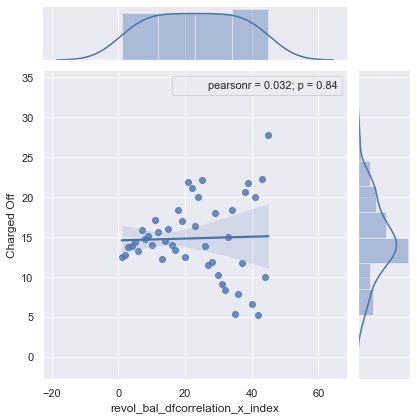

In [251]:
revol_bal_df_plot = sns.jointplot('revol_bal_dfcorrelation_x_index', 'Charged Off', revol_bal_df, kind="reg")
revol_bal_df_plot.annotate(stats.pearsonr)
plt.show()

In [252]:
headers = ['Revolving Balance (Category)', 'Charged Off']
pd.DataFrame(np.corrcoef(revol_bal_df['revol_bal_dfcorrelation_x_index'], revol_bal_df["Charged Off"]), index=headers, columns=headers)

,Revolving Balance (Category),Charged Off
Revolving Balance (Category),1.000000,0.031598
Charged Off,0.031598,1.000000


**Inference**
- From the mathematically prooved data, this variable has a very negligible effect on determining Charged Off Members.
- Although, this column can be neglected, this data is available only when loan is ongoing and will not be available to determine before the start of the loan to identify Member Attributes

### 3.24 Analysis of "Revolving Utilization Rate" column

In [253]:
raw_data.revol_util.describe()

count    34662.000000
mean        49.109093
std         28.186457
min          0.000000
25%         25.900000
50%         49.600000
75%         72.500000
max         99.900000
Name: revol_util, dtype: float64

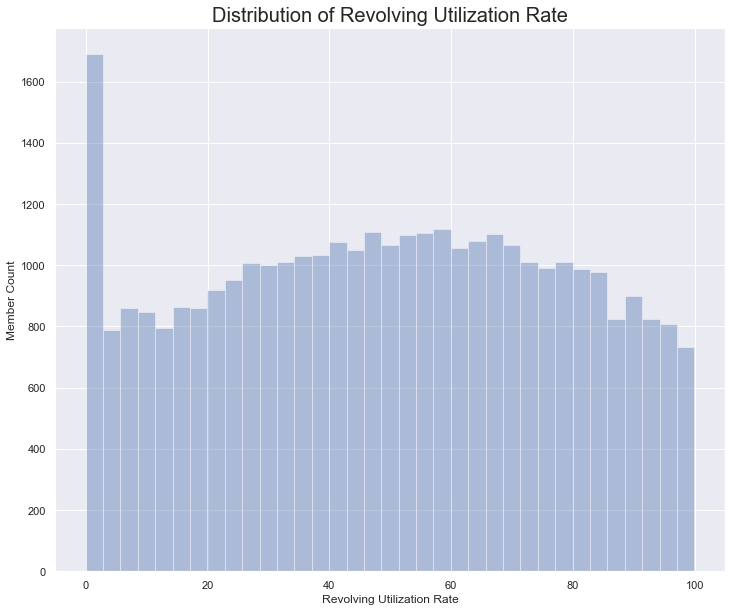

In [254]:
sns.distplot(raw_data['revol_util'], kde=False)
plt.xlabel("Revolving Utilization Rate")
plt.ylabel("Member Count")
plt.title('Distribution of Revolving Utilization Rate', fontdict={'fontsize': 20})
plt.show()

#### 3.24.1 Analysing Fully Paid + Charged Off Members

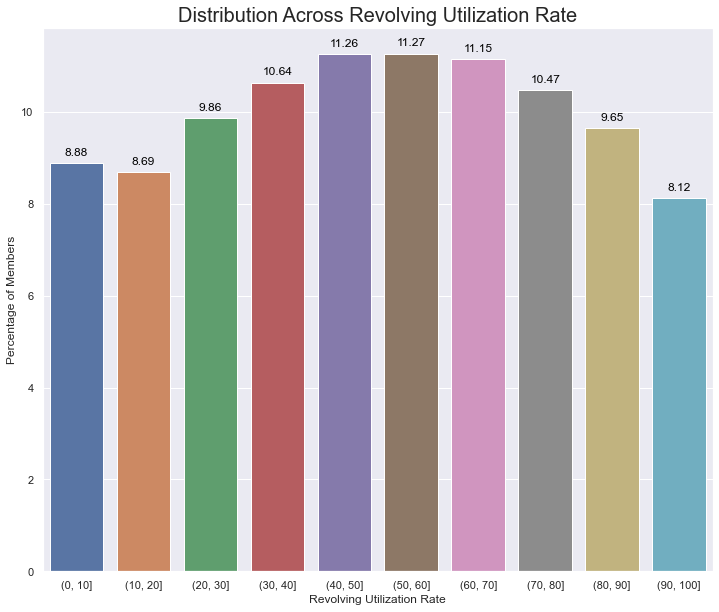

In [255]:
revol_util_category_dist = raw_data.revol_util_category.value_counts(normalize=True, sort=False)*100
population_distribution(data=revol_util_category_dist, graph_title='Distribution Across Revolving Utilization Rate',
                        x_axis_label='Revolving Utilization Rate')

**Observation(s)**
- **Revolving Utilization Rate, categorical ordinal variable, categorised in bins of 10.**
- Display similar behavior as that of Normal Distribution

#### 3.24.2 Analysing Charged Off Members Only

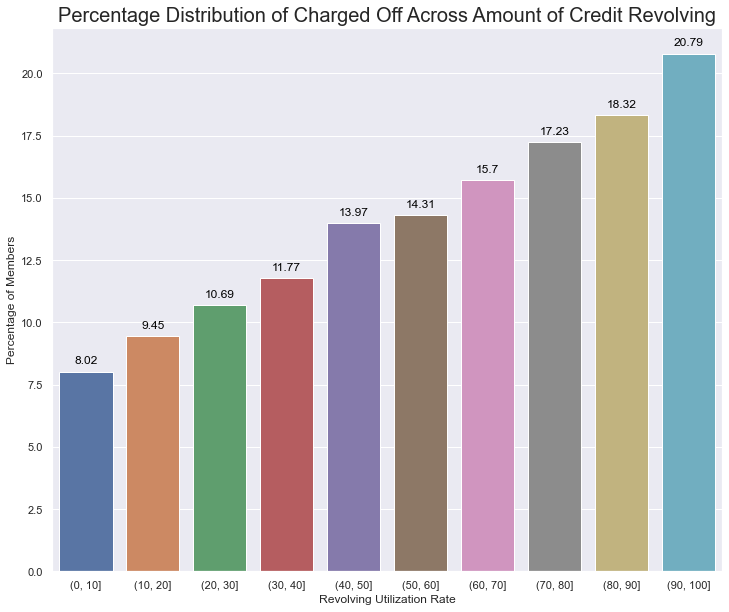

In [256]:
revol_util_df = raw_data.pivot_table(index='revol_util_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
revol_util_df = distribution_against_charged_off_members(data=revol_util_df, 
                                         graph_title='Percentage Distribution of Charged Off Across Amount of Credit Revolving',
                                         x_axis_label='Revolving Utilization Rate')

**Observation**
- We see that, as the Revolving Balance increases, proportion of members getting default also increases.

#### 3.24.3 To verify this we'll calculate the Correlation Co-efficient & Pearson Value to proove this behaviour mathematically.


Generating Pearson Value For Revolving Utilization Rate on X-Axis and Charged Off Percentage Member Count on Y-Axis


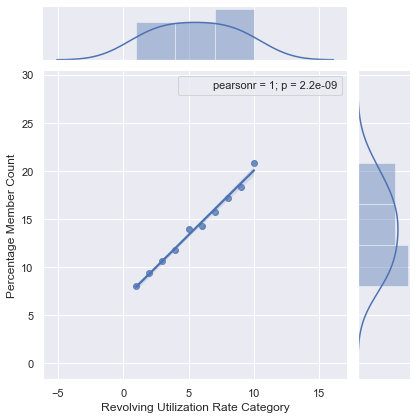



Dataframe Representing Corrrelation Co-efficient between Revolving Utilization Rate and Percentage Member Count


,Revolving Utilization Rate,Charged Off
Revolving Utilization Rate,1.000000,0.995233
Charged Off,0.995233,1.000000


In [257]:
mathematical_function(data=revol_util_df, column_name='Revolving Utilization Rate',
                      x_label='Revolving Utilization Rate Category')

**Inference**
- As the Revolving Utilization Rate Increases, percentage of Charged off values also increases, which is prooved mathematically as well.

### 3.25 Analysis of "Total Credit Lines" column

In [258]:
raw_data.total_acc.describe()

count    34662.000000
mean        22.039525
std         11.317798
min          2.000000
25%         14.000000
50%         20.000000
75%         29.000000
max         90.000000
Name: total_acc, dtype: float64

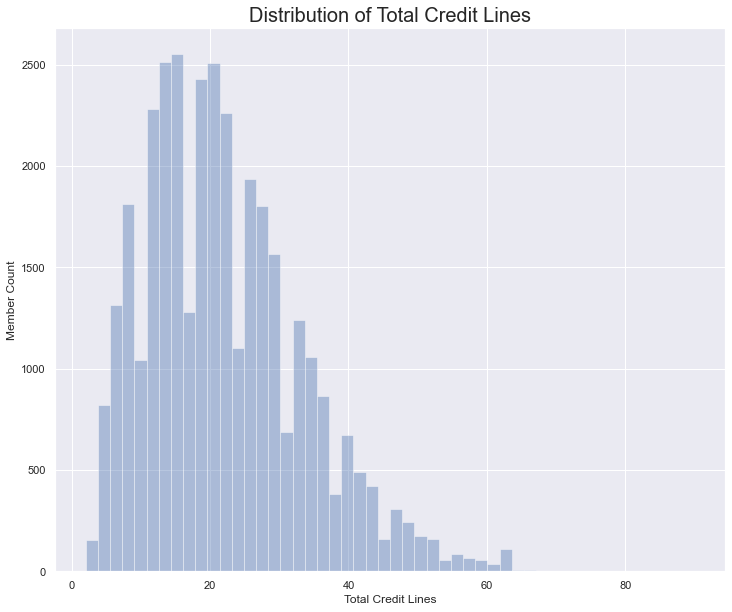

In [259]:
sns.distplot(raw_data['total_acc'], kde=False)
plt.xlabel("Total Credit Lines")
plt.ylabel("Member Count")
plt.title('Distribution of Total Credit Lines', fontdict={'fontsize': 20})
plt.show()

#### 3.25.1 Analysing Fully Paid + Charged Off Members

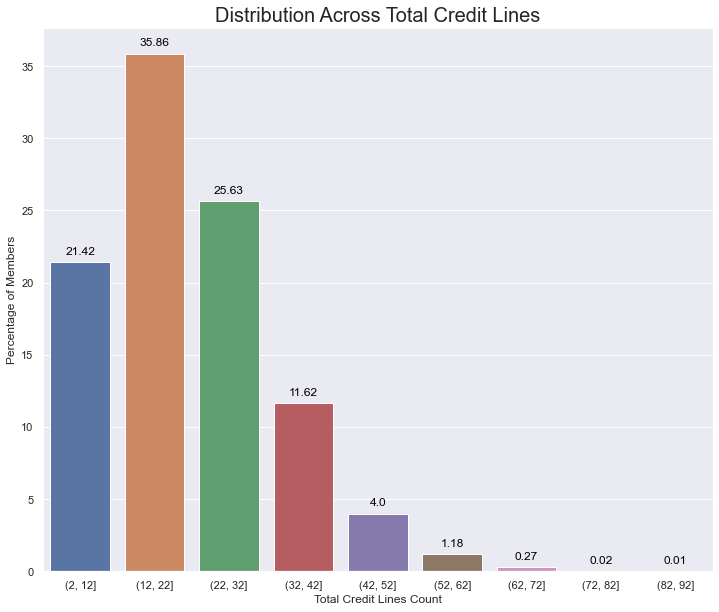

In [260]:
total_acc_category_dist = raw_data.total_acc_category.value_counts(normalize=True, sort=False)*100
population_distribution(data=total_acc_category_dist, graph_title='Distribution Across Total Credit Lines',
                        x_axis_label='Total Credit Lines Count')

**Observation(s)**
- **Total Credit Lines, categorical ordinal variable, categorised in bins of 10.**
- Maximum applicants are in the range of 2 to 42
- Total Credit Line for bin of 72 to 92 are negligible hence can be ignore while plotting trendline

#### 3.25.2 Analysing Charged Off Members Only

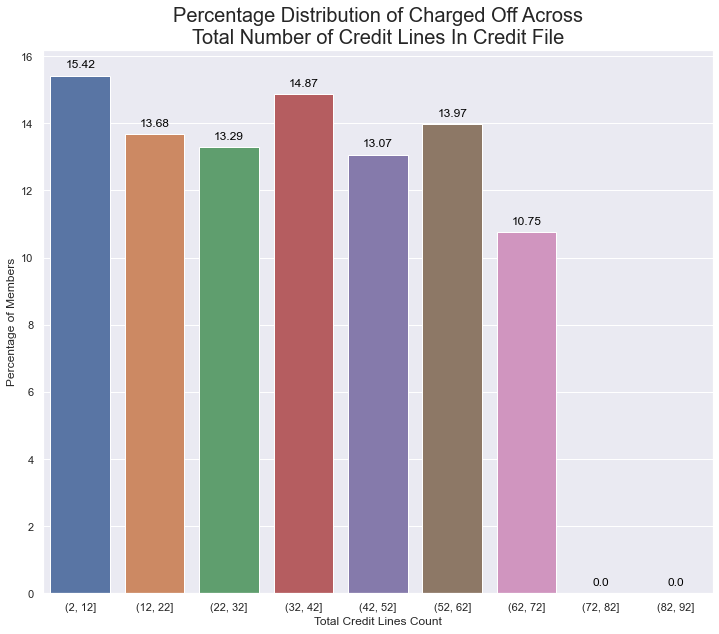

In [261]:
total_acc_df = raw_data.pivot_table(index='total_acc_category', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
total_acc_df = distribution_against_charged_off_members(data=total_acc_df, 
                                         graph_title='Percentage Distribution of Charged Off Across\nTotal Number of Credit Lines In Credit File',
                                         x_axis_label='Total Credit Lines Count')

**Observation**
- We see that, as the Total Credit Line increases, proportion of members getting default decreases.
- For bin (72,82] and (82,92] available applications in the category are not significant.
- Population Contributon for Total Credit Line count of 72 to 92 bin are very low for taking into consideration, and hence are showing Zero percentage of Charged off cases.
- We will however ignore these values (Total Credit Line count of 72 to 92 bin) for calculating trendline.

#### 3.25.3 To verify this, we'll calculate the Correlation Co-efficient & Pearson Value to proove this behaviour mathematically.

In [262]:
total_acc_df = total_acc_df[total_acc_category_dist > 0.05]
total_acc_df_x_index_list = [*range(1, total_acc_df.shape[0]+1, 1)] 
total_acc_df['total_acc_dfcorrelation_x_index'] = total_acc_df_x_index_list
total_acc_df

loan_status,Charged Off,Fully Paid,total_acc_dfcorrelation_x_index
total_acc_category,,,
"(2, 12]",15.422953,84.577047,1
"(12, 22]",13.676589,86.323411,2
"(22, 32]",13.293561,86.706439,3
"(32, 42]",14.867213,85.132787,4
"(42, 52]",13.068592,86.931408,5
"(52, 62]",13.970588,86.029412,6
"(62, 72]",10.752688,89.247312,7


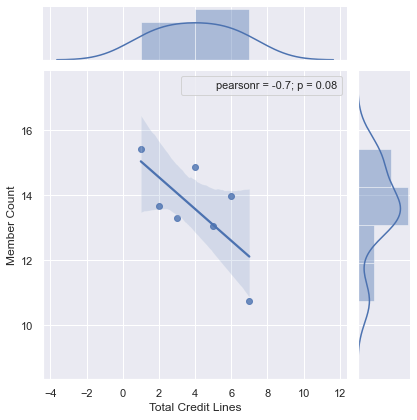

In [263]:
total_acc_df_plot = sns.jointplot('total_acc_dfcorrelation_x_index', 'Charged Off', total_acc_df, kind="reg")
total_acc_df_plot.annotate(stats.pearsonr)
plt.xlabel("Total Credit Lines")
plt.ylabel("Member Count")
plt.show()

In [264]:
headers = ['Total Credit Lines', 'Charged Off']
pd.DataFrame(np.corrcoef(total_acc_df['total_acc_dfcorrelation_x_index'], total_acc_df["Charged Off"]), index=headers, columns=headers)

,Total Credit Lines,Charged Off
Total Credit Lines,1.000000,-0.700603
Charged Off,-0.700603,1.000000


**Inference**
- As the Total Credit Lines Increases, percentage of Charged off values decreases, which is prooved mathematically as well.

### 3.26 Analysis of "Number of Public Record Bankruptcies" column

In [265]:
raw_data.groupby(by='pub_rec_bankruptcies').pub_rec_bankruptcies.count()

pub_rec_bankruptcies
0    33205
1     1452
2        5
Name: pub_rec_bankruptcies, dtype: int64

#### 3.26.1 Analysing Fully Paid + Charged Off Members

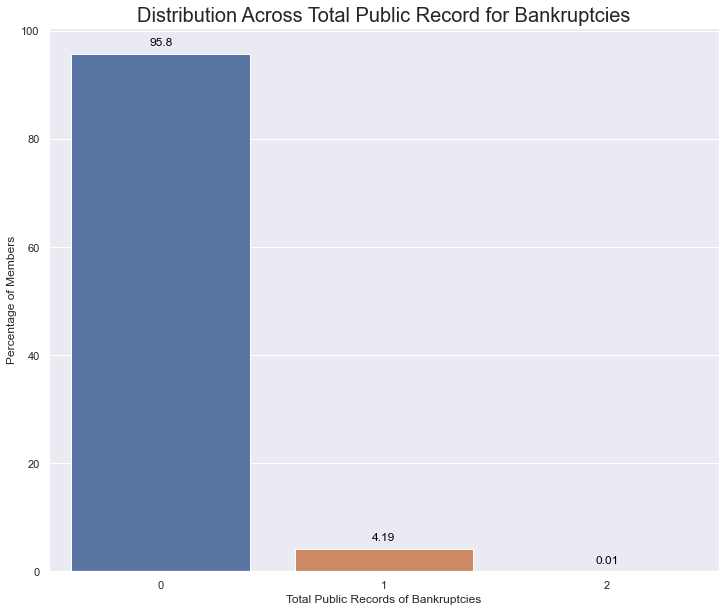

In [266]:
pub_rec_bankruptcies_dist = raw_data.pub_rec_bankruptcies.value_counts(normalize=True, sort=False)*100
population_distribution(data=pub_rec_bankruptcies_dist, graph_title='Distribution Across Total Public Record for Bankruptcies',
                        x_axis_label='Total Public Records of Bankruptcies')

**Observation(s)**
- **Number of Public Record Bankruptcies, categorical ordinal variable, categorised as 0, 1 & 3**
- Maximum applicants, around 95.80%, have no record of public bankruptcies.

#### 3.26.2 Analysing Charged Off Members Only

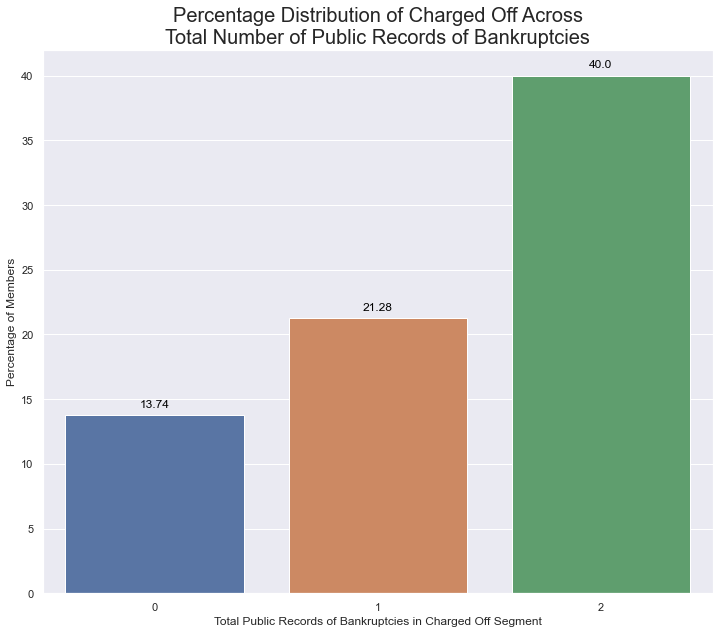

In [267]:
pub_rec_bankruptcies_df = raw_data.pivot_table(index='pub_rec_bankruptcies', columns='loan_status', values='member_id', aggfunc='count').fillna(0)
pub_rec_bankruptcies_df = distribution_against_charged_off_members(data=pub_rec_bankruptcies_df, 
                                         graph_title='Percentage Distribution of Charged Off Across\nTotal Number of Public Records of Bankruptcies',
                                         x_axis_label='Total Public Records of Bankruptcies in Charged Off Segment')

**Observation**
- From Above bar chart it could be clearly infered that with increase in public bankruptcy records chaces of loan going for charged off increases.

#### 3.26.3 To verify this, we'll calculate the Correlation Co-efficient & Pearson Value to proove this behaviour mathematically.


Generating Pearson Value For Public Records of Bankruptcies on X-Axis and Charged Off Percentage Member Count on Y-Axis


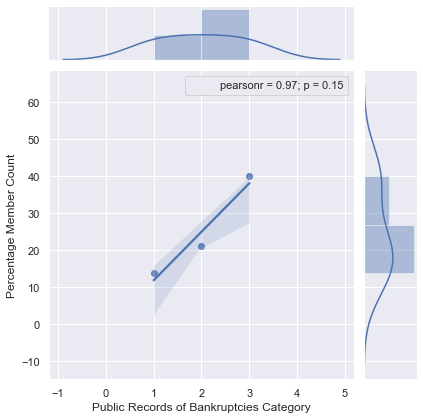



Dataframe Representing Corrrelation Co-efficient between Public Records of Bankruptcies and Percentage Member Count


,Public Records of Bankruptcies,Charged Off
Public Records of Bankruptcies,1.00000,0.97109
Charged Off,0.97109,1.00000


In [268]:
mathematical_function(data=pub_rec_bankruptcies_df, column_name='Public Records of Bankruptcies',
                      x_label='Public Records of Bankruptcies Category')

**Inference**
- As the Public Records of Bankruptcies	Increases, percentage of Charged off values also increases, which is prooved mathematically as well.

### 3.27 Analysis of "Remaining Oustanding Principal" column

In [269]:
raw_data.out_prncp_category.describe()

count       0
unique      0
top       NaN
freq      NaN
Name: out_prncp_category, dtype: object

#### Remaining Outstanding Principal Column contains no value after removing rows coresponding to loan_status column which are marked as "Current"

### 3.28 Analysis of "Remaining Oustanding Principal (Of Total Amount Funded by Investors)" column

In [270]:
raw_data.out_prncp_inv_category.describe()

count       0
unique      0
top       NaN
freq      NaN
Name: out_prncp_inv_category, dtype: object

#### Remaining Oustanding Principal (Of Total Amount Funded by Investors) contains no value after removing rows coresponding to loan_status column which are marked as "Current"

# 4. Bivariant Analysis

In [271]:
continuous_var = ['loan_amnt', 'int_rate', 'installment','emp_length', 'annual_inc', 'dti', 'delinq_2yrs', 'inq_last_6mths', 'open_acc', 'pub_rec', 'revol_bal', 'revol_util','total_acc',  'pub_rec_bankruptcies']

<AxesSubplot:>

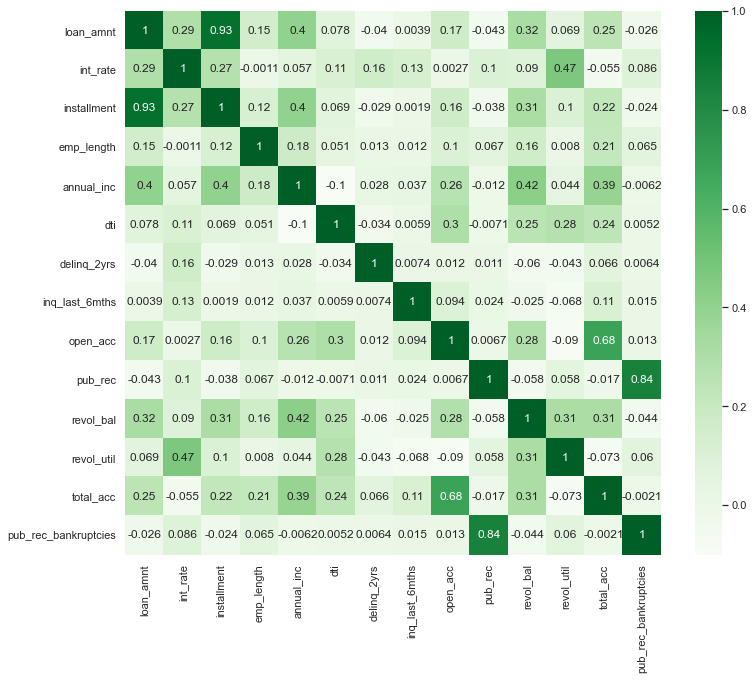

In [273]:
corr = raw_data[continuous_var].corr()
sns.heatmap(corr, annot=True, center=0.5, cmap = "Greens")

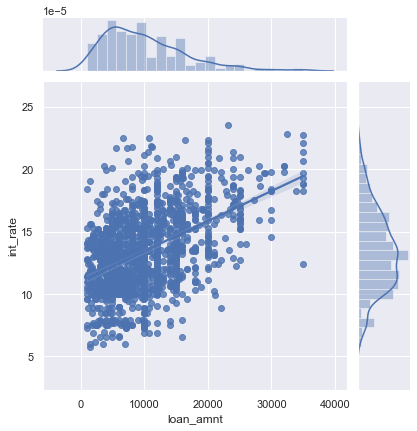

In [274]:
sns.jointplot('loan_amnt', 'int_rate', raw_data.loc[raw_data.pub_rec_bankruptcies > 0],kind="reg")

**Observation**
- From above joint plot it is evident that for higher loan amount, higher is interest rate charged by bank.